In [242]:
import numpy as np 
import os
import seaborn as sns

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

mypath0                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_5/Results/5F1/Planet_Sun_2.txt"
mypath1                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_5/Results/5G/Planet_Mercury_2.txt"


pathlist = np.array([mypath0,mypath1])
planetnames = np.array(['The Sun', 'Mercury'])
fsize = 25
def read_files(path):  
    
    x, y, z = [],[],[]
    vx, vy, vz = [],[],[]
    
    t = []
    
    with open(path, 'r') as infile:
        lines = infile.readlines()[2:]
        for line in lines:

            line = line.split()
            t.append(float(line[0]))
            x.append(float(line[1]))
            y.append(float(line[2]))
            z.append(float(line[3]))
            vx.append(float(line[4]))
            vy.append(float(line[5]))
            vz.append(float(line[6]))
    
    r = np.zeros((len(x), 3))
    v = np.zeros((len(x), 3))
    for i in range(len(x)):
        r[i] = [x[i], y[i], z[i]]
        v[i] = [vx[i], vy[i], vz[i]]
        
    return r, v, t

"""
fig = plt.figure(figsize = (20,15))
ax = plt.axes(projection='3d')

idx = -1


ax.scatter3D(0,0,0, s = 50, c = 'orange', label = 'The sun')

for i in range(len(pathlist)-1):
    i = i+1
    print(pathlist[i])
    r0, v0 = read_files(pathlist[i])
    xline = r0[:idx,0]
    yline = r0[:idx,1]
    zline = r0[:idx,2]
    ax.plot3D(xline, yline, zline, ms = 25,label = planetnames[i])


#ax.set_xlim([-10,10])
#ax.set_ylim([-10,10])
#ax.set_zlim([-10,10])

plt.title('The Solar System', pad = 50, fontsize = fsize+ 10)
ax.set_xlabel('X [AU]', fontsize = fsize)
ax.set_ylabel('Y [AU]',  fontsize = fsize)
ax.set_zlabel('Z [AU]',  fontsize = fsize)
ax.xaxis.set_tick_params(labelsize=fsize-10, pad = 15)
ax.yaxis.set_tick_params(labelsize=fsize-10, pad = 15)
ax.zaxis.set_tick_params(labelsize=fsize-10, pad = 15)

plt.legend(fontsize = fsize, loc='center left', bbox_to_anchor=(1, 0.5))

ax.yaxis.labelpad=50
ax.xaxis.labelpad=40
ax.zaxis.labelpad=40


plt.savefig('../Paper/Figures/5G.png')
"""

"\nfig = plt.figure(figsize = (20,15))\nax = plt.axes(projection='3d')\n\nidx = -1\n\n\nax.scatter3D(0,0,0, s = 50, c = 'orange', label = 'The sun')\n\nfor i in range(len(pathlist)-1):\n    i = i+1\n    print(pathlist[i])\n    r0, v0 = read_files(pathlist[i])\n    xline = r0[:idx,0]\n    yline = r0[:idx,1]\n    zline = r0[:idx,2]\n    ax.plot3D(xline, yline, zline, ms = 25,label = planetnames[i])\n\n\n#ax.set_xlim([-10,10])\n#ax.set_ylim([-10,10])\n#ax.set_zlim([-10,10])\n\nplt.title('The Solar System', pad = 50, fontsize = fsize+ 10)\nax.set_xlabel('X [AU]', fontsize = fsize)\nax.set_ylabel('Y [AU]',  fontsize = fsize)\nax.set_zlabel('Z [AU]',  fontsize = fsize)\nax.xaxis.set_tick_params(labelsize=fsize-10, pad = 15)\nax.yaxis.set_tick_params(labelsize=fsize-10, pad = 15)\nax.zaxis.set_tick_params(labelsize=fsize-10, pad = 15)\n\nplt.legend(fontsize = fsize, loc='center left', bbox_to_anchor=(1, 0.5))\n\nax.yaxis.labelpad=50\nax.xaxis.labelpad=40\nax.zaxis.labelpad=40\n\n\nplt.savefig

In [243]:
for i in range(len(pathlist)-1):
    i = i+1
    
    r0, v0, t = read_files(pathlist[i])
    xline = r0[:,0]
    yline = r0[:,1]
    zline = r0[:,2]

In [244]:
np.log10(len(xline))

6.0

In [245]:
r = np.sqrt(xline**2 + yline**2 + zline**2)

In [269]:
start_idx = 490
idx_interval = 2900

local_idx_min = []
local_min = []

local_idx_min.append(np.argmin(r[:start_idx]))
local_min.append(r[local_idx_min[-1]])

for i in range(len(r)//idx_interval):
    temp_r = r[start_idx+idx_interval*i : start_idx+idx_interval*(i+1)]
    local_idx_min.append(np.argmin(temp_r) + start_idx + idx_interval*i)
    local_min.append(r[local_idx_min[-1]])

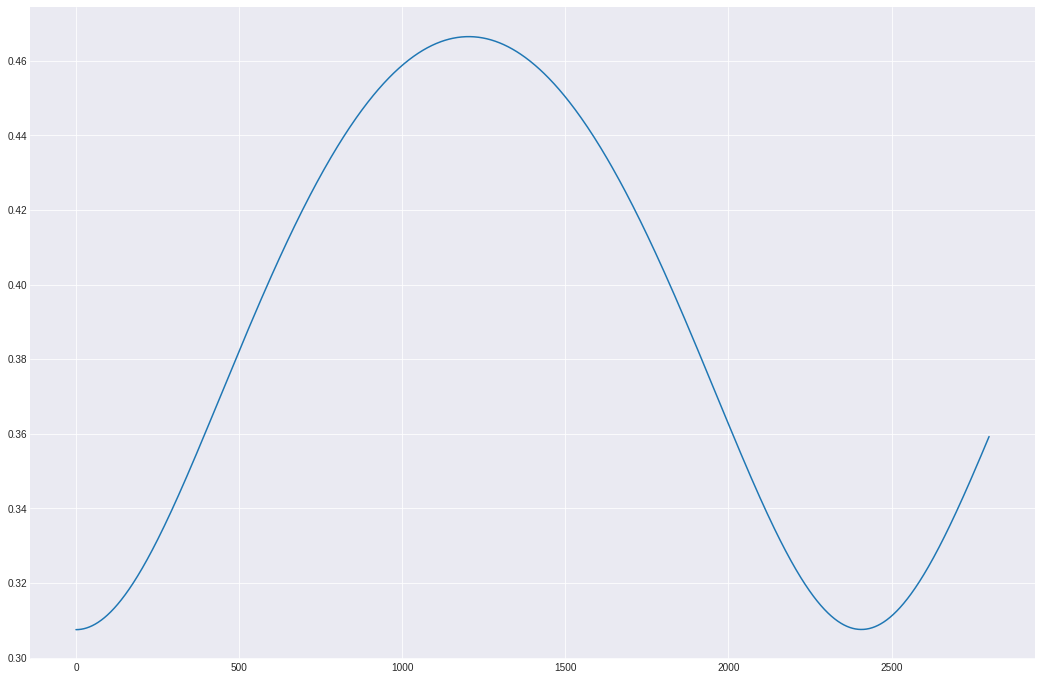

In [270]:
plt.figure(figsize=(18,12))
plt.plot(r[0:2800])
#plt.plot(local_idx_min, local_min, "ro")
#plt.xlim(0.1924e7, 0.193e7)

In [271]:
theta = np.arctan(yline[local_idx_min]/xline[local_idx_min])

In [272]:
theta

array([ 0.00000000e+00,  1.59602593e-03, -3.49948993e-03,  8.89047207e-04,
        2.62956627e-03, -1.82635360e-03,  5.88697338e-05,  3.33758659e-03,
       -6.56045411e-05,  1.96268385e-03, -1.90806082e-03,  2.63503061e-04,
       -2.06356389e-04, -3.31587721e-03, -1.00174810e-03, -4.29119619e-03,
       -1.83520642e-03,  2.00967091e-03, -8.09948707e-04,  1.78627976e-03,
       -9.29391753e-04,  1.80728319e-03, -2.11269353e-03, -6.22706011e-04,
       -1.76607933e-03,  1.45531330e-02, -8.93585523e-04, -5.09045447e-04,
       -2.75460972e-03,  4.41443324e-03, -3.08882171e-03, -1.89865270e-03,
       -1.23402817e-03, -3.19633671e-03,  2.33922467e-04, -2.97088133e-03,
        2.78143472e-03, -2.82797737e-04, -1.96464116e-03, -2.26507730e-03,
       -5.18762557e-03, -2.88922867e-03, -1.67187188e-03,  9.23797831e-04,
        8.98775297e-04, -1.74521048e-03,  1.09810408e-03, -1.40718202e-03,
       -2.53462749e-03,  1.70742946e-03, -4.65158335e-03, -1.65042263e-03,
       -3.49432061e-03, -

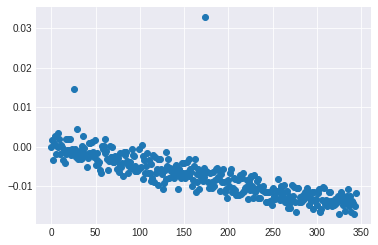

In [273]:
plt.plot(theta, "o")

<Figure size 1080x1800 with 0 Axes>

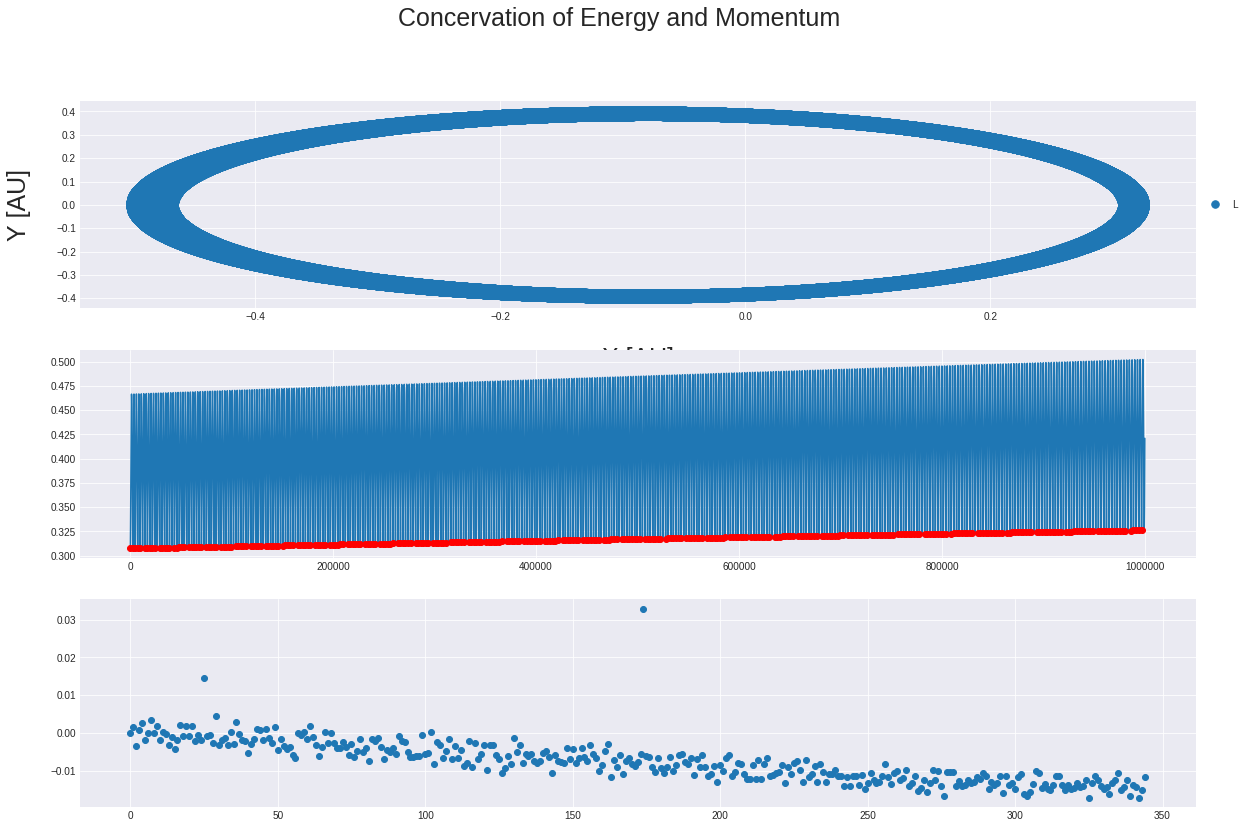

In [274]:
plt.figure(figsize = (15,25))
fsize = 25

fig, axs = plt.subplots(3,1, figsize = (20,13))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Concervation of Energy and Momentum', fontsize = fsize)

size_= 15

axs[0].plot(xline, yline, '.', ms = size_, label = 'L')
axs[0].set_ylabel('Y [AU]', fontsize = fsize, labelpad = 25)
axs[0].set_xlabel('X [AU]', fontsize = fsize,  labelpad = 25)

axs[1].plot(r)
axs[1].plot(local_idx_min, local_min, "ro")

axs[2].plot(theta, "o")

#for ax in axs.flat:
 #   ax.label_outer()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABOEAAAM8CAYAAAARIrSUAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3Xlc1OX6//H3sIgabhyh41apOWgoLokbRqm4l2l2EjXX0k5pVpZZ2C/quLRqX8PKVs3TZkdJLT0ZaueoiVvuoonivgEqKi6I8Pn9wZmJkQFZZhhgXs/H4zxOzGe7ZubiI3PNfV+3yTAMQwAAAAAAAACcxsPVAQAAAAAAAADlHUU4AAAAAAAAwMkowgEAAAAAAABORhEOAAAAAAAAcDKKcAAAAAAAAICTUYQDAAAAAAAAnIwiHAAAbio6OlqBgYEaMmSIq0Nxiq+++kqdO3dWUFCQ2rRpo9OnT7s6JJQSQ4YMUWBgoKKjo10dCgAAcCNerg4AAFD2nTp1SgsWLNDatWt19OhRnT9/Xt7e3qpdu7aaN2+uPn36qF27dq4OEzdo0KCBunTpokaNGrk6FIfbunWrJk+eLEmqX7++6tSpI5PJdNPjOnfurOPHjxfqWosWLVKTJk2KFCfKjpy58c4776hPnz43PSYuLk7Dhw+XJNWpU0erVq1yZogAAKCUowgHACiW2bNn68MPP1R6erq8vb0VGBiooKAgXbp0SfHx8dq/f78WLlyosLAwvfPOO6pevbqrQ3Y7H374oWbOnKmVK1eqbt261sd79+6t3r17uzAy51m5cqUk6c4779TixYvl5VW4P3nMZrPq1atXoH19fX0LHR/KtsWLFxeoCLd48eISiKbsycjIUOvWrdWzZ0+9+eabrg4HAIASQxEOAFBkr7/+ur755ht5e3vr6aef1rBhw1SlShXr9suXL+u7777TzJkztXr1ao0YMULfffedfHx8XBi1+9m+fburQyhxZ8+elSQ1adKk0AU4Serfv791BBOQU0BAgNatW6fTp0/r1ltvzXO/K1euaPny5fL391dycnIJRlj67d27V1evXnV1GAAAlDh6wgEAimTp0qX65ptv5OHhoejoaI0dO9amACdJlStX1siRI/XRRx/Jy8tL8fHx+uijj1wUsftyxyJcVlaWJBWpAAfkJywsTFlZWTcd5bZixQpdvnxZ99xzTwlFVna44z0JAACJIhwAoAiysrI0c+ZMSVJERIQ6deqU7/4dOnTQ0KFDdf/996tNmza5th85ckRRUVHq2rWrgoOD1bJlS/Xq1UvTpk2z20w/JiZGgYGBeuSRRyRJv/zyiwYPHqw2bdooODhYDzzwgL766qs849m7d69efvllderUSU2bNlWHDh30zDPPaNeuXXb3z8zM1L/+9S8NGTJEISEhatq0qcLCwvTcc89p69atdo8JDAxUYGCgDhw4oO+++05dunRRs2bNdPLkSTVu3FiBgYHatm1bnjF++umnCgwMVHh4uM3j27Zt0/PPP6/OnTuradOmCg4OVvfu3TV16lSdOXPGZt+XXnpJgYGBOnfunCSpS5cuNs3o81uYIT09XXPnztWAAQOsz7ljx44aO3as1q1bd9PnfOTIEb300ku67777rMe+/PLLSklJyfM55+XixYuaNWuW+vXrp1atWqlZs2bq1KmTnn/+ee3cudNmX8tz+uGHHyRJP/zwgzWuY8eOFfrahWW5/nPPPSdJ+v7779W/f3/dfffdatGihfr376+lS5fmefyuXbs0YcIE6+vWtm1bRURE6Ouvv9b169dz7W95j999910lJCTo0UcfVcuWLfXxxx/b7LdgwQL1799fLVu2VEhIiEaOHKlNmzZJktq1a6fAwEBt2LBBktS3b18FBgZqxowZecZ5+vRpax7f+B7k5dSpU5oyZYp69+6tFi1aWH+Pxo8frz179tg9pjg5tXnzZj322GMKCQlRixYt1KdPH82dO9daoC0qy/1u0aJF+e5nKdLde++9+e4XHx+vCRMmqFOnTmrWrJlatWqlvn37aubMmTp//nyu/S059tJLL+natWuKjo5W9+7dFRwcrHvvvVeTJ0/W5cuXJUkJCQkaN26cQkND1axZMz3wwANasmRJnrHExcVp7Nix6tixo5o2bap27dpp+PDh+vHHH+3ub1ng4ttvv9WlS5f03nvvWWMJCQnRqFGjbO6rx44dU2BgoLVfY87fTwvLz5Z8vJEl51966SWbxzt37mw9LjEx0fq8W7ZsqX79+tk8hx9++MH6+9C6dWv9/e9/16FDh/J8XQAAcBSKcACAQtu4caMOHz4sk8mkESNGFOiYiRMnavr06erQoYPN42vWrNEDDzyg7777ThcuXFDr1q3VvHlznT59Wl9++aX69Omj3bt353neuXPn6umnn9alS5fUrFkz1axZU/v27dPkyZP1ySef5Np/0aJFevjhhxUTE6NbbrlFbdu2VeXKlfXzzz9rwIABuT5spqen67HHHtMrr7yiLVu2qF69emrdurUkadmyZRo4cKC+/PLLPONbv369XnvtNdWsWVNt2rSRp6enWrRoIUmKjY3N87iff/5Zkmx6ti1ZskQDBw7UTz/9pMzMTLVt21ZBQUFKSkrSvHnz1K9fP5ui5V133aXQ0FDrz6GhoerSpYsaNGiQ53Ul6fz58xo0aJDeeOMN7dq1S/Xr11eHDh10yy23KDY2ViNGjMh3VclDhw7pkUce0dq1a3XnnXfKbDbr7NmziomJ0YgRI5SRkZHv9XM6fvy4+vXrp+joaO3fv1+NGzdWu3btZBiGfvrpJz3yyCNasGCBdX/LYhO1atWSJNWqVUtdunRRly5dVKlSpQJf1xGmTJmiqKgoeXp6qlmzZvL19dWuXbs0fvx4u4W47777To888oiWLFkiDw8PtWnTRgEBAdqxY4f+8Y9/aNiwYdbiyo2uX7+up556SsePH1dISIhq1qxp3fbWW29p0qRJ2rVrl/z9/dW8eXMlJiZq+PDhWrFiRa7iXv/+/SVJP/74owzDsHu95cuXyzAMNWrUSM2aNbvpa5GQkKA+ffron//8p06ePKng4GC1bt1a169f19KlS/W3v/1Na9euzfP4wubUr7/+qqFDh2rt2rWqUKGCWrdurUqVKumdd97RxIkTbxpvfho3bqzbbrtNBw4c0I4dO+zuk5ycrHXr1ql27dpq2rRpnueKiYnRww8/rCVLligjI0Nt27bVXXfdpYMHD+rDDz9Uv3798i0eT5gwQV988YXq1KmjRo0aKSkpSV999ZUmTpyoffv2aeDAgdq7d68aN24sf39/7du3TxMmTNB//vOfXOd67733NHz4cMXGxsrX11dt27aVn5+f4uLi9MILL+jZZ59VZmam3TiuXbum4cOH68svv1StWrUUFBSkzMxMrV69WkOGDNGRI0ckSZUqVcrz99NRTpw4ocGDBys+Pl6NGzdWjRo1FB8frxdeeEErV67UBx98oEmTJqlChQrWOH/99VeNHDlSV65ccVgcAADYZQAAUEjR0dGG2Ww2evToUazznDlzxmjTpo1hNpuNyMhI4+rVq9ZtFy9eNJ544gnDbDYb3bp1M65du2bdtnDhQsNsNhsdOnQw2rRpY6xbt866LSsry4iMjDTMZrPRtm1bIzMz07rtwIEDRlBQkBEYGGj8+OOPNse8//77htlsNpo3b26kpKRYt02ePNkwm81G3759jWPHjtkc88033xiNGzc2GjdubOzcudPmuZnNZsNsNhudO3c2lixZYrNt3rx51udlz7Fjx6zHJyQkGIZhGBkZGdbX6o033rB5XqdPnza6detmmM1m4+WXX7Y519GjR63nOnr0qM02y3N+9NFHbR6fMGGCNfbExESbbQsWLLCeb8OGDXaf83333WdMnjzZ5j3bsGGDERgYaJjNZmPFihV2n7c9gwYNMsxms/HQQw8Zp0+ftj6emZlpzcOmTZvminPixImG2Ww2Jk6cWOBrGYZhdOrUyTCbzcacOXMKdZyF5TW99957jdDQUCM+Pt667dq1a8bIkSOt+ZTTjh07jCZNmhhNmzY1li1bZrNt79691vd3ypQpNtssz7Nz587G6NGjbV5zwzCM+Ph46+v+4YcfWh+/fv26MX36dCM0NNRo1qyZYTabjfXr1xuGYRjnzp0zmjZtapjNZiMuLs7u87S8L59++mmBXpcnn3zSMJvNxsCBA41Lly5ZH7969aoxbtw4w2w2G+Hh4bmOK0pOpaenG/fcc49hNpuNp59+2khPT7duS0xMNO69916jRYsWhtlsNt5///0CxW8Yf+bG0aNHjZkzZxpms9l4/fXX7e47Z84cw2w2G++88471d7BTp042++zfv98ICgoyzGazMXPmTOP69evWbWfOnDEeeughu7+flhzr2LGj0adPHyM5Odm6LTY21jCbzUZgYKDRo0cPIzo62sjKyjIMI/t3ZsyYMYbZbDYee+wxm3P+8ssvhtlsNkJCQnL9Xm/cuNHo0KGD3d+LRx991Pr+DBo0yDhz5ox1W1JSkhEaGmqYzWZj2rRpNsfl9/tpec8t+XijvI61vD8dO3Y0ZsyYYfd5d+vWzWjXrp2xa9cu63HHjh0zWrVqZZjNZmPp0qV2rwkAgKMwEg4AUGiJiYmSZDOFqCgWLFig1NRU1apVS1FRUTYLNvj6+mratGmqUKGCDh06pNWrV+c6PiUlRaNGjVL79u2tj5lMJmtD/XPnzunw4cPWbfPmzVNGRoa6du2q+++/3+aYsWPHqk6dOrpy5Yp1FNrZs2c1f/58eXh4aObMmapTp47NMQMHDtRDDz2krKwszZs3z+5zvPXWW/XAAw/YPNajRw95eHjo0KFDSkhIyHXM8uXLJWUvKnDnnXdKks6cOaMePXqoS5cuGj16tDw8/vwnPCAgwPqc16xZYzeOgjp9+rR++uknSVJUVJTq169vs71///7q2rWrJOX5nH19fRUZGSlvb2/rY23atFFQUJCkgveD2r59uzZv3ixJevvttxUQEGDd5uHhobFjxyooKEjXrl3Td999V8BnWDJOnjypSZMmqUmTJtbHvL29rVN/9+7dq/T0dOu2Tz75RJmZmRo1apR69uxpc67AwEBNnTpVUvb0Vnuj4Y4dO6ZJkybZvOZS9rQ7438j1p588knr456enho/frzuuOMOmzgkqXr16taRSfb6niUnJ2vLli3y9PQs0AqhklS/fn316NFDTz/9tCpXrmx93MfHR+PGjZOUPS09rymBhcmp3377TadPn5a3t7eioqJUoUIFmzhefvnlPEcUFlTfvn0lZffGvHbtWq7tltctv9fHcj9q3ry5xo0bJ09PT+s2Pz8/63u+ceNG7d27N9fxSUlJev31121GPYaHh8vf31+GYcjLy0tjxoyRyWSSlP07M2DAAEnZU2BzsvTqnDhxYq6WASEhIXrxxRclKc9Rv8nJyZoxY4b8/Pysj/n7+1vvfSXZA65KlSp65pln7D7vQ4cO6fHHH7fmjSTVqVPHOmU4v1HXAAA4AkU4AEChWfoUVa9evVjnsRSMwsPDbT4oW/j5+enuu++WlN2ryJ4bC1ySdNttt1n/29IPTZK1kGevR5PJZNK3336r9evXa9CgQZKyP8xfu3ZNZrPZ5pw5WQpSefVJu3H6rZT94TQkJERSdj+7G1mKcDkLhbfeeqtef/11ffjhhzYfdC3q1asnSUXquZbTunXrlJmZqWrVqqljx45297E85/Xr19vd3rt3b5sioYXlNcz5nuTHkh+BgYFq2LCh3X0sPfPyyo+ieuONN6y9qfL739y5c+0eX6lSJevrlJPlfcrKylJqaqokKSMjwzoV094xktS6dWv5+fnp6tWr2rJlS67tdevWtZujln3DwsLsnjciIsLu45YpqcuXL8+1iuUvv/yirKwshYaG2hRG8zNhwgTNnDnTpmBuYXlNpLzztzA59fvvv0uSgoKC9Je//CXXMZ06dSr2Cs233XabWrZsqdTU1FxTOxMSEhQfH68mTZrIbDbneQ5Lfvfq1cvudsu0V8n+75q/v791antOli8LOnXqZC1E3bgtZ6+506dPW4tPeeVfeHi4TCaTTpw4oYMHD+ba3qZNG7srxRb2d94RunTpkitXcn6B0rlz51zH2HtdAABwBpYMAwAUmuUDTnEbnB84cECS8v2g2qBBA8XFxdn94Ofj42P3g1/OD9iWXlFXrlzR8ePHJdl+6M/pxnPt27dPUvaH1KeeesruMWlpaZKyR4JcunRJt9xyS77ntOjdu7c2bNigFStWaMyYMdbHT506pe3bt8tkMtkU4XJuX7lypQ4fPqzk5GTrKCbLh9zivif79++XlP262yt6WLZJ2QsmJCUl5SrE5FWwtLwvBe0JZ4mlUaNGee5jicUyOtNRzGZznnmSU17PtVatWnZXZrWXm0ePHrWOzHr33XfzLBBZ9j906FCuAmleeWbpJ3bjiEYLe0UcKbt/YK1atXTy5EnFxsbaFLstReJ+/frZPTYvly5d0qpVq/THH38oOTlZaWlpuXrO5dVzrDA5Zek/dvvtt9s9pkKFCrrtttvsjkItjL59+2rr1q364Ycf1K1bN+vjllFwDz74YJ7HXr161Xo/ull+HzlyxG5+161b1+4xli80chaebtyWsw+g5T4nKddiBzl5eXkpIyNDhw4dypVPef2uFPZ33hHsvS45v+Qp6OsCAIAzUIQDABRatWrVJCnXapyFdeHCBUnZ04fyYtlm2Tcne6PnbnYtSbkKZXmxjIo4d+6cVq5cedP909LScp3b8lrdqFu3bpo8ebLi4+N1/Phx6wdDS8P7kJAQ/fWvf7U55osvvtCMGTOc+oH24sWLkqSqVavmuU/O9+vixYu5inCFeV8cFUtGRoauXr2qihUrOuTa/fv3t07xLYrCvAY5R9/ktziBheV1ySmv18hSJM7rd8zf39/u4x4eHurbt68++ugjLV682FqEO3v2rDZv3qyqVasWqpl+XFycxo8fr7Nnzxb4mJwK83panrOvr2+e++R3zymoXr16aerUqVqzZo3Onj0rPz8/ZWVl6ccff5Snp6fNoio3ynk/yi8Wy3Owd/+7cepxYbdb5My/gtzn7OWfo37nHeFmz7s0xQoAcD8U4QAAhWYZubFr165inefGqVL2WEbK5DUqqyjXstfDKT/t27fPc9rhzeQVd40aNdS+fXutXr1asbGx1oKPZZTRjdNs//Of/+itt96SlD2KbtCgQTKbzapSpYpMJpM2bNigoUOHFinGwso5eqkg76Ez5YyluDniKjlfw//+97+5iq8Fkddzt7w+eb1P+b1//fv31+zZs7Vu3TolJyfL399fK1asUGZmpnr27FngKZ1JSUkaO3as0tLS1KxZMz3xxBO6++67Va1aNWsftOL2l8zpZs9ZKv6IUSm78NmpUyctX75cP/74o4YNG6YNGzbo1KlT6tixY75TdQv7e+PM3LbE4u3trZ07d7r8dxoAgPKsbP61CgBwqdatW0v6c+pkQWRkZFib7FtYRonZG+VhYRmlkd9oqIKoVq2a9cNlQfv+1KhRQ1Lx+6zlxdILKjY2VlJ2sWLr1q3y9vZW9+7dbfa1LDzQunVrzZgxQ61bt1bVqlWtz+nGvl1FVZD3JOe2vEb6lXQsFStWLLMjXHL2VkxOTnbouS2LIFy6dMnu9vxGs9arV09t2rRRZmam/v3vf0uSli1bJqlwU1GXLl2qtLQ0+fr66vPPP1fXrl3l5+dnLcA5KnctLM/ZMiLOHks/vuKyLNBgmYK6ZMkSSfZ7VeaU835WEve//FjyLyMjo0R7txVVYb9EAQCgNKEIBwAotLvvvtvaKP/DDz8s0DFffPGFBg8erGeffdb6mGVEXc6eRDey9G3Kr29SQfj4+FinfOZcMTWnPXv2aMWKFdYRfpZedUePHnV4oUDKboJeoUIFbdmyRefOndOKFSuUlZWljh075lr0whJzXoslbN261SExWV7n/fv359mfy/J++fn52W187ygFyQ/LtuLmhyvVq1fPWjgqbp+yG9WqVUvSn73hbnSzvLEs0PDLL78oOTlZGzdu1B133KGWLVsWOAbLiqfBwcF2i7aOyl0LS0+wo0eP2t1++fJlaz+24goLC5Ofn592796tw4cPKzY2VpUrV7bpEWePj4+PtWddSdz/8pOzJ6ej868oLL0Ub1y11yKvFXQBACgLKMIBAIpk/PjxkrKnSX7xxRf57rt27VrNmjVLkmxWR7SsUhobG2t3dMPJkye1bds2SdI999xT7Jgt1/v555/tbp80aZLGjBljXbWwQ4cOqlChgq5evWod4XKjmJgYDR061DqNtDB8fX0VFhamrKwsrVu3TqtWrZIk9enTJ9e+lr5R9j6YnjlzxjpSTrJtLp5zallBpuB16NBB3t7eunjxovV1uJHl9XPEe5Ify/u1b98+u4WKrKws6+qyzo7FmTw9Pa3x/+tf/7K7z/nz59WvXz+99dZbheoJ2LRpU0l595rLmTf2dO/eXVWqVNHvv/+ur776SpmZmYVekCG/3M3KyrIp5OdV+C2M5s2bS5J27txpd9TrL7/84rC+il5eXtbeb9HR0bp48aLCw8OtRdX8WFastYwuvNHWrVt16tQpmUymPIvvjuDv76+goCBJ0vfff293n4MHD+rBBx/URx995JBrWu5L9t5vyxcQ9oqoiYmJio+Pd0gMAAC4AkU4AECRhIeHa9iwYZKkt956S5MmTdKpU6ds9rl8+bI+/vhjPfXUU7p27Zq6d++uRx55xLr9oYceUs2aNXX69GlNnjzZ5oPx+fPnNXHiRGVmZio4OFjt2rUrdszDhg2Tt7e3tm7dqtmzZ1sfNwxDX3zxhXbv3q2KFStaiww1atTQgAEDrM9x48aNNudbu3atpk6dqg0bNhT5Q71lSuovv/yiDRs2qHLlyurcuXOu/Ro3bixJ+umnn2ym0u3fv18jRoywaZKfcyXFnCOPdu/efdN4atasqYceekiSNHnyZJsPwoZh6Msvv9TatWvl7e2tkSNHFvRpFsldd91lLT5ERkbaNPW/fv263nnnHR04cEBVqlRRRESEU2Nxtscff1yenp7asmWL3nzzTZtCanJyssaOHav4+Hjt27evwA33JVkLRNu3b7cp8GVlZem9997T6dOn8z2+YsWK6tWrl7KysvT555/Lw8Mj31U/7bHk7vbt27Vz507r46mpqRo/frw8PT2to1QdscptWFiYqlWrpmvXrmnq1Kk2r2VCQoLeffddh07vtExJtRTT7BXR7Rk2bJgqVaqknTt3atasWTb9DU+dOqVXX31VUnYhNK+VXh3l73//u6Ts+8vcuXNtYjl8+LDGjRunvXv36uTJkw65nuW+9Mcff+RakdRSOP7+++9tpscmJSXphRdeyHMlYAAAygIWZgAAFFlkZKQCAgI0a9YsLViwQAsXLpTZbNatt96qq1evKj4+XmlpafL09NTw4cP1wgsv2IzMqlq1qt577z098cQT+v777xUbG6tGjRrpypUr2r9/v65cuaK6detqxowZDmkWfvvtt2vKlCmKjIzUe++9p4ULF+r222/X4cOHdeTIEXl5eWnKlCk2jfGff/557d+/X3FxcRoyZIiaNGmimjVr6tixYzp48KCk7GLi/fffX6SYOnXqpEqVKumXX35RVlaWevToYXeFz9GjR2vRokU6evSounfvrqCgIKWmpio+Pl6hoaF69dVX9d///lfJycl67LHH1Lx5c82aNUu+vr4KDAzUH3/8oQkTJuj9999XgwYN9MEHH+QZ04svvqh9+/Zp69at6tmzp3UBiMTERCUlJcnT01NRUVHW4oozTZs2TcOGDdPOnTvVuXNnmc1m+fj4KCEhQefOnVPFihU1ffp0h38wX7hwYa6ia16aN2+uJ554oljXCw4O1iuvvKLJkydrzpw5+umnnxQYGKi0tDTFx8fr2rVrqlOnjv7xj38U6ryhoaHq2rWrYmNj9corr+jLL79UrVq1tH//fqWmpuqzzz7ToEGD8j3Hww8/rPnz5ysjI0Pt27e3TnEtqJ49e2r27NlKSEjQwIEDrVNZt2/frpo1a+qf//yn3nnnHR0/flzvvvuufv31V02aNEkNGjQo1HUsfH199fLLL+ull17S4sWLtX79egUGBur8+fPatWuXwsPDdf369QKtBFoQTZs2VaNGjZSQkCB/f3916NChQMfVq1dPU6dO1Ysvvqjo6GjNnz9fDRs2VGpqqvbv36+MjAwFBQXptddec0ic+enWrZtGjx6tTz75RG+88YbmzZunBg0a6Ny5c9qzZ48yMzN111136YUXXnDI9e6++27NmTNHf/zxh+677z5VqlRJb7zxhlq3bq3HH39cq1ev1t69e9W9e3cFBgbKZDJp+/btatmypTp37qzo6GiHxAEAQEmjCAcAKJbHH39cDzzwgBYsWKA1a9bo6NGjSkxMVIUKFVSvXj21a9dOjzzyiLWH3I3atGmjJUuW6NNPP9W6deu0bds2eXl56Y477rCOtrNMZ3OEvn37qmHDhvr888+1efNmrV+/XlWqVFH37t01evRo6ygMi0qVKumzzz5TTEyMlixZoj/++EMJCQmqUqWK7rnnHg0YMEBdu3YtcjyVK1dWp06drKNo8irm1a1bV3PnztXMmTO1Y8cObdu2TbfddpsmTpyowYMHq0KFCpo6dapef/11JScn2ywm8dZbb+mVV17Rvn37dObMGbVt2zbfmHx9fTVv3jx9++23Wrp0qQ4cOKD09HTVrFlTffr00YgRI3TXXXcV+TkXxq233qoFCxZo7ty5io2NVUJCgq5fv65bb71V3bp102OPPeaUUUJ5TYF1pkGDBqlZs2aaO3euNm/erA0bNsjb21sNGjRQ165dNXz4cPn6+hb6vDNmzNAnn3yiH3/8UYcPH9aFCxfUqlUrjR071qbQZenFdaPg4GDVqVNHx48fL/RUVCl7uu3nn3+ut99+W2vXrtW2bdtUu3ZtRUREaNSoUfL399f48eN1/Phx7d27V4cOHbIu2lBU/fr1k5+fnz777DPt3r1bGzduVN26dfXMM8/oscce04svvlis89+oT59KzRZoAAAgAElEQVQ+mj59unr37l2o2Hv37m29H23cuFGbN2+Wj4+PgoKC1LNnTw0cOLDAq9AW1/PPP68OHTroq6++0rZt2xQXFycfHx81bdpUvXr10qBBgxy2+El4eLhGjhypRYsW6fz586pUqZI1t0NCQvTZZ59p9uzZ2r17t7Zv367atWtr1KhRGj16tD777DOHxAAAgCuYjJzjzQEAAOA2zpw5Yx259e9//9vu6LMjR46oe/fuqlq1qlavXl1iRSEAAIDyhpFwAAAA5VRSUpI2btyolJQUDR8+PNf29evXS8oe/XjHHXfYPceHH36orKwsRUREUIADAAAoBopwAAAA5dTVq1c1YcIEZWVlyWQyaejQodb+ikePHtX06dMlZU/T9vDIvV7X3Llz9cMPP6h69epOX4gDAACgvGM6KgAAQDn28ccfa8aMGZKkOnXqqH79+jp37pz27dunjIwMBQYG6ptvvrH25Nq7d6/+7//+T4cOHdLBgwfl5eWl6Ohou6v2AgAAoOAowgEAAJRzK1as0Lfffqvdu3frwoULqlixourXr69u3bppyJAhqly5snXfLVu2aMiQITKZTLrrrrv03HPPqX379i6MHgAAoHygCAcAAAAAAAA4We7mHwAAAAAAAAAciiIcAAAAAAAA4GQU4QAAAAAAAAAnowgHAAAAAAAAOBlFOAAAAAAAAMDJKMIBAAAAAAAATkYRDgAAAAAAAHAyinAAAAAAAACAk1GEAwAAAAAAAJyMIhwAAAAAAADgZBThAAAAAAAAACejCAcAAAAAAAA4GUU4AAAAAAAAwMkowgEAAAAAAABORhEOAAAAAAAAcDKKcAAAAAAAAICTUYQDAAAAAAAAnIwiHAAAAAAAAOBkFOEAAAAAAAAAJ6MIBwAAAAAAADgZRTgAAAAAAADAySjCAQAAAAAAAE5GEQ4AAAAAAABwMopwAAAAAAAAgJNRhAMAAAAAAACcjCIcAAAAAAAA4GQU4QAAAAAAAAAnowgHAAAAAAAAOBlFOAAAAAAAAMDJKMIBAAAAAAAATkYRDgAAAAAAAHAyinAAAAAAAACAk1GEAwAAAAAAAJyMIhwAAAAAAADgZBThAAAAAAAAACejCAcAAAAAAAA4GUU4AAAAAAAAwMkowgEAAAAAAABORhEOAAAAAAAAcDKKcAAAAAAAAICTUYQDAAAAAAAAnIwiHAAAAAAAAOBkFOEAAAAAAAAAJ6MIBwAAAAAAADgZRTgAAAAAAADAySjCAQAAAAAAAE5GEQ4AAAAAAABwMopwAAAAAAAAgJNRhAMAAAAAAACcjCIcAAAAAAAA4GQU4QAAAAAAAAAnowgHAAAAAAAAOBlFOAAAAAAAAMDJKMIBAAAAAAAATkYRDgAAAAAAAHAyinAAAAAAAACAk1GEAwAAAAAAAJyMIhwAAAAAAADgZBThAAAAAAAAACejCAcAAAAAAAA4GUU4AAAAAAAAwMkowgEAAAAAAABORhEOAAAAAAAAcDKKcAAAAAAAAICTUYQDAAAAAAAAnIwiHAAAAAAAAOBkFOEAAAAAAAAAJ6MIBwAAAAAAADgZRTgAAAAAAADAybxcHUBZl5x8scD7+vr6KC0t3YnRoKwgFyCRB8hGHkAiD5CNPIBEHiAbeQALd84Ff/8qrg7B4dx6JNy0adM0YMAARUREaMeOHXb3mT59uoYMGeKQ63l5eTrkPCj7yAVI5AGykQeQyANkIw8gkQfIRh7AglwoX9y2CLdx40YdPnxY8+fP19SpUzV16tRc++zfv1+bNm1yQXQAAAAAAAAoT9y2CBcXF6fw8HBJUsOGDXX+/HmlpaXZ7PPmm2/queeec0V4AAAAAAAAKEfctgiXkpKiGjVqWH/28/NTcnKy9eeYmBi1adNGderUcUV4AAAAAAAAKEdYmOF/DMOw/ndqaqpiYmI0Z84cnT59Ot/jfH19CjxH29PTQ9WrVy5WnCgfyAVI5AGykQel39ajqZq5MkG/HzmnqxlZrg7HrXl7mNSkVhW90vsutaxX3dXhOBz3A0jkAbKRB7AgF8oXty3CBQQEKCUlxfpzUlKS/P39JUnr16/X2bNnNXjwYF27dk1HjhzRtGnTFBkZmes8hVmlpHr1ykpNvVz84FHmkQuQyANkIw+yLdpxUu/9J1GXMzJdHQpKsYwsQzuOX9Ajn6x3dSh2VfXx1NNhDdQ3uFaRjud+AIk8QDbyABbunAvlcXVUty3ChYaGKjo6WhEREdq9e7cCAgLk6+srSerRo4d69OghSTp27JhefvlluwU4AADKO4pjQMFdSM/U1NgETY1NcOp1fDw99ELnhkUu9gEAANdw2yJcq1atFBQUpIiICJlMJkVFRSkmJkZVqlRR165dXR0eAACFsvPEBb27ar/2nE6TcfPdAZRh6ZlZDi/2eUhqfVt1/T30DjWrXdVh5wUAAH8yGTmboaHQkpMvFnhfdx5GClvkAiTyANmqV6+suasP6M0VCcrkX2QA5cDwkLoaE9bA1WGUWfx9AIk8wJ/cOReYjgoAAGws2nFS0asTdSGd6ZoAIElzNx3T3E3Hinw8RTwAQHlFEQ4AAGVP55yweLfOXM5wdSgA4NaKWsSr4GnShM530isPAFBqUYQDAJQ7Ucv2aNmeZFeHAQAoQdcyjUL3yjNJGsbIOwBACaEIBwAo9cYt3KG4Q6muDgMAUM4YKvzIu8rennruvgaMuAMAFBpFOABAiVu04yQLEQAAyqTLGZkFHnHHFFkAQE4U4QAADrFox0m9sSJBWRTWUAZU9vbQc/c1LDUfjN155TNn23nigmb/dkjbT1xQ+vUsV4cDN1OYKbKWqbGT+jR1fmAAAJcwGYbBx6ViSE6+WOB9+QMbFuQCpLKTByxYAEe761ZfvdD5TjWrXdXVoZQaZeV+gKLbeeKCIn/ao1MX010dCsoBVpAt//h3ARbunAv+/lVcHYLDUYQrJopwKApyAZLr84CRa8jLHTUq6dUegRTJSpCr7wcoHYqbByxKg5ya/tVXcwa3cnUYKCL+XYCFO+cCRTjkQhEORUEuQHJuHlBgcy9/reKjafc3oWhWhvHvAqTSlQc7T1zQu6v2K/50mqtDgRN5SHq5a6NSMzUffypN9wO4ljvnAkU45EIRDkVBLkAqXh4w2qH8eOKe+nq8TT1XhwEX498FSOUvDyz9+DYfTeVLoTLM0yS9FE6hrqSVt/sBis6dc4EiHHKhCIeiIBcg5Z0HO09c0NMLd+rStUwXRIXC8vaQXuxS9A8n3A8gkQfIRh7Yoo9e2WCSFMloOofjfgALd84FinDIhSIcioJccG8frE7U3E3HXB0GblDcYlpRcT+ARB4gG3ngOOMW7lDcoVRXh4H/YSGJwuN+AAt3zoXyWITzcnUAAFDe7DxxQc/G7NSFdEayuRJ/8AOA+3q/f3Ch9t954oLGLtihyxlZTorIvc3ddCzPLyB9PE366JHm9DUF4BYowgFAESzacVJvrkhQJmOJSwyLDwAAnKVZ7ar677iOhTpmwJxNSjx7xUkRuY/0TEMjv92W53a+VANQnlCEAwA7dp64oMnL/9BB/rh2Gho9AwDKsvkjQgq03werE/XPzcf44q6I8htF1/6O6oUe9QgAruTWPeGmTZum7du3y2QyKTIyUsHBf97Av//+ey1YsEAeHh5q3LixoqKiZDKZcp2DnnAoCnKh9GCVUcfjD+LC4X4AiTxANvIAO09c0JgF23Ulw20/ojlM07/6as7gVq4Oo8i4H8DCnXOBnnDlyMaNG3X48GHNnz9fBw4cUGRkpObPny9JunLlipYuXaqvv/5a3t7eGjp0qLZu3apWrcruTRxwZztPXNCExbt05vJ1V4dSplFcAwDAuZrVrqodr3a/6QduFnm6uV2n0hQyfbXdbUxxBeAqbluEi4uLU3h4uCSpYcOGOn/+vNLS0uTr66tKlSrpyy+/lJRdkEtLS5O/v78rwwVQAPxBWjRMCwUAoGwZE9agQEUk+tbZl9cU16o+nvq/h5rRfxaA07htES4lJUVBQUHWn/38/JScnCxfX1/rY5988onmzZunoUOHql69eq4IE4AdI77eol2n0lwdRplgkhTZlQIbAADuqCB96yjU/elCeqbdRSJuqeCh6P7BFOcAFJvbFuFuZK813ujRozV06FCNGjVKd999t+6+++5c+/j6+sjLy7NA1/D09FD16pWLHSvKPnLh5rYeTdXof25W6hWmkOYn7M6/6PNhBWsMjdKJ+wEk8gDZyANIJZ8Hy5+7N9/t8zcf1Ws/7tb1rBIKqBS6dC3LbnGubnUf/fp8J6dck/sBLMiF8sVti3ABAQFKSUmx/pyUlGSdcpqamqqEhASFhISoYsWKCgsL05YtW+wW4dLS0gt8TXduqAhb5IKtcQt3KO5QqqvDKJUK0rOEXCrbuB9AIg+QjTyAVPryoPudf1H358Ly3O7O7UCOpaar0f/7OdfjDfwqFXj13LyUtjyA67hzLrAwQzkSGhqq6OhoRUREaPfu3QoICLBORb1+/bpeeuklLVmyRLfccot27typPn36uDhioOxz5z/S8jKJqaIAAKAMu1l/ukU7TurNFQnKdKMFXxPPXrG7KASLXAFw2yJcq1atFBQUpIiICJlMJkVFRSkmJkZVqlRR165dNWbMGA0dOlReXl4KDAxUly5dXB0yUKYwui1bfoseuPO3WgAAwD30Da6V7xeO7tTrN+5Qaq7inIekl/lSFnAbJsNeMzQUWHLyxQLvywduWJSnXFi046TeWJGgLDe+kxT1W83ylAcoOvIAEnmAbOQBJPIgJ3f+Urdv81qaFN7I1WGgFHDnewLTUQG4tUU7TmpqbIKrw3AJv8reevfBIFbFAgAAKCH5fclZ3ld1XbT9pBZtP2nzWK8m/nq9VxMXRQTAESjCAbDLHQtu9OkAAAAoG/Jb+CBq2R4t25NcgtGUjGV7knM9L/5+BcoWpqMWE9NRURSlLRfcbcGEgqw4WhJKWx7ANcgDSOQBspEHkMgDZ3KXv3lLy9+6cAx3vicwHRVAmbfzxAU99a8duno9y9WhOJW3h/TxgBZMHwUAAICk/FdyffDTDTpxIb2EI3KOuZuO2RQbPSR9NpC/i4HSgCIcUM6V94a2Pp4mffRIc/6oAAAAQJEtHtXW7uPl4W/pLEkjv91m81jNyt7695PtXRMQ4MYowgHlSHntfyExsg0AAAAlL69+ayO+3qJdp9JKOBrHSbmcoZDpq20eYxor4HwU4YAyrLwW3fgDAAAAAKXZnMGtcj2288QFjfpumzLLaNf1G6exNvCrlO8CGAAKjyIcUIaUh+HwObGaEwAAAMqLZrWrav34sFyPl9UFIRLPXrEZLdf0r752i48ACo4iHFCKlacGsZO6NlLf4FquDgMAAAAoUfYWhNh54oIe/3abytJSabtOpTGFFSgminBAKdLzozilXM5wdRjF4mmSPo2gdxsAAACQl2a1q2rD87lHzZW1mS83TmH9glVYgXxRhANcqKwX3TwkvcwINwAAAMAhLK1aqlevrNTUy5LKVh/onKuwepmkODvTcwF3RhEOKEED5mxS4tkrrg6jSG7x9tB/xnV0dRgAAACAW3m9VxO93quJzWNl4XPFdUP0lANuQBEOcKKy2oTVJCmSEW4AAABAqXTjqqVlocfcjT3lKMrBHVGEAxxo54kLeupfO3T1emn+5y83/gEEAAAAyi57PeZKe3+5nEU52tzAXVCEA4qptP/jZg8rlQIAAADlm6W/XE6ltSd1lqSpsQmaGpsgSapZ2Vv/frK9a4MCnIAiHFAE972/VpcyysZot/Z3VLf7DzAAAAAA93JjYau0DihIuZxhM3WVQQQoL9y6CDdt2jRt375dJpNJkZGRCg7+s1Cxfv16zZgxQx4eHqpfv76mTp0qDw8PF0YLV9p54oIe+3abDFcHUgDDQ+pqTFgDV4cBAAAAoJS78cv60vq5J+couV5N/HMtVAGUFW5bhNu4caMOHz6s+fPn68CBA4qMjNT8+fOt21999VXNmzdPf/3rXzVu3DitWbNG9957rwsjRkkrK0uB860QAAAAAEdoVruqNt7QW660rcS6bE+y9XNaA79KuRapAEozty3CxcXFKTw8XJLUsGFDnT9/XmlpafL19ZUkxcTEWP/bz89P586dc1msKDmldTi2haek9Tf8owgAAAAAznJjkas09ZVLPHvFOm2VghzKArctwqWkpCgoKMj6s5+fn5KTk62FN8v/JyUl6bffftMzzzzjkjjhfKXtm50bfTGwhZrVrurqMAAAAAAgV1+58Fm/6Xx6poui+VPOglzTv/pqzuBWLo4IyM1ti3A3Mozcs97PnDmjv//974qKilKNGjXsHufr6yMvL88CXcPT00PVq1cuVpxwjL99vE7bjl1wdRh29W1eS+883NzVYaAEcE+ARB4gG3kAiTxANvIAUtnKg82vdLX+99ajqYr4ZL1cvYTdrlNp1oJc2J1/0efDyu4IubKUC7g5ty3CBQQEKCUlxfpzUlKS/P39rT+npaVp1KhRevbZZ9WxY8c8z5OWll7ga1avXlmpqZeLFjCKrbT2eLP3LQ154h64J0AiD5CNPIBEHiAbeQCp7OZB/SoVtCFH+5xFO05aF1RwldX7z6jR//tZUtkcIVdWc8ER/P2ruDoEh3PbIlxoaKiio6MVERGh3bt3KyAgwDoFVZLefPNNDRs2TGFh9N8qyz5Ynai5m465OoxcpjwYpO53/sXVYQAAAACA0/QNrmWziNyDn27QiQsFH8jiaDlHyA0PqasxYQ1cFgvck8mwNw/TTbz77rvavHmzTCaToqKiFB8frypVqqhjx44KCQlRy5Ytrfvef//9GjBgQK5zJCdfLPD13LmCXdLue3+tLmW4ehD0n9rfUd1m+W9yARJ5gGzkASTyANnIA0jkAbK5Qx7sPHFBI7/d5uowJJXuPtzukAt5KY8j4dy6COcIFOFKj9K2wMKkro1svvXJiVyARB4gG3kAiTxANvIAEnmAbO6YB64eJSdJtav6aPGoti6N4UbumAsW5bEI57bTUVE+lIYeAxYsiQ0AAAAARZOz+OWqtkInLqQzXRVORREOZVJp+JZEyj3NFAAAAABQPGPCGtgUwNpNX63MEo5h7qZjmrvpmKr5eGrF2NASvjrKK4pwKDN2nrigx7/d5vLlrvObZgoAAAAAcKz1OVZcDX1vta6V4IfC8+mZ1tFxfBZEcVGEQ6kXtWyPlu1JdmkM3GwBAAAAwPV+ey67IOeKQRpTYxM0NTaBVkQoMopwKLVcPeWUwhsAAAAAlE7NalfVhhwj5NrPWK3rJbTsZOLZKwqZvppiHAqNIhxKnfBZv+l8eknP+M/Wq4m/Xu/VxCXXBgAAAAAUTdz4P0fIjfx2W4lc01KMM0namKMgCOSFIhxKjZL85iInvr0AAAAAgPKhWe2q2vS/gtiiHSc1NTbB6dc0JPrGoUAowsHlXLHSzS3eHvrPuI4lfFUAAAAAQEnpG1zLWhAb8fUW7TqV5vRrWvrGfTGwhZrVrur066FsoQgHl3FF8Y1vJQAAAADA/cwZ3Mr63yWxwqplSiyfQZETRTiUuJJeUprppgAAAAAAC8sKqyUxOs4yMm4TPeMginAoQSW94ALfOAAAAAAA8pJzdNyDn27QiQvpTrtWyPTVtEVC3kW4TZs2OfXCISGMTHIXJTX3XpJqVvbWv59sXyLXAgAAAACUD4tHtZUkfbA6UXM3HXPKNS5lZClk+mo+t7qxPItwQ4YMkclkcspFTSaT4uPjnXJulB4ltRKNJLW/o7re7x9cItcCAAAAAJRPY8IaaExYA+08ccHa183RUi5nKGT6aj7HuqF8p6P6+PjIz8/PoRc8e/as0tOdN8QTpYNleWZnMknayLx6AAAAAICDNatd1drH7Z7/W6OrmYbDrxF3KFUh01fTL86N5FuE69ixo2bNmuXQC44ZM0arVq1y6DlRekQt26Nle5Kdeo0KHn820gQAAAAAwJnWPHuPJOf1jQuZvpoFBd0ECzPAYZw9+o0mlgAAAAAAV7H0jXNGMS7x7BWFTF/NAoPlXJ5FuC5duig42PFzk5s3b+7wcxbVtGnTtH37dplMJkVGRto83/T0dL366qtKSEhQTEyMC6Ms/Zw9+q2aj6dWjA112vkBAAAAACgoZy7iMDU2Qe/954D+ywCUcinPItwHH3zglAuOHj3aKectrI0bN+rw4cOaP3++Dhw4oMjISM2fP9+6/e2331aTJk2UkFAyCwuUVc4c/cbINwAAAABAaWVZxMHRI+Mu/28VVXrFlT/5Tkfdu3dvgU9UqVIl1axZU7fcckuxgyoJcXFxCg8PlyQ1bNhQ58+fV1pamnx9fSVJzz33nFJTU7VkyRJXhllqOXOlGHq+AQAAAADKCsvIuBFfb9GuU2kOO2/I9NV64p76erxNPYedE66VbxGub9++MplMhTphkyZNNGDAAP3tb3+Th4dHsYJzppSUFAUFBVl/9vPzU3JysrUI5+vrq9TUVFeFV6o99u1W7Thx0SnnptIPAAAAACiL5gxuJUnq+VGcUi5nOOScH685qM/WHtT68XxWLg9uujCDYRRuGd74+Hi99tpr+umnn/TRRx9Zi1qlXWGfp4Wvr4+8vDwLtK+np4eqV69cpOuUFo3+389OOe+UB4M0oLX7VPfLQy6g+MgDSOQBspEHkMgDZCMPIJEHZV3cy10kSXdF/ayMrOKfL9PIHhWXMLlH8U8Gl8q3CLdy5coCn+jatWs6ffq01q5dq/nz52vz5s164YUXNHv27GIH6QwBAQFKSUmx/pyUlCR/f/9CnyctreDzvqtXr6zU1MuFvkZp4Yz+bzmXYS7Lr01hlfVcgGOQB5DIA2QjDyCRB8hGHkAiD8qLdf9rs+Soz9KN/t/PbjV7zN+/iqtDcLh8i3B16tQp1Mnq16+vdu3aadCgQRo2bJj++9//6rffflNoaOlb2TI0NFTR0dGKiIjQ7t27FRAQUGZG7bmCMwpw7nTzAAAAAAC4p03Ph6nX7DglXyr+FFUWbCjbnNK0rXbt2po8ebIMw9CiRYuccYlia9WqlYKCghQREaEpU6YoKipKMTExio2NlSSNGzdO48eP18GDBzVkyBD9+OOPLo7YdRxdgOvVxJ+bBgAAAADAbSz7e3t9MbCFQ87ljEEyKBkmo6jN0AqgU6dO8vLysha2yqPk5IIvUFAWhxQ7+peb4lu2spgLcDzyABJ5gGzkASTyANnIA0jkQXk3YM4mJZ69UuzzlPfP1+VxOqpTly9t0KCBkpOTnXkJOJEjC3Dt76he7m8QAAAAAADczPwRIQ75fMyIuLLHqUU4Dw+nnh5O5Mhf5k3Ph+n9/sEOOx8AAAAAAGUdhTj349Qq2aFDh4q04ihcy9EFOAAAAAAAkNum58NUp5pPsc5BIa7scFoR7vfff9fRo0fVooVjGg+iZDjql7dONR8KcAAAAAAA3MSix9sWe9EGCnFlg1OKcIcPH9bEiRNlMpn00EMPOeMScIKBX252yHm+GNhCix5v65BzAQAAAABQ3jWrXbXYA1k6vEchrrTzym/jypUrC3yizMxMnT17Vr///ruWL1+ua9euqWvXrmrfvn2xg4Tz7TxxQftTir/6DqPfAAAAAAAomk3PhxV5VFtGlrRox0n1Da7l4KjgKPkW4caMGSOTyVSoExqGIUm677779M477xQ9MpSokd9uK/Y5KMABAAAAAFA8xSnETY1NoAhXit10OqphGAX6n6enp/z9/dWlSxfNmjVLs2fPVsWKFUviOaCYxi3cUexzUIADAAAAAMAxivMZ+57/W+PASOBI+Y6E27t3b0nFAReKO5RarOMndW3koEgAAAAAAIBU9BFxVzMNJ0QDR3Da6qgWmZmZzr4EimHAnE3FOt7bQwx1BQAAAADACaY8GFSk40JZpKFUcloR7sCBA3r77bd17733OusScIDEs1eKdfy655iGCgAAAACAMwxoXU8+noXr1S9J17KcEAyKLd/pqIV1+fJlLV26VAsXLtT27dsdeWo4wQerE4t1PH3gAAAAAABwrrXP3lOkaakPfrpBi0e1dUJEKCqHFOE2b96shQsX6ueff9bVq1etK6Q2atRI/fv3d8Ql4ARzNx0r8rG3eDt9JjMAAAAAAFB2L/apsQmFOubEhXQnRYOiKnIRLikpSYsWLdLChQt15MgRSdkrqfr6+qpXr156+OGHFRwc7LBAUbr8Z1xHV4cAAAAAAIBb6Btcq9BFOJQ+hSrCXb9+XatWrdLChQv122+/KTMzU4ZhyMPDQ1lZWapZs6ZWrFihihUrOitelAKFn40OAAAAAACK44uBLTTy222FOuaD1YkaE9bASRGhsApUhNu/f78WLFigJUuW6Ny5c9bpprfffrv69eunBx98UJ06dZKXlxcFuDJi0Y6TRT7284EtHBgJAAAAAAC4mWa1qxb6mLmbjrl1EW7LkXOa89tBHUy5pPo1b9GI0PpqdVuNIp/v2LFjGjdunGJiYop0fL5FuO+++04LFy7Url27JGVPN61SpYp69uypfv36qWXLlkW6aGkxbdo0bd++XSaTSZGRkTbTZ9etW6cZM2bI09NTYWFhGjNmjAsjdbw3ijGMtSi/+AAAAAAAoHhqV/Wh11sBzYj9Q5+uPqir1zNlGFL8iQtaEZ+kUWH1Nb5roEtiyrcI99prr8lkMsnHx0ehoaHq3bu3wsPDVaFChZKKz2k2btyow4cPa/78+Tpw4IAiIyM1f/586/YpU6bo888/16233qpHH31U3bt315133unCiB2rqKsVF2FlZAAAAAAA4ACLR7Ut0kqp7mbLkXP6dPVBXcnItD6WZUhXMjL16eqDui8woFgj4oqqQEtcNm3aVGFhYerQoUO5KMBJUlxcnMLDwyVJDRs21Pnz55WWliZJOnr0qKpVq6ZatWrJw3ptJ/MAACAASURBVMND9957r+Li4lwZbqnxaQRTUQEAAAAAQOk157fsEXD2pF/P1JzfDpZwRNnyLcL16dNHPj4+2rx5s1577TXdc889GjNmjGJjY3X9+vWSitEpUlJSVKPGn1VPPz8/JScnS5KSk5Pl5+dnd5u7YyoqAAAAAAAozQ6mXNL/ljPIJcuQDqVcLtmA/iff6ahvv/22Xn31VS1evFgLFizQnj17tHLlSq1atUrVqlXT/fffr759+6pp06YlFa/TGHm9Ozfh6+sjLy/PAu3r6emh6tUrF+k6pUVZj7+0KA+5gOIjDyCRB8hGHkAiD5CNPIBEHuBPjsgFd8yl+jVvUfyJC8qyU+rxMEl31HTNa3LT1VF9fX01ePBgDR48WHv27NH333+vpUuXKjU1VV9//bW+/vprNWhQ9lbaCAgIUEpKivXnpKQk+fv72912+vRpBQQE2D1PWlrBGyJWr15ZqamuqbY6ypr4U4yGc4DykAsoPvIAEnmAbOQBJPIA2cgDSOQB/uSIXCirueTvX6XIx44Ira8V8Uk2PeEsfLw8NSK0fnFCK7IC9YSzaNKkiaKiorRmzRq9+eabat26tQzD0IEDB2QymZScnKynnnpKq1atUlZWUVv/l4zQ0FAtX75ckrR7924FBATI19dXklS3bl2lpaXp2LFjun79un799VeFhoa6MtxSY+yCHa4OAQAAAAAAIE+tbquhUWH1VcnbUx7/W2DSwyRV8vbUqLD6xVqU4eDBgxoyZIj1fzt2FLxOctORcPb4+Piob9++6tu3r44cOaLvv/9eixYtUkpKilatWqVff/1Vf/nLX9S3b1899NBDpXKkXKtWrRQUFKSIiAiZTCZFRUUpJiZGVapUUdeuXfXaa6/p+eeflyT16tVL9eu7pkpa2lzOKN3FVQAAAAAAyquoZXtcHUKZMb5roO4LDNCc3w7qUMpl3VGzskaEFq8AV7duXW3durXIx5uMojZDu0FmZqZ+/fVXLViwQGvWrFFmZqZMJpNMJpPi4+MdcYlSKTn5YoH3LU1DiqOW7dGyPUVbbGLT82EOjsb9lKZcgOuQB5DIA2QjDyCRB8hGHkAiD/CnG3MhZPrqQp+jrH6GL8501NKqUNNR8+Pp6anw8HDNnj1bv/76q5555hnVqVOnyAsewLle79WkyMf2/CjOgZEAAAAAAABnGB5S19UhIIc8i3ArV64s1LzWnAICAvTkk09qxYoVmjNnjs22HTt2aOXKlUU6L0qHlMsZrg4BAAAAAAC3Evpe4UfBjQkrfe3B3FmeRbgxY8bok08+KfYF2rVrZ/Pzxx9/rLFjxxb7vHCtAXM2uToEAAAAAADcxjVatJd5DpuOirKnVxP/Ih+bePaKAyMBAAAAAAB5KUovuFu8KfmUNvmujpqYmKhZs2Y59IKJif+fvTuPj6q89wf+mT2zJJmskBCQVaAIKl6qiKDX7VraWrooYKsX9Ufrfq/L7eWit2ivKLc1XmulVv1dxfaHFlFcailWLQhiQBBlly2EkEyWmUwmk9m38/vjzJlkIEBInpNJMp/36+VLJpmc85xzvmd5vudZqoUuj3rusdkTezw5AyBfBAbqAI9EREREREREA8HyjT3Lo2y47zLBJaHeOm0S7ujRo1i+fLnQFUqSBI1GI3SZ1HPFFkOvxnib/XwV1t45XWCJiIiIiIiIiEixYlvdWf8Nsy790ymTcN///vf7shyUIX+9c3qPmrUqnIEodju8mFyeJ7BURERERERERDTuP9f16O8+Z6+1fumUSbgnn3yyL8tBGVSeZ4LDG+7x39/2+lfslkpEREREREQkUE8bzBg5FFy/xUNDeHfhxb1eRm9a0xERERERERFRh97UsTffz0Yy/RWTcAQAeHn+Bb1eBhNxRERERERERL3Tm7r1gmkVAktCojEJRwCAyeV5sOfoer0cJuKIiIiIiIiIeqa3deq7Z40WVBJSA5NwlPLh3TOELGda5cYeT6FMRERERERElI16m4DjWO39H5NwlEbUSbtiWx0ueZqt4oiIiIiIiIhOZ7fDywRclmASjk4i6uSNS+yeSkRERERERHQq817djtte/6pXy2ACbuBgEo66JPIknla5EbsdXmHLIyIiIiIiIhroplVuxBFXoFfLEDHJIvUdJuHolEQm4m57/SvM+s0mYcsjIiIiIiIiGoje2dUgpNfY/5k+ApPL8wSUiPrKaZNwN998M2pqavqoKH0rGo3iwQcfxPz58/GTn/wEx48fP+k7bW1tuP3223HfffdloIT9g8hEXDAmsXsqERERERERZa1plRux9MNDvV7Oy/MvwM8uHdn7AlGfOm0Sbtu2bbj++uuxfPlyRKPRvipTn3j//feRl5eH119/HXfccQcqKytP+s6SJUtw0UUXZaB0/Yvo/uXTKjfiW89XCV0mERERERERUX+1fGO1sEYp2x6cxRZwA9Rpk3BTpkxBJBLBc889hzlz5mD79u19VS7VVVVV4ZprrgEAXHrppdixY8dJ33n88ceZhEsSnYhzBaIcK46IiIiIiIgGvWmVG7FiW52QZXEShoFNf7pfvvHGG1i1ahWefvppHDlyBDfffDN+9KMf4ec//zlyc3P7qoyqcLlcKCwsBABotVpoNBpEIhEYjcbUd2w22xmXY7OZoNfrurVOnU4Lu93SswL3A4f+6zqM+891QpepzALzxk8vwYXD7UKX3Z8N9FggMRgHBDAOSMY4IIBxQDLGAQGMg8HiHyvXo84TFra8Q/91nbBlUWacNgkHAHPnzsW1116LX//613j77bfx5ptvYv369Vi8eDFmz57dF2XstdWrV2P16tVpP9u5c2faZ0mSerRsn6/7J5TdboHH07uZTzJt24OzMPv3VXD6xXZPvvHFLTBogc/uz46s/mCIBeo9xgEBjAOSMQ4IYByQjHFAAONgoFu+sVpYyzfFtgdnZV1MlJQM7MZfXenW7KgFBQV44oknsHLlSpx77rlwuVx48MEHsXDhQtTViQ0sNdxwww1444030v77/ve/D6fTCUCepEGSpLRWcHRqa++Yrso0yNGE3Ex37ivbhC+biIiIiIiISE3KrKciE3BDck3sgjqInLElXGdTp07F22+/jT/84Q/47W9/i02bNuG73/0ubr75ZhQXF5/y72655ZZeF1S0GTNmYN26dZg5cybWr1+Piy++ONNFGlAml+dh24OzVJnttNodxLTKjThvqA2v/Hiq8OUTERERERERiaRG3fjl+Rdg5jeGZl0LuMFMI/WwH2ZzczPuvPNO7N27FxqN5rTf3b9/f48Kp6Z4PI5HHnkENTU1MBqNWLZsGcrKyvDiiy9i2rRpmDJlChYsWACv14umpiaMGzcOd911F6ZPn562HKezvdvrHKxNitXontrZgmkVuHvWaNWWnwmDNRbo7DAOCGAckIxxQADjgGSMAwIYBwPFO7sasPTDQ6osW2n9ls2xMBi7o/YoCed2u/Hf//3feO+99yBJEvLz82G1Wk/5/b///e+9KmR/xiScbLfDm5pkQS2DKRk3mGOBuo9xQADjgGSMAwIYByRjHBDAOBgI1Gj5BgCzJ5bgsdkTU5+zORYGYxLurLqjAsDKlSvxm9/8Bu3t7dDpdLj11ltxzz33wGQyqVE+GiCU7qmzfvMpgrGEKutYsa0OK7bVsZsqERERERER9Tk1JlxQaAFs5dhvg163k3C7d+/Go48+in379kGSJFxwwQX45S9/iXPPPVfN8tEAs/FfLlO9VdyeRh+mVW5EvkmHj+6Zodp6iIiIiIiIiJas3Y+1+52qLf/ha8ZhzpQy1ZZP/ccZk3BerxeVlZV48803EY/HkZubi/vvvx/z588/41hwlJ2UVnFqviUAgLZwHNMqN0IHYAvfGBAREREREZFA33q+Cq6AeuOfl+eZ8O5CThKZTU6bhHv77bfx1FNPwe12Q5IkXHfddXj44YdRUlLSV+WjAezuWaNx96zR+N5LW+HwhlVbTxwd/fEH07hxRERERERE1Lf6Yrxzdj3NXqdNwv3Hf/wHAKC8vBxLlizB5Zdf3ieFosFFyex/s3IjejQV71lQxo0rthjw1zunn/kPiIiIiIiIKOup3ZNL8fL8CzC5PE/19VD/dNoknF6vxy233IJ7770XZrO5r8pEg9TnD87qk7cKAOAKRNk6joiIiIiIiE7rksqNiPfBeph8I+AMSbg333wTEyZM6KuyUBZQxovrq2Qc0NE6jv3tiYiIiIiISO2JFjpjoxDq7LRJOCbgSC1KMu6dXQ1Y+uGhPlmnwxtOtY6bPtKOZ384pU/WS0RERERERJnVlw1BACbfqGtnnB2VSE1zppRhzpSyPr8gVtV4OLMqERERERHRIKf2RIEnYvKNTodJOOoXMtFNFUifWdWgBV6Yy376REREREREA9mtK3dgT6OvT9f58DXjMGdKWZ+ukwYeJuGoX1GScQAw85lNCMXVnk+1QzSBVALQatBiw32X9dm6iYiIiIiIqOf6cpy3zph8o7PBJBz1W5v+dSaAzLzF8EcTqRZyxRYD/nrn9D5dPxEREREREZ3e8o3VWLGtrs/Xm2/S4aN7ZvT5emngYxKO+r1XfjwVQOYusK5AlAk5IiIiIiKifiBTLd4AjvdGvcckHA0Yd88anbrg9XVXVUXnhJxOA7w0j2PIERERERERqem+t3ahqsaTsfW/PJ/1PhKDSTgakJSuqpl8CxKXOsaQ4yyrRERERERE4nzr+Sq4AtGMrX90oRmrbp2WsfXT4JS1SbhoNIpFixbB4XBAp9PhySefxPDhw9O+s3btWrz88svQarWYPn067r///gyVlk7lsdkT8djsiQAye5HuPMsqAJw31JbqRktERERERESnt9vhTTVyyBQ2riC1ZW0S7v3330deXh4qKyvx6aeforKyEs8880zq98FgEE899RTee+89WK1W3Hjjjfjud7+LsWPHZrDUdDrKWG394eK9p9GXSsoZtMALc9l8mYiIiIiIqLNMTMLXldkTS1KNO4jUlLVJuKqqKsyZMwcAcOmll2Lx4sVpvzebzXjvvfdgs9kAAHa7HR5P5vqgU/dNLs/DtuTbi0x2V1VEE0hLCs6eWILf3HRRBktERERERESUGZdUbkQ804UAUJ5nwrsLL850MSjLZG0SzuVyobCwEACg1Wqh0WgQiURgNBpT31EScAcOHEB9fT3OP//8jJSVeq5zd9XvvbQVDm84wyUC1u53Yu1/rgMA5Og0qfHtiIiIiIiIBpv+0toNAPQaoOoBdjelzMmKJNzq1auxevXqtJ/t3Lkz7bMkdT3TZk1NDR566CFUVlbCYDCc9HubzQS9Xtetcuh0Wtjtlm6WmkT75N/+MfXvaU98CE8w8+9fQnEpbSw5u1mHbYuvyWCJqC/xmkAA44BkjAMCGAckYxwQMLDj4Km/HcALm45muhgpOg3w9S+vy3QxemwgxwKdTCOdKvs0yC1atAjf/va3MXPmTESjUVx55ZXYtGlT2ncaGxtx++2341e/+hUmTZrU5XKczvZur9Nut8DjCfSq3CTe1c9tRls48wm5rnCCh8GN1wQCGAckYxwQwDggGeOAgIEVB+/sasDSDw9luhhpdBrgpXmDY1zugRQLopWU5Ga6CMJlRUu4rsyYMQPr1q3DzJkzsX79elx88cl9wR9++GE8+uijp0zA0eDw0T0zUv/ubwm5zhM8ABwwlIiIiIiIMqs/Jt0UD18zDnOmlGW6GESnlLVJuNmzZ+Ozzz7D/PnzYTQasWzZMgDAiy++iGnTpsFut2P79u149tlnU3+zYMECXHXVVZkqMvWBzgm5ua9sQ7U7mMHSnGztfmfaRBNMyhERERERkZr6c9LNoAVemDs4WrxRdsja7qiisDtqdrjvrV2oqun/s+Oy++rAwmsCAYwDkjEOCGAckIxxQEBm42D5xmqs2FaXkXV3x+hCM1bdOi3Txegz2XxNYHdUoiz17A+npP7dn98Endh91aTT4Pkbz+ebISIiIiIi6tJAaHDAHkA0WDAJR3SW5kwpSxtn4HsvbYXDG85giU4tHJdw2+tfpf1swbQK3D1rdIZKREREREREmfSt56vgCkQzXYzTGkwTKxB1xiQcUS+9u7BjUo/dDu9JSa/+ZsW2urTm5eV5prRtICIiIiKiwWHJ2v1pY0r3Z2ztRtmASTgigSaX52Hbg7NSn29duQN7Gn0ZLNGZObzhtC6sAFvLERERERENRAOhlZvCqNPg9xw6h7IMk3BEKjpxkoQrnv0U/mgiQ6XpvhNbywF8M0VERERE1F/sdnhx5xs7EY4PrHkW+bKfsh2TcER9aMN9lwGQZ7hZsfFIv53goStr9ztPasr+8DXj0sbHIyIiIiIisXY7vPjZqq8wAN7ln4RJN6J0TMIRZciJEzz096nAu7L0w0MnJRKZmCMiIiIi6rmB1KX0ROcNtZ3UG4iIOmgkSRpY7Vf7Gaezvdvftdst8HgCKpaGBoruxMJATMqdyvSRdjz7wymZLka/w2sCAYwDkjEOCGAckIxxkF0GcsIN4JA1fSGbrwklJbmZLoJwbAlH1E/dPWt0WtPt3Q4vbn/9KwzErHlVjeekyR/yTDo884PJHIiViIiIiAa9gTRL6enw5TpR7zAJRzRATC7Pw+edZl7d7fDip6u+QmwAjg0BAN5wHLe9/tVJP2d3ViIiIiIayL730lY4vOFMF6PX9Bqg6oFZZ/4iEXUbk3BEA9Tk8jxU3Z9+U7zvrV2oqvFkqERidDXOnNWgTU1qQURERETUH9y6cgf2NPoyXQxhyvNMeHfhxZkuBtGgxiQc0SByYtPwd3Y14IkPDw3ILqyd+aOJk7qzAkCxxYC/3jk9AyUiIiIiomyw2+HF4vf3o7F94LdsO9HL8y/g0DBEfYxJOKJB7MQZWIHBNeGDKxDtMjmXb9Lho3tmZKBERERERDRQzX1lG6rdwUwXQxWjC81Ydeu0TBeDKOsxCUeUZbqa8OHet3bBHxmgg8t1oS0c7zI5B3DMOSIiIqJsttvhxZ1v7EQ4PtD7ipwaX0gT9V9MwhFlucnledhw78njrQ3WN4FdjTkHACadBg9dOZYJOiIiIqJBYDCMldwdei3w4lx2KyUaKJiEI6IuddVc/VvPV8EViGagNOoLx6VTJug4FTsRERFR//POroYun90GswXTKtJ6tRDRwJK1SbhoNIpFixbB4XBAp9PhySefxPDhw9O+89xzz2HTpk2QJAlXXHEF7rrrrgyVlqh/6GoShGx4y1hV4zll99aRBWb84rrxfPtIREREpILBNJ7x2TAbtFj+oyl8xiQaZLI2Cff+++8jLy8PlZWV+PTTT1FZWYlnnnkm9fu6ujocPHgQq1atQjwex7e+9S388Ic/xJAhQzJYaqL+p6sWYtn0sFTTGsRtr3/V5e/OG2rDKz+e2sclIiIiIhpYlqzdj7X7nZkuRsbMnliCx2ZPTPuZ3W6BxxPIUImISC1Zm4SrqqrCnDlzAACXXnopFi9enPb7iooKPPvsswCAtrY2aDQa2Gy2Pi8n0UB04uQPgDwI7j1v7kIgOngmgDiTPY2+U7agA4A555fh4avH9WGJiIiIiPpeNr2gPR0NgMWcJIwoq2VtEs7lcqGwsBAAoNVqodFoEIlEYDQa0773+OOPY+3atfj3f/93WK3WTBSVaFCYXJ6HT+47eQKIbH4oe2dnA97Z2dDl7/iQRkRERAPJYJ3Uq6c4dhsRdUUjSdLgnZs5afXq1Vi9enXaz3bu3Il3330XEyZMAADMmjULH3300UlJOEBuCXfzzTdj+fLlJ40bFwxGoNfrulUOnU6LeDx7WgHRqTEWzuzf3tx5ygQVAToN8PrCS3DhcHumi0K9xOsBAYwDkjEOCOifcfDU3w7ghU1HM12MfumCijys/tmlwpfbH+OAMiObY8Fg6F6uZSDJiiRcVxYtWoRvf/vbmDlzJqLRKK688kps2rQp9fuGhga4XC5MnjwZAPDoo4/im9/8JmbPnp22HKezvdvrZL9+UjAWei7bxww5G4UWA5763iQO6NvP8XpAAOOAZIwDAjITB3y+OrOuxm1TE68HpMjmWCgpyc10EYTL2u6oM2bMwLp16zBz5kysX78eF198cdrv3W43Hn30UaxatQoajQZ79+7F3LlzM1RaIlI8Nntilw9A7+xqwBMfHkJWvlU4BXcgespJIxRM1BEREQ1u2Tz0R0/0dbKNiLJL1ibhZs+ejc8++wzz58+H0WjEsmXLAAAvvvgipk2bhgsvvBDXXnst5s+fD0mScMUVV2DiRF6MifqrOVPKTjl+2n1v7UJVjaePSzQwdCdRpwHwzxzXhIiIqN+5deUO7Gn0ZboYA055ngnvLrz4zF8kIhIsa7ujisLuqNQTjIX+YbfDi3vf2gV/JDvHWBCND7Q9w+sBAYwDkjEOCACOtkdwx//7Au5ANNNFGfAG8uQIvB6QIptjgd1RiYgGkcnledhw78kztgLsutETDm8Y0yo3duu700fa8ewPp6hcIiIiov5j+cZqvLqtjkNnCDaQE21ElH3YEq6X2BKOeoKxMPDNfWUbqt3BTBcjKwz2h2teDwhgHJCMcTDw7HZ4cc+buxCIslW9mrJxnDZeD0iRzbHAlnBERAQAWHXrtC5/vtvhxb+u2Q1vON7HJRq8Vmyr63arRI5fR0REvcVx1vpefo4O//P9yZwoiogGPSbhiIgEmlyeh4/vmXHK33McOnVJOLukHQCcN9SGV348Vb1CERFRxnB4if4hR6/F726YwiQbEWU9JuGIiPpQ53HoTtW0nLO59q09jb5uj2XXGce1IyLqG7sdXvx+cw0+r+W9sb/SaYBFV4875Uz1REQkYxKOiKifOVNi551dDVj64aE+Kg2dSlWNp0fJOwAotBjw1PcmsUUAEWWVJWv3Y+1+Z6aLQT3AVuNERGIwCUdENMDMmVJ2xjfNrOj0b+5AFLe9/lWvlpFn0uHeWaPZ6oCIVKe0RPviuAdxTuk26IwuNJ9yrFsiIhKLs6P2EmdHpZ5gLBCQ+Thgt1dSmHQaPHTlWCb0MijT1wPqH0TGwW6HF4vf34/G9rCQ5dHAxBZsAxfvC6TI5lgYjLOjMgnXS0zCUU8wFggYGHHA2V5JhNkTS/DY7ImZLka/NhCuByQeE2XUU5zoYPDjfYEU2RwLgzEJx+6oRER0Smea7VXBZB2dztr9zox0jzZogZ9fxYHC6dSUbpZf1rUhmuB7aco8q1GLVxZ8E6NyjZkuChERqYAt4XqJLeGoJxgLBGRvHLyzqwG//vshRJivIyKiLHE2LYKz9fmA0jEOSJHNscCWcERERL3UnYklFLsdXvxy3QHUtAZVLhUREVH35Zl0eOYHk9kdlIiIzgqTcERE1G9NLs/D6tvObsa25RursWJbnUolIiKiwYhjVxIRUV9gEo6IiAaVu2eNxt2zRp/V3yzfWI1Xt9WB4zMQEQ18TKgREVF/xSQcERFlvZ4k7gBOSEFEpBajToN/u3IsJ1YhIqJBhUk4IiKiHuru7LGnIk9ScRiRONvgEdHgkqPX4sF/HMMkGhERUSdZm4SLRqNYtGgRHA4HdDodnnzySQwfPrzL7z7wwAMwGo1YtmxZH5eSiIgGszlTyrBg1phez3jFZB4RiaIB8M/TKnrUOpiIiIhOL2uTcO+//z7y8vJQWVmJTz/9FJWVlXjmmWdO+t7mzZtRW1uLsWPHZqCUREREZ3Y2M852126HFw//ZT8avGGhyyUicSwGHe6/YjRbmxEREQ0QWZuEq6qqwpw5cwAAl156KRYvXnzSdyKRCJ5//nnceeed+PDDD/u6iERERBkzuTwP7y28WPX1vLOrAf+z4QgC0YTq6yLqKz1tTWa3W3rdMpaIiIj6r6xNwrlcLhQWFgIAtFotNBoNIpEIjEZj6jsvvPAC5s+fD5vNlqliEhERDWpqtOLrrd0OL576+2EcaPaBPXz7Nw2AAosBd84Y2e/iiIiIiOhEWZGEW716NVavXp32s507d6Z9lqT0p+yamhrs2bMH9957L7Zu3XrKZdtsJuj1um6VQ6fTwm63dLPUNJgxFghgHJCMcdD/zLRbMPMbQ/t0nTqdFvE4WwNmO14PCGAckIxxQArGwuCSFUm4G264ATfccEPazxYtWgSn04kJEyYgGo1CkqS0VnAbNmyAw+HAjTfeCJ/PB7fbjZdeegkLFy5MW47P1/2xctjFgBSMBQIYByRjHBDAOCAZ44AAxgHJGAekyOZYKCnJzXQRhMuKJFxXZsyYgXXr1mHmzJlYv349Lr44fdybBQsWYMGCBQCArVu34u233z4pAUdERERERERERNQd2kwXIFNmz56NRCKB+fPnY+XKlXjwwQcBAC+++CK+/PLLDJeOiIiIiIiIiIgGE4104mBoREREREREREREJFTWtoQjIiIiIiIiIiLqK0zCERERERERERERqYxJOCIiIiIiIiIiIpVl7eyofSEajWLRokVwOBzQ6XR48sknMXz48LTvTJo0CVOnTk19XrFiBXQ6XV8XlVTUnThQPPDAAzAajVi2bFkfl5LU1p04eO6557Bp0yZIkoQrrrgCd911V4ZKS2rpThysXbsWL7/8MrRaLaZPn477778/Q6UlNXUnFtra2vDAAw/AarXi2WefzVBJSQ1PPPEEdu7cCY1Gg8WLF2PKlCmp33322Wd4+umnodPpMGvWLNx9990ZLCmp7XSxEA6H8Ytf/AKHDh3CmjVrMlhKUtvp4mDLli14+umnodVqMWrUKCxduhRaLdvSDEani4M33ngDb775JrRaLSZMmIAlS5ZAo9FksLTUUzx7VfT+++8jLy8Pr7/+Ou644w5UVlae9B2bzYY//vGPqf+YgBt8uhMHALB582bU1tb2cemor5wpDurq6nDw4EGsWrUKr7/+Ot555x00NTVlqLSkljPFQTAYxFNPPYUVK1Zg1apVi5oM6QAAIABJREFU+Oyzz3D48OEMlZbU1J17w5IlS3DRRRdloHSkps8//xzHjh3DqlWrsHTpUixdujTt948//jh++9vf4vXXX8fmzZt5DRjEzhQLv/rVrzBx4sQMlY76ypni4Be/+AWeffZZ/OlPf4Lf78emTZsyVFJS0+niIBgM4i9/+QtWrlyJP/3pT6iursaXX36ZwdJSbzAJp6Kqqipcc801AIBLL70UO3bsyHCJKBO6EweRSATPP/887rzzzr4uHvWRM8VBRUVFqqVLW1sbNBoNbDZbn5eT1HWmODCbzXjvvfdgs9mg0Whgt9vh8XgyUVRSWXfuDY8//jiTcINQVVUVrr76agDAmDFj0NbWBp/PBwA4fvw48vPzUVZWBq1Wi8svvxxVVVWZLC6p6HSxAAD3339/6vc0eJ0pDtasWYOhQ4cCAAoLC9Ha2pqRcpK6ThcHZrMZr776KgwGA4LBIHw+H0pKSjJZXOoFJuFU5HK5UFhYCADQarXQaDSIRCJp34lEInjwwQcxb948vPLKK5koJqmsO3HwwgsvYP78+Uy6DGLdiQNArnR/5zvfwV133QWr1drXxSSVdScOlOvAgQMHUF9fj/PPP7/Py0nqO5tYoMHF5XKhoKAg9bmwsBBOpxMA4HQ6U3Fx4u9o8DldLAC8BmSL7sZBc3MzNm/ejMsvv7zPy0jqO1McAMCLL76Ia665Btddd90phzei/o9jwgmyevVqrF69Ou1nO3fuTPssSdJJf/fzn/8c119/PTQaDX7yk5/gH/7hHzB58mRVy0rq6Ukc1NTUYM+ePbj33nuxdetW1ctI6uvp9QAAHnnkEdx77724+eabMXXqVN5gB7DexEFNTQ0eeughVFZWwmAwqFZG6hu9iQUa/HjsScFYIKDrOGhpacEdd9yBJUuWpCVqaPDqKg5++tOf4pZbbsHChQtx0UUXsbX8AMUknCA33HADbrjhhrSfLVq0CE6nExMmTEA0GoUkSTAajWnfmT9/furfl1xyCQ4ePMgk3ADWkzjYsGEDHA4HbrzxRvh8Prjdbrz00ktYuHBhXxefBOlJHDQ0NMDlcmHy5MnIz8/H1KlTsXv3bibhBrCe3hcaGxtx9913cyygQaSnsUCDU2lpKVwuV+pzc3NzqlvRib9rampCaWlpn5eR+sbpYoGyx5niwOfzYeHChfjXf/1XXHbZZZkoIvWB08WBx+PBoUOHMG3aNOTk5GDWrFnYsWMHk3ADFLujqmjGjBlYt24dAGD9+vW4+OKL035fXV2NBx98EJIkIRaLYceOHRg3blwmikoqOlMcLFiwAH/+85/xxhtvYMmSJbjiiiuYgBuEzhQHbrcbjz76KGKxGOLxOPbu3YtRo0ZloqikojPFAQA8/PDDePTRRzFp0qS+Lh71oe7EAg1OM2bMwAcffAAA2Lt3L0pLS1PdzSoqKuDz+VBXV4dYLIb169djxowZmSwuqeh0sUDZ40xxsGzZMvzzP/8zZs2alakiUh84XRzEYjEsWrQIfr8fALB7927WEwYwjcR2z6qJx+N45JFHUFNTA6PRiGXLlqGsrAwvvvgipk2bhgsvvBC//vWvsWXLFmi1Wlx55ZUcmH8Q6k4cKLZu3Yq3334by5Yty2CJSQ3diYMXXngBH330ESRJwhVXXIF77rkn08Umwc4UB3a7HXPmzEmbkn7BggW46qqrMlhqUsOZYmHKlClYsGABvF4vmpqaMG7cONx1112YPn16potOAjz11FPYvn07NBoNlixZgn379iE3NxfXXHMNtm3bhqeeegoAcO211+L222/PcGlJTaeLhfvuuw+NjY04dOgQzjvvPNx444347ne/m+kikwpOFQeXXXbZSfWF73znO5g7d24GS0tqOd31YM2aNVi5ciX0ej3Gjx+Pxx57DBqNJtNFph5gEo6IiIiIiIiIiEhl7I5KRERERERERESkMibhiIiIiIiIiIiIVMYkHBERERERERERkcqYhCMiIiIiIiIiIlIZk3BEREREREREREQqYxKOiIiIiIiIiIhIZUzCERERERERERERqYxJOCIiIiIiIiIiIpUxCUdERERERERERKQyJuGIiIiIiIiIiIhUxiQcERERERERERGRypiEIyIiIiIiIiIiUhmTcERERERERERERCpjEo6IiIiIiIiIiEhlTMIRERERERERERGpjEk4IiIiIiIiIiIilTEJR0REREREREREpDIm4YiIiIiIiIiIiFTGJBwREREREREREZHKmIQjIiIiIiIiIiJSGZNwREREREREREREKmMSjoiIiIiIiIiISGVMwhEREREREREREamMSTgiIiIiIiIiIiKVMQlHRERERERERESkMibhiIiIiIiIiIiIVMYkHBEREdEAtmjRIowfPz7tv48++ijTxUq56667Tirf1q1bM10sIiIioj7HJBwRERGRipYsWYLx48fjsssug8fjOe13t2zZggkTJvQokTZq1ChcddVVuOqqq1BSUnLK7/385z9PJcNee+21My73bBJ7dXV1qe/v378fAHD++eenypWTk9P9DSIiIiIaZPSZLgARERHRYLZo0SJs2bIFNTU1+OUvf4mnn366y+8FAgE88sgjkCQJP/jBD3D11Vef1Xq+/e1v49577z3td9rb2/HBBx+kPr/11lu46aabzmo9Z+tnP/tZ6t9XXnkl6uvrVV0fERERUX+lkSRJynQhBjKnsz3TRRDCZjPB5wtnuhhE/R7PFaLu4blC1D08V4i6h+cKUfcMpnOlpCQ300UQjt1RCQCg1+syXQSiAYHnClH38Fwh6h6eK0Tdw3OFqHt4rvRvTMIRERERERERERGpjEk4IiIiIiIiIiIilTEJR0REREREREREpDIm4YiIiIiIiIiIiFTGJBwREREREREREZHKmIQjIiIiIiIiIiJSGZNwRERERERERESdxBIS/JGYquto8IbgCUZVXQf1L0zCERERERER9UI8IUGSJNWWH0tIcPkjqi0fAGpbg3D5wqotPxxLYP0hF9pD6iU19je14897GpFQ6VjEExJe/fw4PjnsUmX5AHDY6cejf/0aB5p9qq3jla21+Ld396p2LFr8Edz62pdY+reDqiwfANbua8KsZz/FWzsdqiw/IUm4981duPZ3Vdjf1K7KOo64/Pjhy9vw4z98gWA0rso6qP9hEo6IiIhoEJEkCYGIug/zLf4IvCH13tzH4glsr/UgEkuoto79Te3YeqxVteWHonH8cdtxHHb5VVvHZ0fdePaTatWOdygaxy/XHcBrX9SpsnwA+ORwCxas/BJf1rWpsvxYQsK/rNmNBSu/hC+sTsJhW20rLv/tZvz3x4dVWT4ALHpvH2b/fgs2HmlRZfnVLX7Me3U75r76BdpUapXzu0+P4ufv7cNj6w6osnx/JIa7Vu/CLz84iD/vaVRlHWv3NeG5TUfx0Lv70NSuTsLyvz8+hL/sa8aTHx5SZfnH3AH87tMabDjcgj99Wa/KOlZ/5cCehna8s7sR+xrFJ7AkScLzn9YgGE3gpapaxBPik657Gtqx/XgbInEJf9qhzn5as7MB0biEZl8EG1RM7FL/wiQcEVGWkyRJlYeXzjzBqGpvpQGgLRhFnSeo2vLjCQmfHXWrVjEB5ITA375uVq0lhS8cw0ufHcOBJvXerP91fxOe+vthhFR6m+vyR/DA23vwzq4GVZYPyK0DfvyHL1Dbqk48NXhD+N5LW/Eff96n2rH+nw3VuOK3m/HxQacqy6/zBPGD/92GG1d8oVpS4+kN1bhz9S5Urj+iyvJdvjBufe0r3PPmbuysVyf581JVLZ7deBQPvbNXlWusLxzD4vf344/b6/D/th8XvnwAWLOrAX/e24T/2VCNY+6A8OUnJAlPbziCvY3t+M0n1cKXDwCbq9347Ggr9ja24897m1RZxytbjyMcS2DNzgY4VWhJVuMO4JMjLZAArNyuTkL0/T1NiMYleEMxfKTCtSOekPBeMjG2qboFLSq06ttS0wpfWL7//HV/s/DlA8AHX3csd8Mh8UkTlz+Cr+q9yM/RY29jOxq9IeHrUBK55XkmfHJYnaTuJ4dbML7UBg2AzUfdwpd/zB1EY3sYFw3PR4s/okqrwU+rW6DTanDZ6EJUHW1V5Z699VgrLhlZALvZgM+PeYQvn/onJuGoX4rFE6o26U9IEhpUuKl1dsTlV7XbQKM3hE8Ot6iW2IjFE3jjSwcOOdWrsG8+6sbvN9eo1tKhuT2MX6z9GptUemsMAL/fXIMH3t6jWkV0l8OL7//v56q9gYslJNzxxi5c/9JWNKv0Rvev+5twze+q8CuVWggEo3Hc9Icv8KNXtuOgSl03Vnxei39ZsweL3t+vyvLbglHc9tpXePgvX2PjEfEPqwDwf6tq8WLVMfzbe+okBJy+MJasPYBVXzqw+it1uoa8vKUWm6rdWPbxYVVaYbn8EbywuQYHnX6s2ForfPmAXIF2eMP46KAL+1RIiLaHYnjjKwckAK9+rk5i5s97mxCIxtHij+DDA+Ir66FoHGv3ycmSv+xrUiWp+7cDztR58Oc94hMzkiRh3X55ufVtIVW6Mn1+rBX+SBx6rUaV4wAA6w+5YDcbAECVyvohpx+OthBGFVqwt7FdleemTUdaYDPpcE6BWZXngVA0jh11bZg+sgASoEpFenutvMyrzy3BTodXlXNi81E3Lj7HjvI8E7bUiG8hetDpgy8cx7ypw5CQoErye0tNK2wmHW66aBh21nuFP1/GExJ2O9pxwwXlGJafg+3HxR/rXcn9cseMkQCAnfVe4evYUdeGUYUWfGfSUBxs9glvSRuIxFHd4sfM0YUYV2JVpZXrjjp53y+cfg4AYLdD/H7a19iOc0usmDGqEK3BKBq8Yp+TPcEojrUGMW24HZPLclXZBuqfmISjs/b3g0780/NV+ItKbxM9gSi+938/x9wVX6jWmmLp3w7i+pc+V601xRfHPZj36he4deWXqiSY4gkJ97y5Gw+9uxdrdqqzDX/60oFf//0w7nlztyrb0BaM4oG39+B/t9TiLZWOwwuf1eCv+5vx2LoDiMbFb8Nhpx//m0wKvKXScXj+06Oo84Tw/Kc1qpwP22tbsaOuDc2+iGpjaqzYKicC3tndqEriZMNhF5p9EcQTEt5WIZYkScK7u+W399trPXC0iU/gf3zQiVgyIfCXfeokBP6aTAg0eMPYq0LXkM3VbkgAzAYtPjoovnWAJEn45LALJTZjsmWi+EriZ0fdiEvAuBIrNh91q/IyqKqmFVPK86AB8Fm1+ITrlmOtiCckXDa6EPubfKq0Nqk66saFFfkotRnxuQrdOfc2tsMfieNH55chHEtglwoVk+21Hgy35+CKsUWpypxI9W0hNPsiuOuykQCAbbXi17Gjrg0mvRa3XTICNe4gPAGx19doPIHdDe24/ryhGFVowZcqJE2UY3v7JSPkzyqt48Jh+Zg2wo59je3CX15+3eRDPCHhB1PKkGvS4ysVtuGr+jaU2Iz41jdKEU9I2Cc4qRuKxlHjDmByWR7OK8vD1yq8IFCSSfOmlsOk12KnCuf1QacfE4fkYkp5HmIJCUdaxHYFP9YaQCAaxzeG2jBxSC4OOsV3Nd/d0A6jToPvTBoCk16ryv36sNOPc0utGD/EBgkQ/sJ9f1M7EhJwXlkeJg7NxWEV9tNhVwBWow5TK/JRZDXiaxVewh5y+jG22IoJQ2wAILy13dEWuXXx2BIrJg7JRW1rULW6L/UvTMLRWZEkCcs/rYE7EMXvPj2qSiusd/c0otkXwVF3AH9XoZl3ayCCv+yTm5K/plLroje/khMBje1hVNWIr2TtdnhxLNlV6j0Vx7wAAHcgii9UqKDIrfjkf3+swhv8hCThk8MtyM/Roy0UwxcqvK1cf9gFDYChueo05w9E4viy3osJpTYEonF8cVz8g/3GI25YDDpMGpqLzSokNZrbw6huCeCKsUWIJ6TU23yRPj/mQYHZgEtHFahS0T3uCaHBG8aNF5QDkMf+Ee2rei+KrEZ8e9IQfFnXJjz5U+cJwR2IphICapwPn9d6UGozYu6Fw3Cg2Yeg4DfrSlLjtotHwGLQqfLGeLfDi1yTHjdeUA53IIpjbrFdUl2+MGpbg7hyXDHGFFuxq0GdN/dGnQY3XTQMAIRXpqPxBA45/ZhclosLK/Kxp0F8BVEp800XVQCAKuMJ7WloxwXD8jFpaC6Oe0LCu5rvT27DJSMLUJ6fg4PN4iuhexraMWloLqZW5AOA8Mp6jTuAeELC+GRlXY2Wxnsb21FoMeAfxxVDp9Wk9psokVgCta0BjCuxYuLQXPgjceFdzZWE2OTyPJxbasURl/huu4ddfkwoteEbyWTAYafYdRxx+ZGQgHGlNowvtaGxPSx8tsYadwB5OXqU5+VgVKEllYAQJSFJONrix+giC8aXJpMmguNJScJMGJKLcSVWONpCwntCHHMHMKLAghyDDiMLLagR3A3cF46hsT2MscVWnFtiBSAnm0RSju2YYgtGF1nQGoyiNSD2hdBRdwCjiizQaDQYWWgWfr9u8UfgDkQxrtSGscXyfqoWnNQ9mlzeqCILzik0Q4L8vEaDH5NwdFZq3EHUtgZxXlkumn0RVd5sVNW4Ma7EikKLAZ+pMIbA9uNtiCckXH1uCY62BIQPqipJEnbUeXDt+BKY9FpVkgJf1HmgATD3wnJ83eQTPnV2eyiGQ04/br14OPRajSqJk6/q22A3G7Dgm8Oxp0F814rDTj/aQjH89NKR0GqgSkuKXQ4vxpVY8U8TS7GvqV14i8FdDjlWb7tkBLQaYI8KFfb9Te2YONSGi0cW4JDTJ/w4KGX+8UUV0Gs1qrzR3d/UjklluZhaYcex1qDw1nb7k2WeM2UorEad8EoiIMfSlPI8nF+eB08wKvwhTOkKd+nIQowoMKvSyuGw048JQ3IxuTxPbqkhOF6V+83EITaML7Wqchz2NsqxNHFoLgDgkOAB9Y8kKybjS22YNDRXlfH5Djv9GF1kxTeG5kIDCO8GecTlRywhYcKQXIwttqKxPSy8Evp1sw+lNiOGF5gxNNckfGIDTzCK1mAUozu1cBBdCf26yQe9VoMxRXJF96DgliaSJOFYawCjiywYk6wgiq6sK/tkbIm8Dc2+iPDETK1b3gajXouK/Bzh23DUHUBcAsaWdFSkawQnf2pbg8g16VFoMcjJJbdf6IuUhCTheGsQ5xRaUGQ1wmrUqXaszy2xYkyJOvvpmDuAcwrM0Gg0OKfQLHwbGrwhBKMJjC62oiwvBwadBscFjxVb5wlBA2C43YwxxRYA4s+72tYgRhSYASCZXBKfcAWAMcVWlOaaYNJrhT9z1HlCMOo0KM01YVSRvJ+q1YinQnnZ5xRYUNsq/jgA8jHIMehQYjMK309H3UGYDVoMyTWljvkxwdtB/ROTcHRWlLfRSv970U3J4wkJexra8Q/D7Th/WL4qlax9je0w6DSYe6HcqkV0UqC+TW5xcmFFvty/X4VWArscXowptuLSUYWQAOxvFLuflMrChRX5GFtsVWWw06+bfZgwxIaJQ3MRl8TfnJUyXzKyAKOLrKokfw42+1JvjeMJSfhbXeVt+oUV+RhVZBHe/SSWkHDI6cf4UhvGl1iRUOE4HGkJQANgwhAbxpWIT5wEo3EcbQlgQqkNY5MVB9GtEKpb/NBpgJGF8tt10edDMBpHfVsI40utnd62it2Gr5t8MOg0GJ18Ky36ba7S2kR56w0A1YITJ4dcfmgAjC624txSGw67fMIrurWtQYwusuCcAjO0GvHboFRqRybfercGo8KTxgedPowtscJq1KNMhaSGcn6NK7amzjnRL+SOuPwYVyInx8YUi29ZpFRqRxVaMKJAjtdawZX12tYAhtvNMOq1GFNsRZ0niJjAYRHcgSh84TjOKbTAbjYgP0evwrH2w6DTYESBJVWRPi64FZmccJCXParIIrw1i3KtG1NsQYU9BwCEJ2aOtwYxPJlcGlVkgS8cFzq2XaM3jEhcwojkOtRoHVXfFoJOq0FZXg4q8nNSPxOpxh1MJU1GFlrQ4A0LffFX0yIf19GFFui0GgzLz8FxwUmT+rYQSmxGmPRaDLPLSRORQ1TEEhLq2kIYnkzInKPCfnIkx8SusJuh1WhQnp8jfGKrOk8Qw5LLH57cTyLjyR+JwemL4JzUfjKjLRQT2iVfGTu8LE8+H4bl56BejWtHcj8p10HR10Dqn7ImCffEE09g7ty5mDdvHnbt2tXldyorK3HzzTenPr/33nu4/vrr8YMf/AAbNmzoo5L2bwedPpj0WnzznALkmvSptymi1LeFEI4lMLbEigmlNtS2BoW/Yd/f1I5xJTaMHyLP2CN6G5TxIb4xNBdjiq042uIX3m23pkWu7Cpv8EW/YVcSJRNKbRhTIr4CFIklUN0SwMQhNowrVqcSV+MOwqCTHy5GF1lQo1Iz9XNLrBiXrIiKPg5H3QEUmA2wmw0YXWQVfmM+3hpEOJbA+FJbqsIr+jhUuwIoy89JdasQ3Q3oeGsQCUmuqI9JVhJFt5qpbglgeIEZBp0Wo4rEb4Py8Nu5oiv6zfdxTxAVdnkbxhRbcbw1KLTl5rFWubXJmCK5BYJRp8ERwedDtcuPYfYcmA06jCgwIxhNoEXgA7fTF0E4lsCIAvmt97D8HOHJ0KPuAHJNehRZDKnKqMjzuj0UgzsQTSVCh9tzhL+5d7TJLUHK8nMwMrkNIpMakiTB0RbCsGQi4JxCM457gkITrkdTyVAzhuSaYNBpUCf4vK5vC6E8v6PylpDkISpEUVpLnFPYUVk/JngbHG0hlOXlQK/VpLZFZEW6LRhFWyiWlnA47gkKnTimoU3e5+V5OcjLkZOVos+J454ghicTfEprlnqB61Ba+CjLHlFgFp40afCGMDTXBF3yWGs1ELoOfyQGl78jaaJGYkZJmiixWmEXv5/qk8klQI4pQPA2tIUQT0ipYz0sPwcSxF47GpOTCwzNMwGQj0Vdm+DnmrZgKpk7JNcEDSB0lldlG5T7hHIsGtrFx9PQXHk/DbObhSemm31hDE2W3WLUodBiQKPAbaD+KyuScJ9//jmOHTuGVatWYenSpVi6dOlJ3zl8+DC2bduW+tza2orly5fjtddew+9//3t8/PHHfVnkfutgsw9ji63QazUYW2IVPsaJ0upgTJEl9YZd9Nu+GncQY4stMBt0GGbPEZ6EUx7kRxSYMbrYimA0kbpZiBCKxtHgDeOcQgsKzAbYTDrhb6ZrksmfAosRY4oscPnFdkFxeOWHjJGFFgyz58Ck1wofPLfGLbdC0Gvlbg8NbSGxb1yTcTmmyIoKuxk6rfhuDzUtAYxUKtMFZjR4Q0InmKhPPnRV2M0oy8+BTgPhD2LVyfFZAPmcaGoX+0ZXeSCqsOdgSK4JOXqt8Ifuoy0BjCqyJtdjhjcUEzp+lHL+DrfnwGbSo9hqVKWVg/KwOqLAjLgEoTNEK60NzimUz4UKuxlHBV9bHd4wKvKTFROlAifwWCtxU5FcdoXdLHwSjmPuAEYWJrtjJStZIo/1iW/uVamEtgVTLUGUypXIWPKGYvBH4qmKdHleDsKxBFpFnnOeEAw6udWPTqtBRb5ZlURiahuUBJbIxIy741kDkO8RoltpNHjDqQqoUskVeU4c96RvQ1meCbGEJHQykcb2EArMBuQYdKl1iWz1GI7Jz3jKNgzNzUmuV9xzn3J9VdYxJNeUmoxIFEdbGGXJODXo5HNbZMJBeQ4u75SYASB0SJim9jB0Wg2KrEYAHdc/kQn8zvdSi1GHArNB6PVPaaU2TMX91OgNw242wJw8JyrsOaj3hITtJ0mSUOfpaM1n0GlRbDMKnVm02Scvq9Qm758hyYRik8B1NHjDKLR0XDuG5eegOfmyTpSm9jBKbcbU51KbCc3t4idTov4nK5JwVVVVuPrqqwEAY8aMQVtbG3y+9Df0y5Ytw/3335/2N9OnT4fNZkNpaSn+67/+q0/L3F/VtgYxsrBjnALRSQel1cGoImuq24DIN5ahaBwt/kiqkqVKyxxPMJkc02NUofjxImpbg5Agl12TbL4s+jg42kIYlnqrK2+DyIcxZVnD8nPkpvB5OcIruzXuQKqVxshCCySIba2hlLc8X24lMDTXpNI2JFsIFJiRkMRW4k7ahrwcocuXJAn1baG0t/eA2OPQEUtyYqMsX2wsJSQJDm8o1cpB+X+dwHUo1yDlgbU8P0foQ/2JLYuUt98i16G84Vbe6I4oMAt/OdDoDaXKrrxhF3l/SB0Hu5IQEHscALliriTIlP+LrKwrlZwyZT/Z5S46IpPGnZNLBp0WJTaj0HPOcUJrFiUx0CBwHU3tIZTaTNBqNADkSqjIWFISicM6tYQDOl58iNDYHoZWAwzJ7aisu/yR1CzLotahxGmOQYdiq1HoNnS+BwEdCSzRCQflugHI553IFjnN7WFI6JRcSq5L5DqcvjB0GqSSS0PzTIgnJLgFDnTf4A2hvNN+Ks/PEfrc5zwhaaIcE9FJuBKrETqtfF4PzTUhGE3AFxbz4i8UjcPpi6TOZ0DeTyKvfy6ffExTySUVknAN3lDqHqGsIxQTt5/aQjGEY4lU2QH53BZ5r2tOLks535T9pSTnRGhItgRWKNvj8otZRzAahzcUQ2mn/VSaaxK6DdR/ZUUSzuVyoaCgIPW5sLAQTmfHbIxr1qzBN7/5TQwbNiz1s7q6OoRCIdxxxx246aabUFVV1adl7o+i8QScvkhaBcITjCIgcAY8R1sIRVYjLEZd6q2ryLf4nZM/yv8dbeLe/gDJbgmd3uoCYh/GlIpiR5P+HOGJREdbKLX/y/OTFXaRSThP+nGQkw7ibjqJZNJBSeR2jNshvjm/clMW/cAaiMTRFophWH5HqxxAbEu1+rYQTHotiiwGAMnzQWCsnvggpsZxqPcEkZejR26OHoDcWkNkLLUGoogSTq+0AAAgAElEQVTGpdQ2pI6DwHOuri2EQosBVqO8DUNzTUIfuNuC6S2LlGu4yP3U1B5Gjl6L/ORxGJJrEnrNCEXjcAeiqbKr0V2qvi0EvVaTOtZD80xoC8UQFNRyU5IkNLeHUw/cRr0WhRaD4IRDejJUqVSLrPx0bgkCJCuhAmNJuT90xKu8DSLX0eyLnFTxcQqs+NSfkFwqsZmg12qEJzUKLUbokwmHIbkmJCR5Bl4RwrEEWvyRkxJYIo+DMm6a0hJEOfdEd70b2qkiXWIzwemLCHvucyYr5CXJJIDZoEN+jl5swsEXQZHVmEoap/aToGMRjiXg8kfSEg6lNpOwWAKQat1Tkisf62KbCVqN+CRc58RPSTKuRCU1UvHaObmUJ/Z+rVyHipNlV5JLohPTnfdTcTK56xSUXFL2k7JcQN5PYpPfEWg6raPAYoBBpxG7n9rDaclKZV1KorS3lLJ2PhalNmMqwUiDmz7TBciEzjdej8eDNWvW4JVXXkFTU1Pa9zweD5577jk4HA7ccsstWL9+PTTJG6DCZjNBr9f1SbnVpNNpYbdbTvudWncAEoAxZXmw2y0YV5YPAPBJQPkZ/ra7WkJRDLObU2UZkmdCczB6xrJ1l6dBbgE5vsIOu92CUUNy4f/SAW2OEflmg5B11LeFMX10Iex2C3Lz5O6QrZGEsG3wJptBjx9egHyzAWOG5OHDA07YcnOg1/U+rx5PSGhqD+O755fDbrdgQo68X1qj4rbBHY7BpNdizDC7PMhwiQ27GxzClu/yhRFLSBhZmivHanK/+OJSr9ehnCstYfntVWmxPJbaqBIbPv66Wdw+So6nNXKIvA3nauVtaBewDQpnIIaKAjMKCuSulqNKbfhwv7htcATliVtGD81LPw4JcdvQHIhiRKEltbyRJTbsaWwQtvw6v9yCSNmGc3PkhzCvwOPQGophWEHHde+cEhs2HGlBXp4ZWq3mDH99Zsd88uzG48vl654tV+6C1xqJC9uGlmAM5faOWBpRYoMv7IAux5hKkPZGdfJ8GJM8DoBc6W0TeF3yRuIozTWhqNCaWhcA+CQNygSsw+2PIBKXMLLUlipzud0MdzAmLpYicZj0Wowuz5cHiU/ep4PQCFlHJJaA0x/BqOS1FQDOKbZhW41b3DZE5XvcN0YUIDfHgAnJc05kvLr8EVww3J5a3ohiG9p2NiDHakp1PeqN9nr52nfusI51lOaa0HaKZ4HuPIOdyBOOo8yek/q70cl4FXWsa5JDRIzudM6VF5hxqNkn7pyLJmDSazF8SB40Gg3ONcnPG96YmPNakiQ0+cK4fHxJx7EusSIcSwh77gsebwOQvp+GFVjQIvC89oRiKOv0bDy2XH4x4EtAyDqOdXGshxVZ8fEhF/KTrcx7S3l2HTusACa9/CxQkmuCO3x2++l054rTH8GUivzU70cJPieqk0lP5bkMAMoLLNhW6xF6TuTm6FFWkpv6WbHNCE9Y3PXvxHNC9H4KJceRHtkpns4pseGTIy3C4skTiaPYZkJJkS31s6F5OXCHxN4nrppY2nGNLZPPu4AkZj/5k72/lHo1IO+ntp0NMFlMMBt7dy/qyX2F+k5WJOFKS0vhcrlSn5ubm1FSUgIA2LJlC9xuN3784x8jEomgtrYWTzzxBMaPH48LL7wQer0eI0aMgNVqhdvtRlFRUdqyfYOkyajdboHHc/oukwfqWuXv6rXweAKwG+SL6Nd1HpSaxCQi69wBjC6ypspSnmtCjdN/xrJ11wGHXBnN12rg8QRQYJAfBL4+3orxpbbT/Wm3xBISmrwhFOXoU2UutRlR4/QJ24ZjTh9y9FokQhF4wlHkGTTyrJaOtrS3cz3V4A0hlpBQaNKlypxr0uNoU7uwbTjS1I7yvBy0JVt1FeXo4A3FcLzRK6TCfig5i2iuTj7OekmCXqvB0ebeb4Nyrhxz+THEZkwtr9isR4s/gkZnu5BK3GGH/GBv00LehoQErQaoaRYYSy4fhtpMqeUVmvRw+yNocvlSD8m9oWxDbnIbdAkJOg1wTMBxUNS2+DGq0zWjKEeHtmAUdU1e2Ey9jyVlG6zJbQAAi0GH4wLP6QZPUG5ZnFye3ahFJJbA0Ya2VPej3jjSICcEbJ22odRmxFGBsVTnDqDEakgtLz8ZP4fqWzE6OZ5ebxyol6/deXpNR7xaDKh3i7s/1LsDKLJ03gb5Hnew3oMSY+/Ph0PJWXVzk/dQACi2GFDbGhB6fxiSa0pdW82SXPE92ujFBaW9Pw5N7WFIEpBr6NiGfKMOze1htLb6hVSu6lw+mA1axENReJIzx1qNOhx3iTnWkiSh0RtCQed7XPJYH673pFq79kZtMmlskhJp8eo4xbHuzjPYiRytQZTnd1w3bMldf7jBi1F5vX8WOFiXfF7qdM7ZTTo0t4fEXTda/Ci2GlPxKkkSLAadsPtcW7K3RudjbdN1HOsxxb0/J441y88bnY91kVmPeoHntcMTxDkF5o57EOTzurrRC09FXq+XX9Mo3yPMGintnIjEEqht9ApJVh53+WE3GxD0haC0Xy61GnG85ez206nOlYQkoaEthH8cW5T6vRlyo4uaJi/OKxaQmE4+W+ZInfaTQQtvKCbs2a/OHUCx1Zi2jSVWI463iLn+BaNxBCLxtPtQaj81tmNSkYCkbhf7yaqT46m+uV3Is9nxFj+KOz1zAHJLNVHPBMp+suo69lNOQj7v5GfY3p931clnM6um49ksL1kvPVjXmpq8qad6cl/pr0o6JaUHi6zojjpjxgx88MEHAIC9e/eitLQUNpuccLnuuuuwdu1avPHGG3juuecwadIkLF68GJdddhm2bNmCRCKB1tZWBAKBtC6t2UiZYUrpmqB0sxA1FoIkSV00JRfbHL6pPQyTXot8s3wDKBO8DW5/BBI6msAD8psZ0U2wS3NNqcqO6HEQUrNLdeqWMDTPJHRsJKcvkj5WRHJdTYK2QWnKrSQltRoNSm1G4d2+OndxSTVTFzSgtHI8lf2kTw427BTa7SHSZZcEUYNin9jUXqfVoNhmEtrUvsUfTevyoJwPanYXKLYZhXZdc/kiadswRPDA3srxLDph8F+R29DYHk6N5wR0nHuizrmmE2ZzA+R4dQo6zoB87nZOeirdy1oErSM1hs0Jx0Fsd6z0bpapbkaCjnUqliwd21BkNSCWkOANiZnJvMUfQaElPflcZDUKuy55gnIXc+VaAYjvttbil7tK2TslL4qtRmH3B0A+pp2fNUqT3fxEXV+VspZ02k9FViN84biwyXVc/kjaNmg0GpTmiru+dtUtTtkeUetw+iIw6jTI7ZRYKBQYr4B8j+h8HHJNepj0WmHXP2WW6UJzx37q6KIo7pmm87EG5HhyCzyvYwkpbT91XP8E7Sfl+tcpnpRroVvQTN0unzyuXWdFVqOw5SvjCBZY0q9NgLhzoqvzrjC5PlHnRbMvnHYNB+RjoeZ+yjfroddqhMVTV/tJdDxR/5UVSbipU6di0qRJmDdvHh5//HEsWbIEa9aswYcffnjKvxkyZAj+6Z/+CTfeeCMWLlyIRx55BFptVuyuU2rwhqBBR2XUbjZAr9UIe6hsD8cQjCa6qOyKG7ujxS9Xdk9MYIm6oDpTN+j08SJEzo560oN3Kgkn6iFDvvCfWGEXldSQ1xFJW7745M/J43aU5opL/igJ46EnxCogLvmTGj/F1nmsCHEDtsYSEjzBKIqsHQ8YyjER9SDW1B6GXqtB4QlJMlGxGokl0B6OpW+DEkuCBqxu9oVh0GnSKtOlNnHJn2hcnvWxuIvKtKiEa4s/Aq0GKDCn7ye3X8xDXiwujx2llBvoNJi0oGuf8kDaOTlTIvi6JCcEOs63VKVBYCwBJ1+X/JE4/BExCazWYCQ1xiMA6HXyuHOi4lWpmHQ+50S/gGgJRE9qAVpkMYirvHVxf0glZgTNSucORFBgMaTGawPEJhJDUXnM0FIVEzOtqXNOvWPt9EVQbE2vSBcKrEgr25CeXBebmHH5Iyi2mdJagRZZDPAEo0gIeHYNReNoD8dOSlYWWgxoDQqK1+TxLOx0XpekXmiJS1aemDQptBhTx6i33F3Ea45Bh1yTXmgSTqtJT64rz00iz4mSE3q1FJgNaBV0H1Lu+53vpcp+ErUNLn8EFoMOlk7dKUUnl1q7uE/I54SgeFLqQpb0867YakSLoLHzPMEozAZtWgtKJekncjZw6p+yojsqADz00ENpnydMmHDSdyoqKvDHP/4x9XnevHmYN2+e6mUbKFz+SHLgSzkZqU0+BIh6qGzsoqVDiU2esccfiQtpvqwk4RR2swFajbhKllIhLDkhwdQSkBOJIrrqOH1hnD8sP/VZ9NvvjpYOnSvsBhx0+k71J2dFkiS0BCIntKQQm4Rr9snT1Hd+GBuSa8KehnYhy/eF44jGpbQHADVawtnNhrRuoSU2I465xQxE7wnIrTa72gZxlV156nVtp7gvzTXisNMvZPmphMD/Z+9dQm1JrrPBLzN37tfZ53VfVVLJ/Xe3JoICYwTWwALjQQlq7kEVCI17ZLBAA7smGtVFEmhgJLANwhpoVEJcPBLIeODGAwmJbpBoTdrl7ta77r3nffY7Xz2IjNz7nJOZsdaKiHNO6eaa3XP33pmRkRGx1re+9S2P75JqHz+4MobHkwF+/rtzJ7+v7/PxlYxx6aw6csKOZ2scjOKqY5y6Roz/4zeOgvXFzUBXrz2XWemdfnRlPTya9HG6SJBkeXUuSW2V5rhYplfOh2EcYacfOV0PUXA1+NFg1uk8qRpz2NjpPMHhNRaZFqJ3YbVMkK0156K872S2rjopb1/jvxztGxsh/bpklqtz9GaA+Ginj4uyWY1tuf+GpXYTmDlzBczME8RRgJ2tQHo72eSibPdousbn/5ebgfSHR27PiG02y2PHydej6erKvgGoNZ4Xqhz2+nrk2ssavxIADn2wfkbbz8mtT3M0W+Mzr12VfXlQgpVZXlw5nyR2Vj6L7bkG3DJQj2drHI77V+710djdc8qLQoG619+nkgnnIo44aXlO7tbE+kpicft6Ljr65kWB80WCg9HVM/NgHONimTrxCRqf08Td+3Q6T64AutvXcwW6dnZ/7dWmdnXGspO67LTDw01v/k+8UsmvjiEKAxyO3WWnddvqR9cC6iQrnLT+zosCL66VJRyMVEcgV+ylk/kaUYArGiAPxqpkwEVW93KVlgDWVZAPcAv+PN65Cv4oOr8rpsbNrLEP8Oe60/2aw9blxzXZUNdA4sl8fYUFB9wGIKDmxCcr5/Gkj5czNwzdqhxhUgNgOQwcbmSMd/o4L51VWzutnNVrANYgcpeVrpsHh2uu2rvryqVcZe4XCfavgaGHI3fsgGWSYbbOriQfANdB6M19wzX7tO59fVgms1zYWflObgc/k0GEOAqq/7O149nVRBPgNslxXLNvAGpM7pgmaxyO4itBv8szYrZOMU8yr+DSaU2Z5aAXYqfvbm+6XlILoDr3jh2Mo+6cA0rWj0MW2f6wd6W5l76eC7ZxUSjm/eENwKGPAnCy7vR8Ho6urYkS6HNhal1fHYNmwrlY15fLFGle1M51mruJIzS4c/2ccPucVrU+h/o/+2tcLlNkBXAwvvmcADfv00nTcxrFOFu4Yq7fBOH0v12t7c7ur3UgXGdkO5mva517V6BDfcbSsZ7NvMa5d8jmO5oqHZht4EEDNS4CCK158eRa9ttlBut4poCT6wBWVgAXDg4efQBvA5U7/R5GcegU/LkenDwY97FIciwcaNnUOfaaaeQyQ3bTEetjts6wSu2Bk6P5Tcf+cBwjCtwBWHVZvgfjGPPE0RhmNxlYu4Me4ihw4ugBKrt+PXB4uKOAdRcaWBXLYaskK45C7A56zpyw2vK+HXfgTwXC3XhOA2fZXA0IbNsjh0yNOhYzoN5XV+B9e9bbXRDqN7haYzK4xkh0GFylWY7zZVr7vk5XbvaN0xqGQxCoknNna262vpKkAdy+r2eL+jXnsrzvdJHc0OZzCcJtyl1vMmYuHCUIThYJwgDYu86YGblcE8kNwNVlIqVprl2WKGq/b9uGvRCDXohzB+fcbJ0hy4tafwBwtP81MJecznXNWXo4ihHAzZrQz3r/WoMyPSYXcUQFVl57Z50/p5p5COCGCXdaJVKuPyc1Jhfv0yYm9feczubJjffVtf/X2f21DoTrjGwnJQ1721yLJQP+mDnrmnIjwO0YdMlu70rZl7ssmQ6YrzsBByN3OgjHs5uOd5URdXB4NmV1H+70nek71Qa7DrNLpzVMuDAI8HAcuwOw6jJkLrN8s5tZvjBQ+m2u5qEu873J8jl4l2qAxCAI8HDsjjVzukiq567t0OE86PfloUfwp5ZZ5FAk+WRxM4ECuBaTvums6nfLxTzUNRwA1P7t6nxQpWlNQai78+H6/n0wVEGDC+bmyfwmw0uXCbvYN6oz7vq7VOkJuQE14ijA+FonQ1fBVVEUtc/pgcMAsY7NB6g16JJ9ev193R2qQPrcwTX0b+xfC6RdsllO5+tSduRqCd/hOK7KF20szQtcrtIb8+BS/+p8WT/X2yWKtnZSA5oEQYD9Yc/JPLS9r+r6Lta1+o3rnVwPR27mGqg/S6MwwN6w52RNND0nnfB1sXccz25KO6hruplrALhYpjfmoRe6S3ScNyUhnPr5yY2EE+AWhDut8ZEBt/t4Z/fXOhCuM7KdzJMbGfaHOyrrmuZunIBBL8QovkmHdwNg3RSU1tdwCcLdAPlcOmMtjowrJ+Nkvr7xjFx2NWoKdrV2ngs7qwGwXOosHFcZV3/l2ed1pRsadPBY4uIKwCqKQjkYtwCc1O1LLjpaNpXQHDgcg57LOoaAiz2jCRDYMOFcMlrqzwcXVleOuu9yHpqCH0fzABhKTxwBDsDNeTgcx1ilOZYOWGR1QWhQJiBcvEsnNcA6sMUod8Qsul5mCZTBuoN5mK4yrLObJWUabNKgio3pcqi6ZNPp3E2p/GlN9UNPAw4O2FF6DPvDm2w+wB1L9zooDbgLpC+WDUDijktwqXxONXuTqxJFVeni7zk17a8u/eOqpPaattzBqIfzpZsmGXX+AKDm5txBpcgGmPbnv57WxHKAmptzB8mavChwsUxusPkAtS5c+hxNieoTB7qYdYQEfc1Vmlt3iNb+5cHo5jVcslw7u7/WgXCdkWy+zrBM81rgpIASebc1HaBsO8Y7fa3TYn+4HbUwsE7mbg7oeu0ld2UJ1cFTA2y4LDdqYsK5ODzr2EuAO8bJ5mCrBxLdOPaq7PjmNfpOALJ12Yykkc3nwME4mScYxxFGNWwQF87kbK2aVzSCoY5AuP1h74YA7+E4dgIkXq5SZHnhFUg8XybYHdwMHB440jCs02AE3DJ0T+cJojDA7rXmOQ8nbsaQ5kUtKL0BQx0EP8v6QPdhKabvSjvv+nrQzR+cBKGzpjIjNS9OgO8GUGN/FDsBl+o054ANUONibzqdJzfmGXDHKNd7T11ZHOCORTboXe2qp6+5zgrM1vYB4klNkw9AzbWrvQ+oB74BN/7GyfwmkxlQY3Ax1+cNQKLe012s6zM9172b5xzgpkTxZJbcKEcF3PkDGxCuvszSFcP1+rsEKN2wvFA6Yja2LGU06vaO/aGb/a/pOT3YcQhWNjQLORjFyApYg7rTVYq8uHmW6mu42P9OW5JmgCt5h5tJCGBTKmy7By7THKs0v3FOAB0T7lWxDoTrjGR1em2AW/HZs5rsjKLDu9m028Rt09yNvtP54qZzvz9UOluunAygJvsz6jvZsPPS8a5jRwFuNH+OZ2vEUYDJwA/4s0hyrLOiVgAYcAP+nJRB3HXgZL/MuNpaNc812k6AOwDrOjADqDG4zHw3BaKuygWaAAEX67kx2+qYgXWdRQHoTKg7nZwmMNQFgHU6r2cWPdjp43xhn+A4XyQogBtB4k4/Qi90I6Z/tkgqDaRt08/J9gzKyjOmsfTEIYvsppC0u1KmupJaoAxCnQbr185RDWA5YpE1zYMbdlQ9oDuO9fvq5jnVMk3K/dB2HItEBYj1QahbdtT1/U+f1ScO/I3T+boqUbtyDVdAYsMYgiAozyFHZ8Swd3N/dbSu12mOeZLVrokDR+D6eQObb3fYQxS49AfqxqDmxtZv0ut6r2bd7Y/clqNeB3Xd+k314JIrv6YJmAaAvWHsiEVbf07sDnqIHIHf54u0dgybZIrdOJq0dPU1Ok24P37rQLjOSFZpzVwvrygPIxeHz0mp3XHdXNPhm9gUTrLTy/SGYxyFAQ7GfTdApT54akRbV6l90wHdmen6AT0ZRIjCwFEGP60N2PdHPVws7anwmiXWpOPlRrDVbyDalOVzqWvXmDV25HRX7d2vUe1d6qldLOsBrH3H+iw+gUS1Z9ycB929NLVkYDUBAsNeiH4UOAkST+br2vXwQDd0sXS6m8AlLabvhpVzU8MGUEEDAJxZjuFiqYDEujXnDHBdKHbrdXaUKyacKjNKa4PQvWHPybt0sdLv69Vr6Gu6CeCafY3pKrNmPVYlisN6YMZVoqae9eOG8d2UeAXK8j5HAFYUAJPB9aYJ7sp2m85qXVJm6zOdV+WodXtHz1lyt26udbMJ23Wn19xuzbr2XY4aBgH2hjEuV278puvdMrevafvOXjQ0TQA0E9gNI7sXBtjpX93D9d8uHDynpj3clbyDfh+bzwk3INwovskEDoIAe4OeNesRUONoWhP6Hmys8vMbmHAuSoM7u9/WgXCdkeyk0vFqyk672VSbHD6f2Wn9b9uDIc1UCWE9Vd3dwTMZRFfayAPuwBk9j9cdJS3Q68ShXCZVYLtt+0M3VPgmrZxRHGEUh470KG62qQdU4DhPMqwttZeaAGOdNXa1HprKKqarzBr8aepUpjOVrgCsunfpYBRXVH8ba8pUDuMIw17opgyygQl34GhvbQocgjL4ccVeqsusuypjb2Lz6b+5AgTqgisdSNgGuvpdqS89ccNkPm0ovTt0xI6arlIUaGKCuAlCLxYJAtwEZnYHPWcNAeq0KgH3wXr93uQqQXCzGYD6fTcBYhNoArgsR1X79/WmCZNyrl35ZE3AN+CX9bPvUDuvCeQD7J/TZSu4pPw+W93ns4WSLLgOLgHKr3FyDtV0MgccznUFLjXMtTNm/M0ktbpuD5cuEh3LFLuD5r3D9iw6a4i1AB0L2YNLTdp8gDug73JVD1Y622NbmHC7gx6yAtayAp3db+tAuM5IdlIxQq53XXPJhEtusGYAl5m4FHEU3NDVqNh8lofbprV488Fja00Hj6syxU0Gv97hc5GZbs7CuZmHtoPNZYlfWwDkagx1WeN9R2O4WCat2VDb4OGsoWOmZi+5AB0a3yVHwEkTI1H/7cxJmU5Sv94GbgKs1sDBUfn0SdN6KM+LC8sAS7Mk6ktD3CRpzhsC3YPymrZjOG3o3AfAWWe9y1VavTfb5ooJ11qONVTsg8wyWNdr+jow46oDYZrlmK4agBln52jbc3IEGi8b2FHl/NsyQfQYrus8Apot7aiktiYBEQYBdof2bBbNGmo75+wTl/XlqOq6MS48zrXeD23PCH1OtrF+7JMQNzWfte0Pe7hc2f1+URTlc2oeg6skdRMw4yLxp1iPN38fUGvRdt2ty3usG4M7YLqeCQyoNbHOCicJ0rqzVF3DPt5KsxyLpP45OSvbNbBoAThhiHZ2f60D4TojWdOmqgM720BuUQqe1pb4ucqwlwysG2WQjgSfNyLDDc6YI6e1NavryMmoc8b2HWk5nDeBP9U8+Mvgu5oHlSFrdopt36UmJhzgTreomUXmBgxt07s4HLnp5nu+qH+X9lzPQ1PXOFflqD5LjVoCB1fr4aKhpLYKEi0dyYuWfcldOWoDGHoLyYG9Yc+Js32xTGufkSv2aRvDa38Uo4A9+HPeUAKkrmvPcGg7H1wF6xWo0QBguWPQtrCjLN+ny7a5HvacdAdsKrME1LNzNYb6fcONTtjZQpUPjuObDC/f5ajjfoQwcLe/1gP47s7SRnDJwXOarTPkBbDbouFlnYRYNJdZupLmaUrKAcDeKHYGTNf6+CM3Y2iqOtq+rguGf9Nz2nVwnlbPqYYxuDtUTF3b9+myZd3tOgLYO7vf1oFwnZHscpmiHwU36u/7vRCjOLTeKEwClRfLxFmG/bq5YmC1i5G6K0GpO9g2GXy7sq/L1oDdzRgaA3btKNm+Sw06XoAbp7godZFanRgHDKwALWCoAzbIbJ21M+Gsne4Uw5rufYAb9tIqzbFM84Z3yRFwUuqOXBfrB9yAP4kuYa9bb46YcG2AwL4DdmteFJiuGtZDuQZdsXKa3ldXDQfq2Sxu5qE9OdDDIsmtS8AvG844LSfgSuunqWwNsF9zFw3JAXUNez21JrkCYDPXUweghgY+r5sL9qluJFUHakwqJpxlgGjQCQNclLw2B9Iu2Cx6DHs1gbS+7tQBaNxWPmhdUtsy12GgOlLbsu2q59Til9n6lkbA1fI5TSvQ5Ka/MeiF6IUBppalfW3gkqvGMWfL+jJzQPkErkqP64CfcRwhCuzZV+faf23wOQD75OJlg88BuHmfNPO97jyNwgCTgT3Qp79/vUkd4I7R3Nn9tg6E64xkF6u0NsMEuAEF2ij9B6NYtRe3dozrNX8mgx7CwD4z09QlS/3NDYvstKF5xa7jgL1JeNYVa8ZnJvFskdQK2wJuHPv5OkOaF7VOjEs23/4org3i9oYOGAJVeV/Nehs6yho3MB4BleWzdmBaxH9dzcNlGUzXmYsusuctTr0OiOz3vRZAwAETbrbKmnXCHLFyLkqx6utSAsBmX7JJ0uRFgctVfYJjHJdNaayD9RZ2wMARY3DV/L7uDnrWepttTLgNK95+rpv2DReNby5WzfuGq3P0vGUMWsPQRhPpsqXJhwoQI/tgvQI1/JZjNQIOLspRl81B7sRRuVeTliSgxjBP7Bp96LluByvd7FDvG8IAACAASURBVE11oEZVFre01OptA9dd+AMt76vSP7V/n86X9ZI2gMOKmhaw0oXvVzVNqIlTgqAElxw8p91hvc/hKqk1bTnrXLxPbYxBQIG9Lt7ZURze0Pjevq6LRhyd3V/rQLjOSHa5rNeaAdwATO1lA64cvnonQGcT3QGJ9Rl22/INpXmR1rIFJ46yJhtnzA+bb1mWHfvUItMlinWZaSc0dYJ+igux50YAy5GTBDTrhKl78JmpjKzZJm36LK7epaayY3Xd2H4Mrdopbso22gABvaZtAAENalwX0ge2Siqs36XmNb0/7KEAMFvLn9PlMkVe1M/DpimN3RimqxSDXj2rsgpMbLXzWoDvPQe6S62aSI6SKJermx3GtekO2la/X4IJtWW7joCZtgSEiwZE54vm/Rtww5i5WDa/ry6eU1EUjexTQAHTrvzKuuekA3hrEK5BTmD7ujZzUa25hue0N4wdlO02s6X132zPummDXiWASv8vtwGmDaCJC+ZSk6QN4IYJ3FZlAWwaM1gB+BU7tGUuvALT9r5ZUSbN6nwOwNH71MIYBOAErGwDEqt11zHh/qitA+E6I9lFS0DtoitQW9nAgSNQoO1g2B/ZZ9hNXbIAO4dv1SKoqrPf9uyiFDv9CL2aDJYL4dmKSdHA5nPR/W7a0NFIXUOxZmycmPMWmror8Kd1DE6AxJZg2hGQ2OZgTBwFiUD7enMCJNawKIBNJtTqXap0JNuAdX+MxP2RvUhym7Pqcl9qe5cAu721qSu0NhcMrMtVWsvOBdxkvZdJhnVWtD6nS2smXAv71FGXcZVEaQY1XOytQD3g4Kocq1WvSAdXNqBxyxgAV0xjQoBo8T4t0xzrrGgpPbYPctuAGQ0wukikNPqVDlg/M+NcuzlLJ4OolrnkYn8F1LrbaThL98pEis1cVIn8lnfWxbpuS45u34fEVmmONC8waTgnXDQ12OirNu9PLhjTTcB0tSYsfLNVmiPJikbfzMX7pJOLjYnkYc9677hcZa2Aq7qPDoT7Y7YOhOuMZE1aM4BbJlxd2YA+LNwcoM1Blm2G/XyZII4CjOI6poM9OLPR7fDpZLQzKfRn5L9fBrsNQKKL0orLVpp6D2leYGnhxGhgp+4ag16IYS+0B7DWLVm+gb1+1GUFYN28xjCO0I8CB/OQNY5hb9jDMs2tynQuWkrYh3GEQS90si81jWEy6CEvgLkFu7UC7hvKypxom7QAAi7YdiYGgitWjin4sQkczipGokd9qmXWuC+50H+hnA8utM5GcYi4pnymKseyeE66LLgt4TdbW5b3VTo8/sqx2t5X7ePYXEMDeHX+EuAImGmZBxfAzAY0aUpyqNI7n6wfN+wo8/5qs3dU72u/eU3YJ2qafWMXc607TTbufw7AyrZ1DbgBTS6WSa3vun1dG925KWEM6j7s153PNXG+TFrm2j5ZMzX4HC5kBdp8ZH0N26TWZctz0k1XbNd2Z/fbXhkQ7unTp3jnnXfw7rvv4he/+EXtZ775zW/iS1/60pW/LZdLvPXWW3j27Nlt3Oa9tbbNwiUTrqmz2/ZnJFaJuDdQ+pVYsj0Tbr+Bqu7CGdNBZhs446JMsQ2o1J+R/75mUjQ7rfbvUjP448KJaeuQpa8xsz6c00an20Xr8vOqpLbZ8bZhagDtYKiLNd1WUgu42ZeaGg6o69oDJ23lqIB6l/xqbNkzBo0MBEd6PyaH2wWLorVs10XpiTHrLZ+HNikB9XdXYGj97+8MIgSwZf1kjWXBgJu9rwp0W1iJLsqxmkE4eyacyRfYc+ALXC6T5pI1B2tuAyQ2z3WWF1ZJDl1S268pqQVKNrODdd08BnufqZrrlvI+J+u6YQy686vdXBveVwfAjAZE2nwON1qP9fvfuK/2P6vnZBiDi2ZNmlnV9D65SObP1s0++ChWTTLsEn+G5+TgnLgw+DVuGjM0P6eq6UpXjvpHba8ECPfTn/4Uv/rVr/DBBx/g/fffx/vvv3/jMx9++CF+9rOf3fj7P/7jP2J/f/82bvNeW5uukBbGttVziALUtnnfrTLHcmesTcQdcBOwqy5ZTb+vtZH8Zfr2HJUpmgJFm+fUpikEuAnY28ogXYChGwDL5+GcYndYHyROXDhihnmYOChJMJXUbt+HxM4JYKgLJ8knkGgKTvaHDoD1FkDARQmhiYHlgt2qm0vUmYsyIBMDYW9k33yoTcPGBaBrYjjo4MpK/6/FDwiDADuWWo/nhnO6ArAs9qY2MWzAPgjVbL46yQVgS0/Nxp8hMGZcNENpOuM04Gq35rLyt/yuiaZ9A7Cf6zRTyd0mRqILn4kKGtv4323rGlCMSxf7q1cm8LJZm1Rf20XpcdOacLH/UYBpwC5Zc9EiOQO4eU4KmK5/X6smGRZjMMdCbvyacRy1nhP25aiG/cmBD9vZ/bZXAoT78Y9/jLfeegsA8OlPfxrn5+eYTqdXPvO1r30NX/7yl6/87b//+7/x4Ycf4q/+6q9u61bvpWV5gdk6ay1zKaC6RkpNl33Vscg2jrd8MzozsGZcsTWaAiAtqusi2PWps3W5bBPFtj/YTCyySd9esP+yJXhwQVOvxlCjXwiospHbABKt9C5ahJj1360D0ZZSThdMioulAu6bdLYmfTsnKS+KVpaDizKd6SpFAJVFrzPbMsi2rp/ApsTJdh4AQ3LAQYl5Y7lUCVbbgaGG8r6BKoO0MQoz1AWw3rb3ZXmBRWJXAt50PgD2a66t+yrgxhdo21sBzSiXz7WJzafXnE0jEZNOmIsSxbb3VQMOLhiJbQxawJ7107QeAHudRFMSZaP/5w9w3R8qWQQb9r1ufNNktmDAJsnRcM45aGpwucqw06/XtVPXtk9CzNbNSTnAHpgxPqdKT80OrGwbg4s4YrbOGis59DVsEylAu04iYFml0BJH6GvP1hlSi67slLOoY8L9cdsrAcIdHR3h8PCw+veDBw/w8uXL6t/Pnj3D5z73ObzxxhtXvvf1r38df/d3f3dr93lfbVMq2uQYqwPDqhyohTUTR0pA145abAZ/ZusMmdWGmjVmdV3o5cwMztieA82L8xZNOBfzXInpt7AEbA7noiha9dT0PNiVECrgpElkeHdoBySuSsFqk2Nvw3TQzKJmhzWq3jeJzdcZCrSDfPo+pKaYGvXl34C9ozdbqTGY2Hw2AbsWqw4bxqAbiUhNAwJNY9DvsK1IfBsYqrWdpKYBXROwbhcktgfTbs6HZoe7F4UYx5FlksZwxjkpY28GQwEHwZVRr8iFr9FcAgTYd5Ft6xYMuGFu6jVXpz+rr7HOCqtu7G0+mb6GG/2r+n3DRVODtsQo4B800XuizVk6XWcIg+ZEzcYfsGNHta7rvt1cG5lLDvZwE6tob9hDYtHUIC8UGaHpnAPsQd1LAzvURVfiNoarukakfFDhc0oy1bytbY/d6UdWSYipKfFX+Zd2Mhtt+5/2naRrWyd52+bCRXVTZ/fbmmf/j9i2MyFnZ2d49uwZvvvd7+L58+fV3//1X/8Vf/Znf4Y/+ZM/af2tyWSAXq95U/64WBSFODgY1/7feTYDALx+OK79zJPDHQBA0I8bf8Nky6zAwU6/8fv7oxjrAuLfz35/CQB449Gk9jceH4wAAPGo31hGYrJ5kuHBZFD7+/tFgV4YIEEgHkMaKof7jScTHOwOb/z/4/0RLldH4t/Xbb+f7I/qf6PMbGUt74rJVgDiKMDrjya14MmD3SH+rz9cyt+jJEOSFXjcMIY3yqWfWoxBlxo9KN/763Y4GeB35yvx77+8XAEAnjSst0+ulXOUhZH4GouswP64eb0+mAzx8rl8HmZnCwDmMeSRfAyrvMBByxgOJwP85nwp/v3p6RxAyxhKHzW3eJfWUMmNpu8/3h/i//zdufxdNYyh0Gs6tBhDEWBvFOOwZj1EUYjH+yPFoNofNQKmbXaxSFAAeO2gfk3vlsBYGljsrUGAKGzel1ycD9N1hkf7w+YzbhxjWRTiMSSBPh92cTDu3/j/TzzQ53RPfI35OsOD3fozDgAOdvpY5vIx5L0LAMAnH9ef058oGSBFT75vLLMchy2+xsO9IX7+e/ne94fyHl9rWHM7u2rjSK69r20+2HVLEGAyrF9zAPDaA/U7wSDGwd5NX8FkWV5gusoaz1EA2B/1scos5jpSfvMnH+/W3uMny+do42/Mkxyv7TW/r4/2h5j+Vr6//m6u7vHJ4U7jb4ziyGpvSqDAhiZ/47VyXYdC/1v7fY9b9qbDyQAvp3Kfpij97080+N+D8QAA/RyqWysrQwzx5FDt4dI1oUHzxw3nEFDuf1lusSbKPfzxLg72b96jPq9t9r9FVjTGKYDatwAgGsY4mAzYv388WwMAHpmeUyp/TlnUHgv1y/MvtfBr5mlOek5hi//WZpfLFHkBPGl5Tg8mQ7z46EI8BoB3rnR2+/ZKgHBPnjzB0dFR9e8XL17g8ePHAICf/OQnODk5wRe/+EWs12v8+te/xtOnT/HixQv85je/wX/8x3/go48+Qr/fx+uvv46/+Iu/uPLb0+nqVsfiyw4Oxjg7m9f+329fqtLdKM9rPxOmKnvzh6MpXmvQsTLZyXSNURw23sNOHOH4ctn4/yZ7fqqARCRp7W9EuXKMf/fyErnggAZUsBgHaB5DP8LRhXwML8qAOl8mOKvpDhejwCLJ8PJ4Wtu9zmSLEsDqo34Mmnb98mwhHsPxxRKTfg/n54va/49R4HyRiH//qFyPcVH/rqLMvn10Mhdf42y+xqQfNX5/GAa4sBjD747V93pZ/RiCtcruPT+dia9xMl1hEjePoR/Cah5+96J9z9Bj+OhEPobT2QqjXvOeMQhhNw9632uYh2Kl50H+Lp1erjBu2fdiANOlfAx/KMcQNowhK/cRmzV9dLHATsN6ODgYo48CSVbg+dEUwxrNT5P9rtwrekXRure+PJfvrUfnC0z6UeO+ZHs+aGZB2xgm/QjHFys350MNy0Cf0797OcWTBuaOyS6XKfotZ9wwCvByurYYgzqn81X9O1+U47Jac9M1Hk36zftGAJwv5GP46Lj0NdKs+Tn1Qhxde1/bfLDrdnyxbFxzANArz+rfvrjEIOczWrSGWYzm93UUhziZyt/Xl2db72vNPeq5fmEx12ezFf7HwbD5nIMa6+npTJQg+OhY7a9BWu9XAmpvOrbw+04Mc42k9GmOZ/hEgyZxm+nEZdveNIwCnM0s1sRJuSbW9c+pKApEAXB8TjuH6tbK8XSFcYs/EGWbPVyyJj66WAJoPksB5fs9v3Swh6/WODu7eY9pdV7L18TJdIX/6XDU/JzKZ/PbF5eIUj6r7w9lArbJbwKAQRjgxdzmnGiPhYqiQMh4n+rsbLbGG/vNe4d+n37/Yopd/tZRvU+9vG3d2fnhAO9cue/2+PHuXd+Cc3slQLjPf/7z+Na3voV3330Xv/zlL/HkyRNMJhMAwNtvv423334bAPDb3/4Wf//3f4/33nvvyve/9a1v4Y033rgBwL0qVjU1MJSI2FHJE7y2W5/pU9ew0xWqyo0adApstWZUGWR7mYs1BXudoRcGGDR2+ipLLVcpHtQwIUxWaTs10KN7YYBRHFqXbzSVcQKqtGKZ5kizvFEQtc0uDWVlOw7afl+0CN2ra2y0RySOvVl0214rZ7bOjPNgW14OtO0Z9mUVs5byb0DNw9RiHkyaRa404dq1UyKsswLrNG/s8NdmWsesSdS7F4UY9kKrEsK2pgnAdjOUVATCmUoUAftmKNN1+7tkez6YNGz0NWzXXKsmkmUpk+5U2fa+7vQj/L82a7p8X3caz2k30hf/88NmZsCkLOVcpXnjWdtmM4O4OqBlF+zG0LSm1bXLUilhCaGp2Qqg3uU/lIGk9BptJbVVKadFGeQFoaQ2ywss0xwjwd5kaugCqHHY6V8Z/ErLvalac7dQttu0/wVBgB3LUvbpKsUnWxIktjphlOc0GfTw30cz0e8DW6XHDe+iluax0f9r07kF7PV6TSXaAKzn+nKVIY6aY6EgCLDTt9Nxna+bm0sA9qXBpngLgPUYOrv/9kqAcJ/97Gfx5ptv4t1330UQBPjqV7+KZ8+eYXd3F1/4whfu+vbuvZkEn6sAxUpXqN3R2B1GOJ1b6KmV99YEPGwEymUb3irNkeVFq2PswsnYbWheAVwNdiUgXBU8GDQvbBwApalBCHbXGQ5GEhCu/V11cTifG4RtdwcR0lwFcRLQwSQSP+iF6EeBdbeyT7Q4rJOB0gVJslzEqtT31vSchnFkPYbZOsOnxm36VHbzYGpR3wuDMsCySw483Gleq5tANEW/J1/TpsDBZu82iQvrNS1t3GNa00AZJFquh9a9u9J2ko1haniX9DVeTtei3wfMGl57lsHVItFBaPv5YLMe9PNt0r/SZ4d1ENoy15uunAkGgnKsqutn2zlq2bxnZtAS2rFs/mDa+9T/RfjQcu/bafFntvc+ieVFgVlLd2tgC5hepkIQrj25C7jZX00gHyAHK+dr8/u6WzbhsE1oNa1rfX2bJPXlMsXkCWX/kz2nKqFlSl5a+JazVYqdfvOaAPRzsgCXEkOsZZlcNOmrAlpj1d7nMD0nq7lYZxgTYhXpc9ok5trXxMqClNDZ/bdXAoQDgK985StX/v2Zz3zmxmc+9alP4Xvf+96Nv//N3/yNt/v6ONimY5mJRWYPMDXZ7qCH35zWlwpRbLbKMOiFjYCCbYbd1CVL/59V9ntpyMzYZkQNorCAPtjsgJO2MWzPw4FAe6likRnYGjaH88Uixf/6YNT4/9usGRvmT7t4rl03X5PA8Pa7dCgAdKt5aClPt2Yvlcyftt8H1NoUzQNxDDaMxOk6xf8gvEuzdYZDgawHBRDY6ds14bhYpnhttxmssAUEKE69DhKlNjOwmG0TTZt3qX1f+v+sAhNacCV9X/W5Ylpz03UmD9bXKUZx2Mjmi8IA41h+BhUEMeztxjePBCAcNZll21zijRrNKG22oDGFzWfdWdQAhvYsWT+6ORAVcHjSsoc12cyQMAP0/mr3nNr214klWFklagyAQ14oAKftc002NXQu1dewAZdMTTgm1bqWJfNpzymyYt9frtp9fHWNnniui6LAfJ21gqEbcMlu72j1Ocpkfl4UjU2p2uzSAEwDmjBgV9lE8ZHlYCUhMbfl/+0LSAmd3X/rZrUzo1HLsqRO5SpV3XT8tpJvD9h3LIMsalmCjZPR1vUT2IA20iDrVphwZaavyayp8BTGiWXnT1VSSxmDkDVDOJz3LAGsGRHAkq45SvmdbecnM3BiCaxXJbXNYLB9mY65hH37XrhGBwTsgh/SGDwyNVwAuu2Ze8s1vaaVo9qxjE1rupSNsC3HMuzfWS7vQGha08Am0JXYIsmRFcTARxqEEpJZE0vQeGoI1m1ZZNQ1N12lyAtZx2DTOaqvL/WZ9PfaAIddyzVBYv24YBobfGPABnA1M7wqf0D4nCigiU1yNMsLY4JXv2tSRjaJ4boFVkqvQXpOwrlepjnyot0f2HRvloGVVCZcgQ27mmumTriA3d6xzgpkeUFOVEvMJDsDuCnJ7+x+WwfCdWa02TpD1KJFphhmgfhgoATsu4ONzpbEZitza3HAgqpO0EGwZ8IZSissQQdKkKVa1VtqL3mcBwrjZGJZjkplYMlp6urezECibAxFUZSacATmjwWAFcDkYMhBBzWG9nnYrYIT4Tws1RjatfPkwbRm5bSttw2LzC8gYMtubR2DpT4VJbNuq7E1M4AatnurqTwbsC/HMjEcKmaRJajRXo5qpw9rOqfV9eWgMSnwKVmz0mB9tlZaZ8MWPTlr8N6QkNtm0EpsA2C1+2QFLEANEuAqf04UILHaX8WgSdpaYaGvb5X0W7frMA56IaLAnmncDlbaJxbNoImcuaTBnLb31ZodSmQCA3bPiQLCiVmPhLLgsSXwUxESWn2CW3ifBjYAvn5OZr9GCkzP13l5DX/JlM7uv3UgXGdG06VrbfTqSV/uLFHYS5PBRkBXYkbWjCXjhKQNYsuEMzJOXAXs7UGWfbBLYZzY6iwYACyLjOvcCCRq5o98DG0NOAD7LF9q0C+0DaYvV6rxQ1upgc0YdEbXBBgDdoCuaQw2DWNWaa7mwSP4QwEEbAJdzXoa99veVTswlMrAsm7MQNGqtC49aQcEdBMOiZnAUHUNeQC3KUf1t+YUsG4AZix8Der5oO9FYiatM0CDxrJnpLXO2s5RrW9my46iADM25VhtZxBgy4Qzv696ruVAYnsiCLArsyyKwpggsG1qQC2zBOz2P1OZpZU/oEG4hiYfgDoDw0AOuG4Yg+ZzwueasHmfKGepXvM2awIwxBGW4JJJmgewA3VnFZuv+RphoBrVSVmPm3fWDMJJ56Kz+28dCNeZ0eYER8OGiUBhL9mXDbSPYdAL0QvlbL6NmH579kfrRUivYWJSAA4OT0/NJSoGVuvv2wFY01WKfkvXJMBNxpUSsNu8qxNDEDfuy3VBKGL91iyyVXvXT0A5e7aAAKWERvwuEUCNcT+Sl54QnHprYH1tBgQUqCEFQ9X32kTNbUsqZmVX6LbusFpjRrK3UgLdDdtECuhS5tqWgdXOhNPXsPl9/RtNZg9Wmplwirlp1yCjba5tmSAmhi5wtYM21yhaZ7baeRWzn3BW2zCLjKwfC/0rCpA4rsBK+ftKKZ+erTNR2a4un/bJjqIwBjUjSApgmRqvAep9ErMeE5W4aNN+DYJA+RyWiZR2PTXL94nADrVhVlLWRBiovcMmmW9kh1oy4RZJZmykYgPqUtYEoP1w4TWSDAFgjFUAuZTH8WyNeceiu9fWgXCdGY3q3EsdPh3E7rRsqrYZJhNLIAgCK8FTEijQ33RrlJjK/pgzWPZOq6Ec1UL7LyXqLNhokdEcVv8MAenBeblMWxkzgF0wTdU2AeTrbUHZMwY9OSBQjcGcvZeCoaQx9OVjoOwZFSgtTg5QyvvsNLYAKggnBwSMY4i1xgx/b60CXcL5YJNoapN0AOwTEKTn1O+JQeON5AKBMWORIDDphFmVKJLK1hwA3yY230DuC1BYlYAd43ueZAiD9gDR1t8glaN6DqT1PMk1vGhrbvt+OEYpn9b/b8+OMgPTNmedea7lY9DJURMwM47tkhA7/XZmvAt2KKls1zu4ZOFfUtihlnvHIslJvpl8bzIDruoa8uekgcTWDq+WoO7/9sHP8U//+/8j+m5nt2MdCNeZ0WhOpZxNsVhT2BR2oqqzNaXrkDwYnRJAge1ON1xLsxzLNDfSo20zWMOSEdhkO4MIy7JlNvv3KcwfSyaFqUwHUHNkK3RPYoNImXAGvR99fZ9lOrZg6JySqbR5VyklD5ZgqO9s64ZtYi7vswOwzHu3dE1T9m7rLoeJGUjcBIn850QBQ4GSBSx9l4iSDoDsfNBSDZTnZF8W3M6UBmzKUYlMOEsm86ilbM2eUU4AvvU1BOAPFZix6cqptPkMbOxYPgYK+xSwZf0w9K/E2lQ0Jpz6rM3eZJ5r6d40W5sTBBVoYpUEN4PGK+E5RCntU9ewSEIQwCUbsJK8JrY6sHKN4r8CukrB35qwPSfmibnj/c4gUgm2XPKczPEcYAfqLpIMw5ZzaPv60rn46HKFtWA9dXZ71oFwnRmNwoSzyU4vdEmTR4HK6YoAJFqUZXGo6jJnTN2XKUtmc3hSWQjqs/xrUIS9e6HSWbBhOhiBEw0kCg7nOeFwHsVKe0TKBqExsCLM10JHjKB3MbZ0updJ1rqeATUP0jFMCfMw7kcIIAd0FQjXfkSO+1HF8OQapYtY37LpDQUQsAErK1DDp7bTqr2JCGBXQkhJDgAqELV7l8zrQd0P/xqUfUn9vwuxarPWj02Sw8yisPA1CIyZOArRjwIr4Nv0LtkE6xT9WcCOCTJLaCxgQDYGCvtUX8OW9dN2jSgMMLRoVkJLmMn3V3KCwFL/ypQgqN5XIYC1SDIzQGYBOOj7MoMaFsD0mnAOxfJziF563ENWQMSipYJLO/0I88ROTqXNbEDdJFPAmvl9ku+xVMag9mElRmPzycegmdamue7sbq0D4Toz2nxNEAu1CVAqNoW59EGcYVqnreAPYJdh15m+qIVFNrFxxgjMH8CBk0GkkUsAJoqwN2DXOW6ZZK3ivOr6ctbMjFDKqbVHpBmyeZKbyyqsHDFzNtRWdHaR5Bi1ZNYB5bCKx0AITsJyHmxKLc3zYMHAWjMCLBsmnGnfswBOKMwiwE6ziKaxJQ8Sq32JUvLlEdDdNLCQAIm08hm7JI25HMtGE64oGw5Q5kHawEJ3pKPsr7bPyfT7+rP836f5AjZzbWo+pH9f3Y9HcKnU/5OxfszSEfr/pYDDjCSkLwccFlSGl826JjGN7Vi6qzQnJWoAmW+pZQgooIZN109zI5FeeT8S4Ie2h29K/uUJJ9/aobeR+DMBrjZVBGTGoEU1x5KQmLMp+ddxtemc6OxurQPhOjManQknD9iBdsfYxuHTnRRNWdeJRYc9kjbIbThjVkLGtE5fgIxGPmOADjYAlommblP2pYWJjY69LU29R3VYLRiJxqYD8nmgMX/k80BhwgHlvuRxDDbvErXUyD45QGS3CtY0PUi0AzWorBzJGCowlBCYyN8lM6Br08Ci0lUl7N82Ooym39djlAShiyRXDQc8sgOWBCacvoZNsG5MlsXyMejv0MbgT1/QJjFKZ+T0KhBHcg1TQxdAg+s+y1FtAAdzwwF9DbmEh1myQHdrl7Eeae+r1TlEXBN2Da3MZ+nIYg+nxEHA9llnw5j2l4SgMOFsKi3I+58NWKmT7R4rj+Zrs59vIzG0ibc6Jtx9tg6E68xoM0op50B1CZTU388Jh7SN4z1b0TLHOxaODE1k2L8zZsPAorEQ5KwZipg+oBwZG4Fec0MA7QD4e5dsumYukwzjvrkMErAsZzKNIZY53UAJYBGDaavSZs/CuSZwyY4Nwikr85eVtmEgULrSAaVIvEcgXcshpQAAIABJREFU0ck8eGfC0UBpn3vrOLbp5msO1m3K+zh6RQAwE7CXqCwKq3OU8b7KgEQi68cCXFI6jOaSNUBYPs0oYwdkPhOFzQfI10ReFCS9ShvQ5FaYcJznZAV80yoUZAAWHZi28Y9NPtNtgJV2flOKyNBwBbDVhDMzBsMgECe1qv2P+pwk52nZmGZoeE42hAFVjmqGYJTvZJGY60C4e20dCNdZq1EdjbEFDXuZqJbWbaWc+vdl5UZE1oztwUPNiEqcMWL2x2YMs3VGKK2QM+GmjCBLfLCtCYKtNsGDBn9iM4vMpjMdORtqRbUnMOGEAft8TWtqoD4rAR1oJYTjvlyzY742C+faBNP6O95LaAii3oB87wZoTDgpi2xOYMJtNIss3iWP80BjVVow4RgaNlLxc5WkIQTrwv2bCobquV6sBeWoiWo+1FZSC+hzlP8upVmOlaGBEmBXZlQBWAYWhZUvsDKvuThSepU+gZkNO0p2zpHAJeFzqgAyavmgYAxkAMtmXa/p61pUFkdleA3kPg0HwLLSTCboa0nBSrK0g2UifGfQ3nAFsAMr54RE+OYa8v3P7OdbVLysUqUpbHhONsl2ik8AyN9ZKpuvs7u1DoTrrNWogaJtMGrKOPSjAL0wsKTlmsewSGT6I1Nipy91Pz7LvnxrL2kwVM7WMIICFmyNRZIZtchshJJZOjMeS9f0uyYNduPIXKYjDU6KoiBp89myl0ydfAHtEPMDk2oMZDafzJk0JR/0NSQOtwYEjCWEDoBEmiacTfDjr0RxTgymfTvcg16IKLAD1s1jsNMiM7E2ATUXEkCXnhyQr7klQQxbXUPGcKCWydu8r1Q2n/YFpF0Uqewo3/6Muh8hE44QgEo7sHKqE4ANa5hjZKaxjU+zSjE2JBUBuU9DqXQBtliPFrIINIarsBkUIwnhE0i0lVOhrGspQFYUBamxGKDGKfHNNuC3R7CSwGZW9yBvzEUH4WQl1NTEXGd3ax0I11mrVQuZAJwAMqbaIjU7xkFJX5Y4S1THeBxHyIVC8ap0jdqWW3BAp1Qnw0Lzh1JGU15/YQFgUUAB6RiWhHfJRptvtqYBWDvCbKju/EQVbJVq81EcDGk2dJ0VyArPmUpCJ19ALrqtx0BlJEqDaVPyASjLIG3WG7Gjm1X2nsIiE6y3LC+wSMxAoovyPsqaS7ICiYBtopih7XMdBIG4hJDSeRqwO6enRMbMSKphQ2h6A2zeV5nunJkpre/hNkpqJfOwLEulTCVlO/0e8kKdiVyj6DCqa0hZP/QydnU/Mr/PBPIBcnCdylLTuk8Sn4mup2aXDKKs6x3Pz2nDBJYADjmJ4SrtLJrlqiKIkoRQyXxJDEFlDMqfk2Z4mWzcj7AWnHUJ0W/S15Cx75naeUIAn7r/qc/LQFfqc7LRr+6YcPfbOhCus1arnHvDZmHDpqCUEAJyZ4labmTjGFOCLK0XIXLGqGKkfVk3MdWZziwobSM8O12lGPRCxJE5gy95j7SAs2/whyJ0Ki2D1OM2sxwsGIksDRh/OjY2jBZK6bS+hs/gx6phDKNsQwoY6++3mc2+VzEQTI1ESiCRuy/p3zfqSMZ2LONeGBj3JZumA8vUzG4F5EzmzTltSgTpBITsHKWyKKyYcMRSTilobDqn9TVs9AXNZfLyM0gzpY0lZcJkU1EUdBaZsNEH3Z+Ri/XTA2kZ8E0957ROohTAorClxxbPidJwRV3DtsySWI4qGMMypc219Lymlh4DchYZ+TnFdmuCxvCS7U8bRiL1ffJZjir3CRTrmwPCSc8ifz6BfrZdY4b7ba8MCPf06VO88847ePfdd/GLX/yi9jPf/OY38aUvfan69ze+8Q288847+Ou//mv827/9223d6r2yOdExttEVogigAxZaM2taGaQVm4IYZElFgDkt2CXdxFZpjqygB7uyIMuvUDK3xEVMUyeCcD7LdDbdpfwF07ZjIGtgSdl8hHmQsnKo2XsbEI7SyVddQ6bNV5XhE5lFUkYLtaQ2zQusMx4INyUmULTQs/R9pTrDgIXDTQUEPOoL2gLf1ADOZymnLWhM8TUUMGOjt9l+DZuE3JzM5pOVKOoutabEK1CWo1qc1T7F+uccxreFT0YHHGTrmsKW3hH6ZSyGVyzcm4jMpUEvRACZbzknJvKlezhVhgSQ+xzUNWGz/3EYrgD/OW38V/M7O4ojUYk21UeuYhVhFYFPsDIvijKZQmnMIDtPO024j4e9EiDcT3/6U/zqV7/CBx98gPfffx/vv//+jc98+OGH+NnPflb9+yc/+Qn+67/+Cx988AG+853v4OnTp7d5y/fGpsTDx5aJQMpOC50AMiPEsizLqzNGzP5IG1hMic8oDAKMYnn3Owr4MxLqLHCcmABymjols2Tr2FMBLGmwSy7l9KhZNLYo5ZwSs/dSVg5Xx8ZvOUIoKoOkNqTpRSH6QoF1jq4JwAd/qHpt+jPyeaAFDdv3RLU0y5FkBZmBJdOqTGll8hZBA7XbpLgc9RbO6fmaBnzv9CMs05zd7Z2jwyNNNi2J76u0OyA18Qr4Z0fZAg7UZJOkqQGVzaevIZVqofz+SPic+Awvm4QWxbeUJ2Bp4LosCUF9X/U1fJZox1GAKAzEYKVPhhe1VBRQ+59NMyjTHmjDQKWClVLihiZJUK4hbbCjx02Z787uzl4JEO7HP/4x3nrrLQDApz/9aZyfn2M6nV75zNe+9jV8+ctfrv7953/+5/iHf/gHAMDe3h4WiwWyjL8QPu62cSr9scgoQvSAcgplGQFeOSr3YNBBFqXdtFwHQWmRmYToJ8Jyo023SRozR86EowFYAD+DRXViwiCQ6ywwylElwAlVY2vQCxFKRdwZZWWSQJTK2hzFYQmGysp2qYDAOiv4ARbRmYwtACxqMC1ln1LL+wA5225BaMAB2OxL9GyuvCsdkcVsuS9RA5Olx71Vek4vkgwF6MG66Hwgn9PyUs5lSgzWhY1vuOwom3JUyu8D8oSc19K7NEcAs65dpf8nTJhRgURAXnpH3cMlY1gSGbTS50RlGgMOAFdiAlZaTUMDpmV7BxX4AeQ+PhXoC8pEuCgWWtM14fTnOUYlCwBy7edNMyjaOKRnEclHFiaEuGW7sxW/mchsnSEKzYm5zu7WXonZOTo6wuHhYfXvBw8e4OXLl9W/nz17hs997nN44403qr9FUYTxeAwA+MEPfoC//Mu/RBS9eogyWWjYpjGD59r4hQawiJo/fGeMHmSNLAJFUsluLDs8Z0SwVV1D5gDQGY922UpqabPcsaeVQerPc4zq2KtGJTJm6ILYIUsK/lAZAkqIXl66QXVgAAFDgOXoSeeBrhMGyAEBGvgTei0Dku9L5fnjFdSgCySre+Jdg8qqBOSBCTVzL2XQst4li2C9Tzin+1GAKLBpzHB/ziApK57qa6h74iUgqIlXwGKu1xlJ106XKHL377wo1JogPKeJsHpAN8vyKUMyXxPnukwAc6+hP09vcpQhZ4IB1A7agI1vSZV2sPPxqfIRonNoTdP/A3SyRtZwhebj2zErqX6+aA8nAvjqPvyep9X7xF13jDUxiiNkhWp6wbFFmag27bGd3a29ksXC24jy2dkZnj17hu9+97t4/vz5jc/++7//O37wgx/gX/7lX2p/azIZoGcQpf44WBSFODgY3/h7UQKPn3i8i4OdfvP3h/3y8/W/02arNMfBZGD83sFkgMVHl+zfz8MQ437P+L3Xl2pjDGLzZ7dtebEEADzYGxm/tzeOcblM2WNIA2A8MN/Xaw93AABBP2ZdIzhZqO8/2DF+b3fUR1KAPYYkBw7HfeP3Hh+q/4+G5s9uW3S+AgA8OhwbvzcZ9JCCP4ZFmmOXMA+Py//vjfo4OBiRfz98rhi6jw/N8zAZ9pAgYI9hmRbY3zGvt0flffdGfRzsDcm/r8fwhPAuTQaxaAyrLMf+jvn9eLRfjmEomwfSGIY90XpYZTn2CevhkX6XmOsB5bn0+qOJcey7o1g0hrT8btP39Lny+EG5pge8fQnxBQA9hvbv7Y/7WGc5f18qgEnLGLS9Nk8AACHhLNm2kzJYerhvPh8Odvr4v19ORWPYI4whGMQAgIx5Tp+X8R5lDIe7Q8yTDPv7I1YAkAW0cxpQoEEaSPY+mq9RnUHM9zUo19xrjyat/hJQvq95Uf1+kw923ZK8aF1z2l4r37sgjoS+gPkcVXPNX3N5qDoBU743HkQoQt77qhlejw7M76t8rlX49NqjifF83Bv3cbFMROuaMteZjkF6zLm+XAMAnhB8Jn2W9scDnth7pM+hXSPANBnGSAn+wPW1ss4KPNkzn4+fSMvYj/mcopczADR/4MHuEAvB/qfiFNp9qefEO6+LQun/Pdgbmp+TZqz3eGdd9EI9J4r/+mBPdk7kZSXL4eGO8bO7Fs/pISGee13joMz36XkZaz46MK+7h+W6i8d9HIzbz5RtS4MA436PfK50djf2SoBwT548wdHRUfXvFy9e4PHjxwCU9tvJyQm++MUvYr1e49e//jWePn2K9957D//5n/+Jf/qnf8J3vvMd7O7u1v72dLq6lTH4toODMc7O5jf+fnSuHLJsscZZSydGXbJ2cr6s/Z02m61ThEVh/F6vKDBdpuzfP5uuMIgC4/fSlXJIXp7NWdd4fqI+W6Tme+sHAS4XCXsMF7M1hlFo/F5RZu6fn8xwdkgHTl6cqMMzX5vvbRACF/M1ewyXiwRPdmLzGMr37MXxFI8JJb7aXp7qMZjnYRCFOJeMYak6yBq/V2bJ/3A0xQ7oGayjs3K9rczzMOqFOJ2u2GOYE9dbUOpWfPRyimFOz7oenarfTZeEMcQhziRjWGWICGPQ8/DR8RRjzjzoMazM78ioF+Jsxn+XZqsUEcxj0Ovh+ckMjxjr4bjcu5PFGmeGsffDEOeCMVzME/R7zfuSPleyMih+eTrH2QFjXyrnISPMQz8McDzl762XiwT7w57xe3oML05554PeW4skM34vkp5xsxWGlDOuPKePzxe8MRwrULpICWPIcxQF8NHRlMTi0XY2W2HY8i5t27AX4uzyNvaNGR4TShq1nZQJuWS+avWXAKAfAqdbZ1CTD3bdpssEh4T3NV0q0PjojDnX+n0lnKNR2VX99HTGCqTPpisMeub3FVCdl0+nPL/yxaXyy4MsJ++vfzia4gljrqv9db7GmeF8jAPgQuD3TRcJHk36xu8lJRPnmOl/b/w+81yHpRzP719c4snugHyN08slBr0QlxcL42cHUUDyy66vlekqQYSheQ9fynx87Q9kBJ8mzHPknvc/6nPatvk6Q1Go/dl81qm94yXzrKueE8F/DTPhOTFdYRgTfHAAcRiwY5VFQn9O+VL2nJ4z1h3Ktf3R0RQBIxl+MVNxb0bYAz8u9vhxPQ7zcbZXohz185//PH70ox8BAH75y1/iyZMnmEwmAIC3334bP/zhD/H9738f3/72t/Hmm2/ivffew+XlJb7xjW/gn//5n3FwcHCXt3+nNl1l6BHqyrUIJpeGXRRFWZpAExpWGySPlrtMiB2Bytbf3DJFTQunlD7YaF6QymjEwrNluRGB1TmyEAr1Wfa1YFG8ZeV3SivCo/YSowxyp99j6/EURUEvCxZS7TklCZIScz0GVjmquMuX3zJ5VlmZuLSZqO3kURC70iwSlm1QtSS9lqOW7zN7DLegJzQnlhnprpxyyQXOGcTf+yi6UUC59zGfE2ff0OXPEk0kaqnUOJZ1vVsQSxSla27TCZKw5uIIBfglr9RSfEBWoljtG5xyf5+ld0L5C+reJC3bXTLOOWkjJarfB8i18xZJTiwflI1hU45K3/8kvh9lbwJkZZZUaSFgqxxfvCZocQQg880oaw5QTa3ma1k5vle5E8a608+JLQvD2GM7uzt7JZhwn/3sZ/Hmm2/i3XffRRAE+OpXv4pnz55hd3cXX/jCF2q/88Mf/hCnp6f427/92+pvX//61/HJT37ytm77Xtic2NESkAUQSVYgK+igQ16okhLO5kLdjKQdpjhipGLxcKLjLW9qQBfPHcc9/D5Zsn5fX4M0htjOUaLO9WlZXka1LC+wTHNad9RKE86fptBOP8KU+fvrrEBOXm+yMcyZQvSSzlIF6LpLgCRw4Amsc9+lompR79fRiwKloWWyUT/CCwGrm9xZVGsW+QwcSgFjrlHFz+VBA08zVDcSMWmjbdtsneFTB1QAi7/mquQAIUlzpYGFuWJocw1OsC4YA2ff2PgCvABuWSbLKKwwmw7atHdJuuY0CMfZX2mC79oWSYYhUcZlFEdskE+DB5TGDJVYP7NpzCLJSVrDgIX+FXF/DcoSPa7ft/Fd/SXlqA2I9DU+uhScQ0T/eGidSOFpuD70tP+N+xGOZ2v6j2PrHGJ1R5V2kaXrbvoEl0ZxhOMZzzfjjKHfC9ELAwvCACOZ4hGs7Ozu7JUA4QDgK1/5ypV/f+Yzn7nxmU996lP43ve+BwB455138M4779zKvd1no7Z5B7QwtqybDpchxQPhaBmmftn6Wy6mTwuypI73o4lZD0AqxszL6lo0ZuAEux6zcOM4YgOJVXad0XFN3jWJAmxEeDnjOazcrkyApE09L4g7nnOdSb6jJx4DMTnw2zPeu5RkBbK88MqEm5fMIgogIBfTJwKJYiZcjl4YICYEulJQY77OMCKKPOvPc6zqrMcANRZJjl0mCEcFQSRnEHdvBWR7H6XTLiB7XyX7BrdTLTeQljc4Ml+jV3ZulrNPeT7ZI8Y1qNUJ+hrc91WD8ZRrSJsaLLmgsUfAFZCua3qCQA7M8MbAPec27H7zNcJAVexw/ePlLex/HLBSwoSr9j8C+N0Tdn3nNvABpEw4f3vHkjEGQJjUSuk+gY4FJGf2wShmfaez27cOJu2s1ajdIAEZq4VHhy8dPibbgZVNFGQsee3LQyRZgSTjg2SUzLEGV3wePGNBKVCS5Uiywit7iQ2GSlk5xE5igOzgpHd+CgWl09oRYwBYgiAuIgInEpYDt1MZIGeRxQQWmaQrJwdstelURi/5EjI1qN37hMkBbrAu2VupzOowCDCKQ9F6AOid0ABZN1/K3gqo58QGl1IJY4aZkGMk1yTdJlldaoUsMmqXRmADwnHkNfKiKN9XerAuTchRziB5KadfYIbVpVYIuM6TDEPCM9LXkPp9HMBB6g/wWI/+ylEl55BmuLLeJ2ESwuf+xyvRtolT/DFQOf6rnAnHAyt9yngAeh9nzjWnY3Bf6jt15agfB+tAuM5abcZ1AsSlnD4dPt4Y5Ho5dFDA18HTCwP0o0CUwacCJ+MS/OEED5xy1x1LEI7qKEkONYBfksAxrW1CYS/ZAFg+nW6eZodfJ2ksDKbnpT4LdR4k603dn895YDj1gn2vYiAQ3iWpZtGCE+jqsjLGOLK8wIohbzDu90TlMwAPEOCsCY7OI6CE7m+D4bBgavFwZCZkTDieXIH6Dj/QpYKhO32+nhqXpSFlPY7iECGRQQvIgBkWWClcc5Rr2CQIOO8rwHtOSZYjJbKlARm4xNK/ijesR46xGF6iuWaCS4I4ZZHkGPR4a4K7/7G08wTPiRNrAXKwckT1m24jnrNhfRObYA0t/HDfmsBUjdXO7s46EK6zVuPqOUgBLL+gACM7LXFkbgEUoArP6vvwCZyM4ghZoTKQVKvYIISAelgG7Fztkfk6x5DoKOnghAUkprpMx8yEGwkdVk5wYlNW5rccNScHosOeb+apDPReMtbbuGzywXmXOMG0lN1KbZoAqH0vzXlMjYqBQFjTUs0iroC7+g79GktGWYi+hleGriAw0fNABzU8l2NVJYoCJhx5Hix07ShrruefpSFhS3P2b6AEHAT7NyfIBWSld9S9yTcTTp4g4JwR/PeJk1RU1+A3m6p07UKazwRISrR57xOXMchpfKM/57sEEuDvf6xYS5QI5wP4Er+J/r76Ty6O+hFWaY4sv1/PiVu1AwjBSmICs7O7s26GOms13yVNEoFKkdYCmU3BBxI5AYrNhsrJHEszWLTf5wMbHLBVB+zseU55pWtZXiDJ/LD5Br0QUeBXF2QcSxwMfmmcTyBx3A+xTHPknpxJ7RBKxkBdD8M4Ql6ophec39ffNZnuaCnShOMCAoxrVIGuRy2yZcrrrLd9XxTjlIUAZSm+IIDzWaLD6c4N2AYNvsuMfLKj6AyHSK85AcOBc04D0jVHPyN8+hryzn20bu+A0K9k+GRBEIjZzNznxANcmeu6H4kaiXD2je37ohq34Yr+Dv336b4loJ7nUvSc7hG4VCbCOT4HuxxVWNlE/30hIYEhW1ABxynnPNWEAXpiTrJ3DHohIgL4LT1PuQ0MO7sb60C4zlqNW9LkkyUwtHDuyYGiRXkcRy+Cc41NWYJfejR9nvnAhkRnQTIPHBYZIHOKKSCcAhIlATt9HvT7xnEwOPMQlhqJMoF1ppPEeF85bJBQqPPIChwE5QIcUENfQ5QJZTI1ONfgAImAfE1znpH6Dudd4mW9xwJNOFGJDuddSnl761C0HlSDDFInyC2xfqrpklpOY4ZVqs5Fqt0Ww4H8+z2bfcOvP8Ndc5z9Oy8KFttOUnq3YRpTfSYJi4yXMAOYc81IUOtrSLqj0n0mWWdRXiKfD8zoMVPHMRSdpXRwfUeoQ8sCsG7F55BpDpMbGsQ20jxMdrzgOVGTBOp9EiRriMQQybrjymx0dnfWgXCdtRqrA1QsFyjnlLlwHL4sL7DOCvoBKj2gmXoRkhIU3zoIXO0lSWkFhzXDZi9xmD8WrBmOADq7pFZQ9iABHbji4RyTBHGS9cBhCEj2Jfa7xMq2crP3siCR864CXFaOfwaW1uaj/j4gdbgZgIAoOeBxX2KXrclKwOks4zIIZTynVZojL3hnnL4vqvHPUb/AjIi5ydy/Rz3pGHhAoqR82meJ4iLJyKAxYHPO8Vg/rMRlytybJExjxvvai0LEUSBjwjH8PvUdflKOI73gleElAE2SLCd3SwfsmJWc90nGeqTr/wG8c4LdmKZ6TpLyZo9+DeN90utuztAY5PoEnd2ddTPUWatxAoidkr4sEuynlMcJdFokmWOvehECqjo/g8+nR7NEhgXZSo4AMFC2/WZ2l+JokYkYJ1U5kz8AS1Qe4jEbKhXF5jrdsmCasS/dAiNR8i75BH843SZF64HJ1BgJQA0uYwYQJgfIAJasMYPPAI57PkhYP/M1PUlTlU/7BMgEbDvuNYYiFjCdMaP3DQ54zwYchCL07DF49skk1+CwQEaCEkXOupawftilx8K55j4nzjWKoijLB/3rJPpkPXLByl7IAysliRTAbzJfxgSmv0/9KEAU8NYEP3nJ95H5zW+E8RajaQIXOOaWHnd2d9aBcJ01Wl4UzABCaSOxBPsF+k4+D2hp+Z1X5g+TgSVrzMDrEAj4ZS9JStckpRU88IfnAEjLmTjdqwDePHAP56GESeEb/BFkdNlAImMMG4YuA5QW7Es+NUF2bJx6YpA4EpVtcPZW/4DAuC8Q9V4z5BCqeWAEcIKytWXC12HkBus8gIxe6g9Ik1n8BIREO8ork5mpYShec0TAVXWM9JtEEZUoMvYNoOwY7DFxKWIurQWdcD1qnwJ8fyDJCmQMhqssschn9/vUegQ0qMtPUnOTyDxwia5DBsiSZhzwOwgCto4hO3kp9GuiAIgj6nPiv0+cBOnmGv4Sc53dnXUgXGeNpsE0n+CMPqgoQYrM4eOOwa9ehEQTjluWMO5HWDKAUEBYMiVgwvkOHrgsMl/vqrqGQLCVA/6IWGR8x96rYPWtACdCYN1jCQ1bJDmOWOUIAK/bpA0Yet90Hnn6gtwArics9fd4PjBBjVEcoQAvWcZpkKHvRQJK88un6WxpEROOy/pJ6Lp2IhawwBeQ6DpRzzjd1IAHJPLPIIAvu8ABTcZ9mbg6F0j0WSo/7vM7XHOARH0NWbKJua497h2jWKqTyNv/JAwvdkUN0/ejspn1vUjKUTklkIr0INnD/TIrhzFNw1XdiwzAp54T+hoyH7mDeO67dTPUWaNJyr4AfpliFAaICdodIoeP68jEEsFnz0wHNt1eWAZJDtgl+ib+WWRLDpBYvauCd4kYUMucmJz8jKTMUGqnRkDuiHH0WfR3qLZMMoSBKmeg2I4UhCM+o6HQIQb8lZXpZi7U39/p8+fhNspbOGw+iT6VSCdszZVcyMklZXFZyiQZg8+OlmxmEXPfkIDSAFjJJt1cguJrAHz26TorkBc8gXjgdnQYuaxHDoDFBSslsg4Af13zmSb0dyllag1LtKnY2qeC90nGyJGsa6ZOIpPhtf1dk+nGNJw9nFOOqu+FFadwwXURY9Av+0pdg8eYVglS/2uCW47KfU4ZE/yec5mVTB+W6xN0dnfWgXCdNZpUu4Or00LdUAG+w1exl5jgDCs7LRAPZ2V/1nwdBJ+Hp0jf5Bb0o+bM0mmAG4iWDTiIdP5hTybYymbNMB37YUxrIgL47xq36XjMC6ZHnjOVEp1HLkOAA4ZyGbpcjRk9Vq8dj5n70qbDF0+EWaKdQj8fesiYkgvc4IfLXpJo2AB88IdbjsWZh4opTS5tFjBoGWXB+hp+QWn+GLiAw1jAepSwfnyWo0qBGS5oIvMrPfp9zA6v0qYuXHBd1FHeI8OLW2UhWxN+tfO4+n+yxgx8EM43s1JaZsmtPOI/J86akFVzcOLeMXOP5foEnd2ddSBcZ40maQgA8IJRlXXg0JelDp9fIJHKmonCAMNeKOx0wwOwuA0yyAwvwTOaJxmLhSBlwnEFW/06Mbx3NS8U6EB2xG4py8cZg2YIcJ1urgPDAwR4wXQ1BkbZsb4vqmnWJgdIlJR/c8v7JHsrR8eGFeimvL27HwViuQLfGjNcAMun7qmsbPe2gBkei4ydgPBYjsVl/ejzljMPXMBhyNxfdUmtV9aPoIwdEJTeeTznuGsuDAKMYpnf51N3bpnSmfeA1pPk+X0Af66nzkjNAAAgAElEQVS5wEwc0TvhSiUwfJajcku0x8IxcEpFueBStXdw3iducpGrndeT+TWsUnbBWcQFKxX47a96qrO7s26GOms0domIoHspWxhW6PD51KjilEwB/NIyroj7KOY1yOC2/ZZ0NeKyELjzXBSF6uDHdfY8ij3zgzipVg7vXeJp5fguK5M6xP70NCTlLQC/1Ii1ZwgZCNQ1pxl5PnVHRnGIJCuQEjPr3L1byxVw5oEbJG4STby55mW9pfov/oBE7+VYt7D3icqxPGokRqIusjzAQSd0qKxHXVJ7G6yfEUPWAfBbesdlfHP3JkD2nFhsacFz4vhMAB9cEp+lHqtpuPuflnbwG6cwE+1CDVeuz6G/R7Fq7+AmOjyy70XPKc1F7xNr3XHBSu7ewSxv7uzurAPhOms0vXFxS5q4hw/X4fPalluYOfE5Bm7pw4bVQpsHLvgTBIHIyeBmEjk6C6s0RwH6M5LpePEOzpEQbOWycrhOMbdrnCjA8twQgOsQc0ETgFGiGEv2DCYjsa+0KjOiViX3XQoDDQhwWDlcBgLvfOAyi/Q1uOuhHwWMjnFS5iZjDFz9lzRn6zzq+yJfg6sTxtw3+OLqsu7WrHLUPk87irvmAH63SbaQPnOuJVpCYtajR9Y695wbl/4MVTuPK68BKL9sxhShZ8kuaMCV+JzSClzyp/XITdT0RMA0n2msvkdNBvHiIH0NnwktCYtWUioK0MEl0ZpgxkJz5lxICAMSlhqwAb5MphiDvAowbizB1Q7t7O7slQHhnj59infeeQfvvvsufvGLX9R+5pvf/Ca+9KUvsb7zx2zczK60Np4XZN2S/gizRIRNwfaYYecCTDLHm+9kiLJLxGtsgESms+e1lDNEmtOZP1ywVb7emAFWSg9O2OVSAmdSMgbOPGySD7RrxKWjx1rTTEFsbjDNfZcAGYAlGQN3X/JbBskFdHngT14U7H1jLGCbcEqbpaLevHeJW44lY/Px9TAZY+iFLO0oCWg87kdV0yKKKc1QXvAG0PemagxMNovP8mlpiaIEcKDONbcUX1+Dq83H7TQJ0JtNcf1K/VmZ1iMzSc3U/2PNA7MKQvacZHEKdRyVrI3PWEs/JyK4tGDKR+hrSJiVrO7NfX4pJw9w5fnhSVYgYzIrJWtCf6+z+22vBAj305/+FL/61a/wwQcf4P3338f7779/4zMffvghfvazn7G+88dut9WxjHtASzICvoDEoii8iwCzRdyF2W+fYOicebBxNX8kLARJ8OAz48oFsMJAoi/I18oBOIFoud6IpUa6JMt3aRzAYWDxsoja0fOafGAGorLgh7+muUwQgB/8cDs1+mZib9+bybgMXX0NbjmWBEikBlebBhm8MfD8AN7eJy2fZpUFM9ecBDRWLN37xITjlbEDkk64sqSi12QTE6zclHv5ZJXzGd/qe8QzQpTk4IImfACLm4Tg+pZc0ES6rn2W4wN8WRu+7yd7Trw1ISsD5+6BXFkBkV/DZFZK1gSVld1pwn187JWYoR//+Md46623AACf/vSncX5+jul0euUzX/va1/DlL3+Z9Z0/dpOyyLidRf3qtMhK/KhjSLICGVtDJcRK4HhzRNwBCYvMY4mfoDMdwHcAuB2H2I49gyHAdYq5ZTqAxBGTjYEanMwFY5AA66x3lRmwS4MTHptPps9CDhIFThg/mJaBoXwmHI8N4rPZinRN83UYbyFooLKjJICDgCndZ5Q2B2UCwifwzWeUy5hFXFY8FyDbvjfz7wveVyaQyG3SpFnr1GQTV+MWkPgbEp+JV+7PaTQF3B7TOMkKpERZBK7+H6B8B15jNH5zie17M9ltyCJw9f+AUqzfJ2OwYkzzmJU8P5/nc9xKsp0Zk1Z7rEffbBQrne91Rl13OXoh/Tzt7O7slZiho6MjHB4eVv9+8OABXr58Wf372bNn+NznPoc33niD/J1XwXSZBFe02m95HD9Q7EcBekzNH2oWX17K6ZEezRRjljljXM0fJpOCqc0nGgOz6YCkDHL73kzGZZEB/GCXrwviP2ssAUO57Kjte6P8PiAooeHMQyplYPkDpflr2u8YJCUVIyYg4Lv0pJoHYsdjdQ1e+YxY64cMzMjKsXjBOu980PfD7Szqs+vdbZRPsxvr3AIrntvUgPu+AjzGjIx9pf0N4lwL9K8kpZzUjvWAhGksGwNA98skSblhj5/glSVS/O5/K4aMB1f/DygTTkxCgqySw+95nTElWzjxHCBLVPv1CWTJGoCxtplrorO7s95d38Bd2Dal8+zsDM+ePcN3v/tdPH/+nPSdbZtMBugxDsr7alEU4uBgfO2PanN5/fEuOUMTRwGKsOa3GmyZ5jiYDMifP9wdqO8QP5+HIcb9Hvnza5056EWk78yxAAA82h+Rr7E37mN1PCd/PkWAnQF9DK/NEwBA1I9J34mOyzEcjsnXmIxiLNYZ/blmOfZ3+uTPPzpUn4sGxDGcqDE8fsAYwzBGUhTkz6+yAvuTQf1aqbFH++ozvSFt3EH/EgDw+MEO+Z52hz2kAGsMnPX2qPxcTB1DfAEAeI0xhp1hjBQBYwzMd+mANw9hX43hCWMMk2HMmodlmmOPMYYnD9T7HRDXdFGeSa8/muBg3CddY3cUI2Wsh6RQ32n7/PZaeTJV+1JI3I+DWLknnHnYHfdxskhYY9gb0+fhNQTVvVG+83ypnOaH+/R96XB3gGVC31uTApiM6OfDpAx4CuI+dl7GRw8ZZ9yDvSEAYDDuY3cYGz+fBmCdcYD6fBZw9o0Ch5y9j3kGBeWae+3RBAc71DXXx8vpCgcHY9K5kuQFHjL2jSRS91QQ/Znwuar2eHxIX3OHu0Mskhx7eyOEhOA4CwKMB7T70TZhnHPpdAUAeLBHf183c018B+Ot/XV3QLrG3riPX50uePvrmPbuAcBuCXjnRP87OlsCAB4z/L6H+yMAQG/Ux0G5xtusiEKEAfDk4Q4ZYNodxUiydh9/e62s8wL7jD389ZDn40cvZwB4ftnhnnpOg/EAOwNzmC1ZE7ujGAloayLLC6yzAoe79P3vtTLkDWLafQWSvaN8h/rjAfZG5nMiC3jxHKBilaSgPac8Vyzaw90h+RpZue9Tn1NU+kGceOvhgV53tP0gCzfvEzVe6exu7JUA4Z48eYKjo6Pq3y9evMDjx48BAD/5yU9wcnKCL37xi1iv1/j1r3+Np0+ftn5n26blgf9xt4ODMc7O5lf+dnKxVILjlwssiAfosBfhbLq68VtNNl+nCPOC/Pkgy7FIMpyczhAS7ulsusKgF5J/f71S3atOLpak7zw/Vp8pkpR8jbAoMFvRP38xW2PIGEOyVJv8y7M56TsvT9VnslVCvkYM4OWS/vnpKkWvAPnz2Sqp7u3swOzsScbQDwNczOmfn61SREWBLMtJ38nLTmgvT2Y4G5u32qMz6RjWrDGEBX296TG8OJnhtaE52XB8rn43WdLvaRAFuJjRPz9fZYhYYyjfJeY8pIwx9EOw54EzBr0ejk7nODs0r4eTcxVgJYs1zogd+eIAOGash8t5gkeTfuvnt8+VK2uacI3jcwU8Jgv6c+2hwJSxt04XCR7utI9h25IywXF6sSB958WJCuByxvkQ5AXm6wynpzNS4Hq5SFhnHKC6xp1e0s64F8cquOKccShLWD86miKbmEGK8+kag4g/hvMZz9cIGL7GlX1j1wyqnVyUa26+wllCW3M9qHfw7Gxe64Ndt+kyweuGNbdtScmcODmnva9HZ2rNpYwzKChB3efHUxL74kww14MoxDnxjPioHEOR0t/XrPT7XpzOcbZnfl9Pyr1pvVjhLKOxUyIUmK8Ze9Mywf4g8rauJT5Tkarn9PxoimFuZi+dXa4wiiOcl8+LYr0AOF22P6fttTJdJohAX9fJUvv4tDVRPSeGv7u9/z0kAPLnM/6aiAPgkuhzTMv3OyD6roA6dwF1DpP2jvI5pSv6eV1sPaecAGafzVasWAgA+kGAE+Jz0mw2znNal985PqeuO+UTFIy9AOU1PjqeYUIIxbfPU8q58nGxx4937/oWnNsrUY76+c9/Hj/60Y8AAL/85S/x5MkTTCYTAMDbb7+NH/7wh/j+97+Pb3/723jzzTfx3nvvtX7nVTFNX+ZQpDld0dIyOyPRFaLS1bm6Rbeh+cPXj2KWJQhp5JzSNW4JCreDLLfsoSoPYT4nKp1f0oCDK4Au1YqgauVYjYFJtecLe9PnQVxWQZ4Hadc4njg5VztF3Rv9XYoYukuARDj8HpY293maodySr8164DWM4WlVRqyunNx5AHjvq7RBxvZ3zdfgnQ8A7xxNsxxJVrDLgvW9UUyi68TuIssUV9fvq08tSbbsQsrTplLXoO9NduWovGuw9g6mhiG3fBrgPafKZ+KcQ8xu5lzJAsC/RuxIuCZ8lihKSrTHDDkVqW+pvstsyiWYC6r8j+Q5sdaE4DkNeiEC8P0aiQ9L3p+Ycied3Z29Eky4z372s3jzzTfx7rvvIggCfPWrX8WzZ8+wu7uLL3zhC+TvvGq2FOi0cMS9ue2mAVzpEkj5HveAVoLBgUCLjNlZNFWdbigAJ3Wsm9+XAolc4Vk6+KM60/lzAEQ6XgytCFkDDq5Giwz8OV0kpM+ubcbgUStnHEf4A3EMkm6TbEBAqPfz0SWNFW0DJHJEt7mBLlc4nCt0r/cwqt7ZUgLoioBEfw63TNS7DBKJ7wh3DOoadA1DG+0ozhnEOR/UNeighpUOD+MMGsYhT9epz+8iyxlD1UHbs66TvjeKid5XxlktCXKHW2uOYvMkw6AXImJoU0m0gLnPiaN/ZQfMcMAl3hiGPb9duntRiDgKPGvCMcFKgYbXkLWH8xMpUnBJov1MbprFTOar+6H7NZK9IwwCFilBg78svV6BznfXGfXjYa8ECAcAX/nKV678+zOf+cyNz3zqU5/C9773vcbvvGrGBX8AXtZBbyg+22ZzhYzVNfgZJi4ooDvdDHoUEC4nUdq1sRknzAYc+rNUR0kJ1MoyZJx53v4e9Rq3kb3y6QCM+nQ2n7TzHcBrkCFhg/gFvfljAPiZbyrYqoFETpda7jwop54PzPCaGnAZCHzhcC6bTyU4lCA2Ra5gmfIYiQHT4ZYEP3xQg8eO0tegs37kQCLnfX1C1NbSNowjXCxpwLfN/s0BK2VJS3/sU6AE+piAg6iLIuMa+0Ne6DHqhXixpJX4Ss6IqqkBh7kpWHNZXiDJctKe5jsJLgKX9HNisMp9+t9JliPLC9Fc8Pc/SeKP/pzYgCtjDBKALAgCIYvMI8NLmHDymazRn6dXZ+lr+GRl59hj7rGd3Y11UGlnjabKIP1lsaQd/La/azJpJu5+BVk8ILEXhehHAblMUcb8UfPc1LBk2yQ0da4TI6PCCxwMDrjUZ87zmt/5iQMkLgVj4Jajzks2CAUA0cbpBilbb0xAoNz3uGPw6azyy8ok3SaZ5VLMQDSOQvTCwCtjRgfTnFJOGYDlrxyVXwYkAAQY4L0eg9fOemkuKlGkssikZcEAB7yXrbkko3UH1CW1bH+GuTfxkyhMcF3A+uExvPx3HxT5ldU5ZJ5rzZZmPycBw5W3N5X+AGPv4DOyIyyJIN9cUFILyJjAXstRBeWDwzgk7+GSRArAZ6CGgdIlpJpE7kRy1vmU5gF4rES789RfkqCzu7EOhOus0RapxKm8XzoFkrIsTpZMFFD3eKCAdAws/ahAdbal2jCOkBWqTNNkkjb1XDr/IsnKUmLeu7RMaG3kJVpnEg0sv3oXFsEJWbNDtmf4XG8SbROfDOBqHhjXGPRUlznqPEhYzMM4UiXLuXk9aAaCz+ckZYIANLDyNkANUXlfnw4IbIJ1fiknB1wC/JaAS8uMboPN51PXibM3SVkaY6YvwC2p5QfS/LkWrTmW1uPtsE+p16jY0gJQ1y9r/RYSBBqYJpxDkuSovgZn/5Mk5bbvz3yNjAXyASUTLqX6r/xzSH2eU8qpzmve3sEs27V5nwiJDgngCshYifeNfNLZ3Vg3S501miRjKSnV8as/4pcOL3Pu+QAT91DggnDcBhwcp1XCQojCAP2Iy5rhzzNVAF2kM8MUMbYBvTmOmE9BWJGTVLJyaKxK/nrToLfXEvY+HcCyKg1hMBDkgABhTQukBNQ1eCXgEodbf9f8+9LSE77+iy/wZ50V7FJ/dQ06+/T2dML8ndNzwRi0dhSZUS5iR9GfkyRpqT/vcx5EpZxs0IQvu8AB+nqVv+GPacIBK+WgCe858QFX/+DSkOFzSJKjAJ8Jx56HHm9NzNcy6R+A5l9KKgj0NTjyEWJgmsh8lJajqvvzl+jg7rFc0gM/oc+PJTq7G+tAuM4aTQr++GW18Ojw0kwcP8gSZF0JB09eFGJ2kU/GyYgBbEjKXfXnfZaucQJFSQAUhQEGnNJmSZlOTC+/qzJwjA6BcRQgCuhlkKL11gsZYCjfSepVZZB00EHCPFX35zOY5rFBpAAWLfjRwLpkDIzkAzNYH7MCE/m+xNHYiqMAPSZDd/v+2n9fCob6FnCnv0uSxj0At8zSRuvHZ8JPAMwIWGR0IFEwhirZRC895p9zdPmLjcat38Qle+9jJOU276vA//bYVXnM2JsA5dPwwSX+OeRb91laeuzVB2fInUjYV8AtrAlBt3GfyUVJwgngazGO+jzSw20ktTq7G+tAuM4aTVpewXECAFmZIl0YVpadJm92aS4Sotf3ZjJJN0gAbMF+KYDFCnYZ4A9QzgNV82ct0+NR36UczrIgjqcvKCvTAfyNQQnR85qtyJkUdFalTyF6aXmf/i7l9/U9ca/hcx6qNe0JDNWf9+lIVuvB4zwMeyFZs8h3iaJE51Fdg8dY74VSINE8BknjHnWNEGlOKzOSBle3xZhhnaOMMktAl635Y5pwOotmeYFVmovOuaxsZmUym7m+L+WoEuYmwPX7JOX+t6DhxWIuycClcZ/D8PI715Ju6eoa9LkQa8IxylGXguc0ZAL4Nu8TZX+SMNf1NXwm22NGIjkvyj22K0f9WFg3S5012kKgjcQrR5WXclI2ozQvsM4KWcBO1sBSG6osq+GnDFJdg6cNwj48q4CdXjIwZAYPLM2flJ9x1Z/nBECijCsrM80VoueDPz6F6CVdvjj6UVLhXB6AZeN0+waw7ltpHD9IvJ0Azh8jkZP1tsnc04BE/2CoBEjkvEvSBAdnzW0E3P2BlaJSKRabRZgIYgi4S8uC9Xcpv7/9HapxGFiLhN9VWd8TL1EjA7AoPtOtAIkCMCAMNLufw2b2t3eI9/CeX3Cd41tKE+28NWFRjkr1m6zY9+bnZNMJV12D8JxS6XPyW/KvrkEDjqXnaWd3Yx0I11mjSQ5QHbBTygZ0iYRIa4a0GckZJzwAS5Y5Xnl0MlgBu0iLjE4jv53MtBxI5LFmfDr2fkGHuXgMjEBUAobewjxwgJNlalGO6nVfogcOkpIvzpq2Y/P51MLklDL5D0wkwAynK6e0RFGfD6TyPsEYVJMcWuZeyvrhBev+wcq5DWOGlMySzTW3s6g8yOX4Av6kIxQLmB/aDOOQvr9aJTn8VQ+My7Oavq75gTq10UdeFKrrMbcCgiN1ImhyBDATvIK5jqMQEbETuI1Po77vb4/1fdb1GB3T5Z1w6Uxdu1jFb+dSqh8urRbp7G6sA+E6qzV9gEqcJaq+k4TVIin7kmnN+BdUJTlja7nwLOfw9KmBpTO/PoFEiePNza5vf4dqXGaoPBD1B4Zyy1Glgahv4IRakqXG4O9dEpc89HlMDWlpiE99Kmo2F7iNbpNyVqXXRiWi0mYugzZClhek7taScix1T7T3dcPQ9V8Czt+/eU2aJO+Suj+/ABanCRS/VCogAw5zKRjKYAxK9LUAXomi/8Y3UtZjhJxYtithrat7ou1/tgxXkiyCld6wP51EdQ2a7yf1aSqfg5j465frlGPcEm0xw4tz1nF1YhmNYxZJhjAA+oymCQCfRcuNSfU1fJ4Tnd2NdbPUWa3JD1C6YzxP+C3SdccyTtmXX6aDRFeDH+z6pkdL2XzegRPGPEgDIM4Y7lsJoaQkQTQGjyW1t9M1jsdulZThA0Q2n7jkgab3k5bgik8W2a1op3jWf7mdrDd/DJodQBHTF2tVMs8gSXBF1cNcpsJ9iamnxvU1gFJPjTAGreskZngR1rUtm4XafZo7BtW5mQo4yPdvgPacrMq9PK5rzv660Xr0B8yI13VM66xs47sCTCawANTl+Mdc31LfE2VvslnX+v5MJgXIfCeR9TU4zUr4vhkvycuVFwLUOztfUxmo8qSWzz22s7uxDoTrrNakByiXci/b8PxuRsNeWIpF0yj9Eq2z7fsz/T4g7Wrk06HkM064nQ5ZOl4C5g9Pe0kWxPnWmZE4rL4CUX0NMXBCAh1kmUpe9yqLpgaMAIuvAUNlINiW99HBH9/d1iTdudX9cco2/DXukbD5ABVoeO0OyCr5kpX38TP3PoNQqa9BO4PWWYG8sPGX/CZRqNUJkpJafQ0aS822HJXmb3B9DUAxgSljsNamYnQylzCNAXp5M/f39TV8s0/V930CWGGZrKLtTz4ZXmKd2z7Pf5WzmTmyBcJrMMrxpaAuJYFp85zoe6zwORGBYynpobO7sQ6E66zWbDSwtr9vugY3AAIYGXbLMVCzMxJRWPrv+2eceBfeFnSQ1dfwWwrEdOzj0BtgXBSFSCiZq2s37IUImWOgZkPzohAxQ7nlqD6Be9sxUEXio0CVcXGMykC4Fd0lzwzdjRyCzwSHnO1N7cop6VILqDPOt1al+j71jLuN4ErIoCVeQ+RrENmn1gwvr8xNniaSTxaZ/DkxzjnBvqGuwWPzsd9XDvBdsUNljT6o76wIXGcmCPj+MY8xKC0f3L7HNlPMJX9xim05PvU5SeZ6zACX7OI5f7HQmHHWSZ8TJ2ZcisFvLtu4g3c+DtbNUme1VjEdhCKY1ICa+/v6nnxS1bmlOtwxRGGAfhTwOosKnFZqpk+igcUNHqTAiU8NLE4pkFRnhipEn2QFskKm/QfQ2Us+Ayxply9uCbtUn4XyLukx+AV/1Bi464EqiG3TjVjfn/kacobuOiuQ5u2Z9ZWwRFHLFVBZlYCgvKXHAbCEwY/nM47XldOvkPTS4oxT9+cbSPQHfHMSchpYkbJDTXMhLanV16Dt37J1zWlWYsU+pTBZ1rK9byNC71PrjMeMF62JHq3bro3vCoAkgTEXJuW4bDux30QCr+y082ilwdJyVPreYedf+vU5tr/ffg35GABakmC+zti6dvoaPpM1nd2NdSBcZ7Ump/4yHGMhS2AU07oEyp0AfkDNNSqwMRcePFSdLSnjpAoePGbIqEFcmhdYZ4WADcItyfLvYEjFeclOt7D8xGtpHMPplmYqVamRR6YGUzhcknwYxRFWqSqFav19i0Yo+v5MtkhkbD4q69Emm8t9X/kl5mWgS0iiSPZWdQ3eGeebgSXrNsldc/5KjxeCBkr6Gj5ZlVEYYEBmzOQYCJjMm2RT+1zoklop4Oq3VJ5bUiZ9X+mgsRjUJe5NqsOwbE2Y9g4p41tfg9M0QQqa+AQSqVq60tJjgDHXwud0G7qeVBatNHkJaE04f/HcoBcigN/nxNE1Vh2DfbKNy/2JmYTt7G6sA+E6qzUxlfwWDga+cy91AvwxHegOn2wMVAq2lHGigwfq4SkBKocla8YIOggZLZsmH77fVQajRQgI+NR2Gsa0zHfFEOj7Eyf3LTAsL6Hh7hkCJ6yvgW8TgCVzVuMoRBTSGbqjvoDdSgQrpYAuQC8Dmq9zYXk2r/RYrrtEP+MkWpUAXXLBr5D07TA3ub+vr5Fk5tJjm/eVzHBIhQLxzDUnPec4Yv2Sbr4ALVEjZ7MQ5zq1mWv6OWTDyKH4fVLQhJtY5F4jjgJEAXFdi8F1GmNQWiqqv+OzHLVXVtT4blaivk/b/7yCukI/XzWOocdbduWo7dfI8gKr9H52G+/sbqx31zdwW/b06VP8/Oc/RxAEeO+99/Cnf/qn1f99//vfxw9+8IP/n723C7Hkuu5Hf/V1vvqc7tM90zOychWjK+6VQHBJJPTgyBEBaRJDIJAJkebBTJ4kQoQhEIGFCEgQZLCfYkiII5KAAgqWcPQQEIlCQgx5UFBAIhYK/l/Z/l/Ftjwz3dN9uvt81ud92LXrnFO1d9U+tdc+M+M568UezXRV79pfa/3Wb/0WbNvGQw89hJdffhnj8Rhf/epXcXJygiAI8Pzzz+NXf/VXb+EI1mvr0DipU8rJ33E8DpSeD2DldtCr0Jd1yhRN6mqojkGHcaKq5aB7sU2CCN2m/Kial+nUy4iaLCvLHPs4gVvSHr5u56dVOynqOElxkpQCFnUZAis53RrOpMoYOFukLiitVI4Q1BMOX+wQuNWQ7wc9h1hRn6U2i5nfD1VOvR7bROlcCnUDk2oWRRivztDl7zga+5X/bhLU1XlUL5/RYVHcLo1EmPSFzh0Uo1fCSqpbKsXeYauV3vn17yCger3WLallP+Pg+tms8t9plygqSUfUZz0C6nNdN/lqMrmr2h1VbwyK4FJYDwywLGul71SrCYcyuKR5D6kAZDUT4dk7lOMUc+DS/DuZIyRkJdo1kinqgGiMc1uNlZ+/KlhZ955YRSe2zhm4sfXbXQHCvf/++/j000/x5ptv4oc//CFeeuklvPnmmwCAyWSCd955B2+88QY8z8PVq1fx4Ycf4r//+79x//3344/+6I9w/fp1/N7v/R7+6Z/+6RaPZH1Wl9K6aoa97oH3WTBVej5Qp2OZmtPKNVTqsTVU9UdieI4Fd8WyBFVGohbjZCUHQC9bWQbC6VxsrRXKvupmr4DqMdQVugfU9aPq66mxn5lVlNbVXUvc6VbNVOoEWKpjqMNeWqVhjMms9DSoF/zwdxgFQ121IFEHEGDaTopjWAOLou7Zp8I+1T1bVeQK2J4xV446rRmsr6b1E+HclrfS89k75nZPdosAACAASURBVN+p11IBvmt+J4Od+1RL7/QAB8WkYk2tMy/TUzPHelz0mUrn2q+XMANWEeuvz/hmP2/O71Nm6WbMeLMVBDr+QJXvpwearPadTIJwdX0/1fVUt0st+5nVGjPU8Ws6DXX5n7oMV8B8okMloa9TLr+x9dtdwVd877338NRTTwEAHnjgAZycnGA4HAIA2u02Xn/9dXieh8lkguFwiP39fezu7mIwGAAATk9Psbu7e8t+/1thdQ+8LMhSvBhu63LUCpCsrhA9e4fpgF3VGVuD412b+cMdpSrQoX4WrrMCxdvkPOhczqt04aonCLuaI1ZnPzAg0WypEft5VWfSpBZZXLtEEagOHKY1EygAW0uqgK5OSa3p0jj1QFePoVv1/MV/v+o7TJaYq2pJ6upfqc5DHa2zrMGR6h1kdL3WS/gBq7FZ6gIaQDV4r5MIWqV8uumysvd676hOjNZn/awJwFIsvaulddZY8Y6o+Y5IoemXrm+penbogCbV559OklrdL3Nsa2V9VYCdT+rVKPXXk2rir9Z97ar74La1uvQC/71UWbR1Owbz37HMssY0Gv6fSvLPqaEnubFbY3fFLB0eHi6BaHt7ezg4OFj6N6+99houXbqEL33pS7jvvvvwm7/5m/jss89w6dIlfPnLX8ZXv/rVdf/at9TqUlo5aKfaUaxWd1TFYHcaRGg41soO3yqHHfv3ZkWr6wBYq1+edVkzKkyH+ppwgDpwYtJR0hEnB0zT1M06YqrzoL+WzAXTrWxPq+2HutpL6qXNGowWxVKj+uLkime3BoBVzUDQATUUu/fVLKlV7Y6qq5OjfD8YZFXqATM2ZmkJeJnVvePYO9TL1mrtaUWtR13Wo1EgURm8X9P5XXuuq+9qHa2zjuIdoeP3raLrpFc+aM7vW0eVheq+Htfd1ysnUmrOteL51/bslfVV+TvUJQVqjCE7/8z5HPz8Syq/U71OuOwdhhn+q54dNfVJgermNHXnemO3xu6KctS8iTb7c889h6tXr+LZZ5/Fo48+ip/85Ce499578dd//df4/ve/j5deeglvv/124ee63Sbcn4MuJI5jo9/vLP4HAMA953torOA0JUkCywKS/PMENg1j9LvNyn+Xt363iUkYV/5cbNvoNNyVn38R7JC3vPKfHabLaG+nvfI7tjsNHIyCyp8LYaHb8lZ+/oUZO6jtijE4RxMAwP7u1srv6LY9hEDlz/lRjJ1OY+Xn7/fbAAC3WT5+52AEALiwt/oYtjsN+HFS+XOzKMnWamGvlNj59N+5FXNoeScA6o2h2/YQoHoeZlGCnRr77fwOmwevVTGHHrtOLp7rrvyOraarNIZpGGNna/W1NB9DxV5Kx1BnHnottf0wq7sf9pjmktOsONNSh/Di+S76ndXK/XttD2GisKdjoK8whvxeuThNz6WKc9nW2A/bnQauD/3KnwuSBL12jbM1TNLfsXwM7ojplu73Oyu/Y7fXxDSMFO4Htv9XfT6/p2O7/Cw7SWOKczXuuN1ttueanSa2SkrxY9vCVtWallin6SKyLWO+xvld9u+dqvPbXdhzK0ps9NoNHAxnlffKLE5wrsZc200v+x1L99x1Vh1SxxfY7TUxC2Nsb7dhlyQ9I9tCt1VvrrstDyHK5/rmkJ2Rezstc3Odnq/3nOui322u9I5ex8PxtNrvCxTPV5F5joW4Yk9wv+98jbPp3HaLvafdQD+9V0UW2zYaro3ze1srPR8Atlpu6V3K94of1fMHwnS/Wm7FPXSD+Zb7Ne6h3R77Tq2tJjolGq6xbWOrRpwCANttD2GF/xrFCfwoQb+3+p64yAGvqrPjGjs7Ltb8TlECdHrtUpabzj3Ra3sY+WHpzyZJkt4Tq3+nOPUb4ZV/J+eEnU/nd2vsu/Tfe+3y9R5Z1tJ6WiVe2dj67a4A4S5cuIDDw8Pszzdu3MD+/j4AYDAY4JNPPsFjjz2GVquFJ554Ah988AF+8pOf4Itf/CIA4KGHHsKNGzcQRREcZxlwGw6rxWjvBOv3OxgMxtmfj8+mcGwL4+EU45KfE1nLtXF8Nl16Xt7iJMHYj2DHcem/E5kVx/DDGIdHo9La+MFwhqZrr/x8f8KCp5snk9KfvXaTXdBJEK38DhcJRrOg8udOxz6ajrXy84MpE/U+HIxLf/bgmP1dpPC75M2zgMGk+udGsxAOkpWfH83C9HccYbAjd3azMUzrjeFEcQx2zMaQ3ytlFvtsLR0cjTBoy4/bmwPmFIc15qFhWzgb+4pjWH2/JWn27sbRCBea8oTDzRM2hmDiYzBYLVupOoaxH8JJVl9LccDW0o2jEfYVxhDWWUs2FOchqrkf0rV0XL6nj0+ZXqY/9jHww5Xe4VnA2aR6DGfTAPtbXuW/y+8Vfi7dHJSfrTdP+J6u/l3y5gAYTcPqMUwC3LPdWv1snfjZ71j2szeO2f0Q+auvJSuOEUQJDm4OS8tKzsYBGjXuOIDd04Nh+T194yYLrpKg+nsWLNV6u3Y4LNV+PR35aDr1xtCwLZwMy9dInCSY1PQ1+J67cVR+Bx2ley4YzzAIVttzLoDhJEAUlf9+o2kAr7/6euXdPqv8mUONO8hK33HtcFha3XAy9NHQmOvTivP1Wnp+1/HJuL9ROdcn6VxPfAwUtCcXzQEwVDmbFM9XkbVcB4PhzJjfx/2B64cjtEvYS4PhDO2aZ5NnWTgr8cv4vTKc1vMH/JRNdHRatSfq+5ZWND//9kqSYXXjFABwLeCoYk8M03VtVZwvIstiodPye+Jm+nd1/Cbws+PgDDttuW7nYDirFQsBzK8ZTsr3HWPjsXlb+Tule6LqjD1IfYLYX/0+TVJf7sbNEXZduX99MvKX1tMq8crtbvv7vVv9K5DbXcFZfPzxx/Huu+8CAD7++GNcuHAB3W4XABCGIV588UWMRmxzfPTRR7j//vvx+c9/Hv/1X/8FAPjpT3+Kra2tAgD382w6lFYVKvlMsyMQoKbnUEus311Nx6tuQwD1LlnmRdxNa/7UEUpeuT16je53Lbeazs8bcJjVj9Kjqatp5dQr/1YWe9YQYlYpv+N6PybL73RFkqv0C9nvYH5P2xbQqKMxs4KYtMnSOJ1y1I6qxlbNhgOqmqF1O+0u/ozKuVFH55G/w6Suneo9ysosNXyNCiBEp0RxFWkKC3X1iszqX7mODc+xjEoiqHbbrXv2Aazcv7oUS0+HDKie6/E65rrm+crfUfWd+NmlJRNSse/qlk8DK+gkVjRakllrhdK+xX+/2jtWOMNrfqeOV93gTbfMfPEZMuPfsdZ3Ur4n6p1/gOpdV9/3a7o2LCjcE77+XKicsXVL/je2frsrmHCPPPIIHn74YVy5cgWWZeHll1/G22+/jV6vh0uXLuH555/H1atX4bouHnzwQTz55JMYj8d46aWX8OUvfxlhGOKVV1651cNYq+lcDCrC2GOtYHd+aFd1nKxzKSgfqDoXtKuuUVCWRZOZqvC2lq6dooj7NDTbmUnH8e40qsfgRwnipL62yeLvKLOxxlpS6RYcRAmiRBcQUAvi6gqg36hgFes0QlkFEADq7ofqPR3F9btNrgJg1dVOWakrnYbQs+nOomqdp812QpsnB/T2XFr9JbS6QSh/h2ldO0BFJ0cnuKoGNXTOJVVtVe4v1dlzrJuvOfAeUNMi0wvW1YXu6yd3bRyPg8rns39r9p5raWh4KSdftcB1sxqGi88oe0edO4K/Y1axJ+Z36ervsC0LTbe6K6eWb7lC0kyH8GASmPYcC46lMNcUpIqK+a6r/8ffoRxH1LivLctS3Hca30mx+UNd7eeN3Rq7K0A4AHjhhReW/vzQQw9l///y5cu4fPny0t9vbW3hm9/85lp+t9vR6nYhBFZzjM06S/XGsJYDNQ0U4yQp7QpXl4HFgUTVbj11M6JV3yiMEwRRYjQLp89eWsdarb44tTo/mQTIVgB0G45VWiIuf0c1GKrbCGXxGfJ3xPAcC26NzlIqY+CsHdOsnDrriL1DDcDSOZf4z5eZDpuv5TmYhTGiOCltylMX1HAdG66tzizSYtAqiTDfrsCM+tm325GXIZVZy3NwMi0v/xxnDF2zbJa6bD4V4FuHjQ2o3nPmmZvjIMZ+d/WkIsBAjapkk55AvOp6re8b807mTJNRfjZNw3qdcAEG6qpWceh9JzWwso6pJLR0khwAZ5EpVrsY7GY5DmJst+qF4m2FudbxXy3LUmo4pfOdWorfaRpE6JZo65WZaSYcoNbkbazxDtVExySI0Sshp2zs9rINZ3FjQtN37tcQoBjMCKgcqLrgD4DKbJ8OkNjy7BU6opkpR11XZrp+eQhzMMo6M2l1zFQucdHr/KQMYNUsoQFUSjf0WDlVpZx6HTNVWTkapSEKzqrOGFRLaHTZUVVrKUyFnusyEFqujbGvdu7V3Q/sGfJx8PJsPckFtT2n1b1PqeSrPuCqyqKox25VBVx12XzVz+f/dvXnq7OxdZKWQZQgiOR7grOxdd5hsqR2lS7gehUWJhOj5ssHW56DBGw+ZcYZXnXZoSqgLgUjRyU5atL/1kkQ8J9TBWbq7Yn1MAY5qFv2fP5v673DUUoGObZVql8qs/l3Ujg7agKu7DuVd6rVX0/q8ZAOqKtUjrrpjnrH2GamNiY0nQBlJSeg1mGkmhHQC7KMlq6twGoxDYbW149iJQMqF1vd1uX8dywzXnZcxiiUv8NBlLL1ZDYPROvPczXApDPPKs6khrZTBgioZL7rMgTMZipXKaExWYavA+hyAEutvEVvDCqgtA5YWcVA0NMTqr4fdMqzAcUkDQH4UwaSJWnDgdu9HFWJMaPD3DR4bnAtU5MJPxXWo07Cj/+cavBWq6R2pcRovblW0XrUOZta2blh8q6u/k66jJxVvlNdXTtALSlXl82ncjaNNc5XQB3Ubbn1fUv+jDLTTQbFSTmoq5OE4D+nloSoPwb2DBVQt+bZ0agmPejc1/wdquSTuoQB9gxz/t/G1m8bEG5jQtPSaXFXYJFpCfZXXww6Qp6VB6qGDsIq2R+zYqT6jBNTF5uqoLQWk0JBZ4GilNNkcNLyHPhRgjCuzoaaLketm9HtNKoB3XWwZ/WAezstvy7bD3rZVpVSI70yILvSqdctA2p5Kjo2eoEJe4Z8HnTKQvjPmWTozrXz5O/QBRLbCuVYWnvOVSwz0mb9qOlt1vlOjq2qHaV3fgPlDIdJqHduqKzXac0GSuz56qVSJpMcOuuV64SpNZeof0cA5d9pnqgxy3A1DS4xcL1+kiOKk6yzr+z5i7/PqqbK8DIJrgP1tUlV3zHW8P2AeQl1meklg9I9YagqCFCTFdDxkQG1RPLYZ2Clzr4zecZubP22AeE2JjS97HS10LBOIKda+qCXnbaV9SJMlT6EUYwgSmpp2fB3qAXst+/Fplr2VXueFTSqdBx7x7bQcCyl7lJ1v5FKEw6dMTQcC7aKOK8G+KNSLqrjdGfNVhTOJZMsh3kXMbPld9pOvcIYTDJadEub2TOqA93awIlKYBLUF+tXAmY0WMb850yyT1cpx1oH68csK16vuQRQwYRbG+CgBySqAKL1mSasbLccmKlfPg2Yn+s5s/LWjqFusyz+fMB8JQp7Rsl34lqPGglY00k5/owym4Zx/eQl/04lsQrJ2bEGv8lsVVA1e1O/bFehSiHUK9EG1Dr6bkC4O8c2INzGhKZbXqFSQsj/bZ3nA+soLatwKP0IjsU6CK1qKhlRXXq0SpmibrcywByABawW7NYxle53NHT+alalji4IUAU61B+DcqMSP6pdfqIGOtQPTrhGosmMrkogup7SEJ3OeipMDTYGnfWqUrahy8opP5f050ElaKgLkKmU91EEVyqMmbpaPyoaNnGS6l9pJPyqGbT696jZRFD6nUoDxPWcG7rATNlcBxFrlqIPrptkR6nNdd2zL5MhKQFNdFm6atqk9f0+1eY6OuWoSgneUC8JoVSxowO4ZgCZfC50Oryyd1QDMxRJCJPnn0rn+jhJUq1bvfvUVJKX/1w1E67+GasiR6L7nTa2ftvM1MaEpkf9VRdVrUO5Vwmy5uLhZllk7YZeKWcZM4eCRWaqgyygltXl46sfUKtmK29fNp9SGY1h8GcdDoauODmgWqajA5xU74faXelWWEs6Y1DJrOsz4apLOXX2g0rDGJMaMxT7oYpVOaYo0TEErPOfq9oPFPNQ9g7dMajoeOmCGmy9mv9OpetVWxNOwSfTauiiklTUBE0UGa51NW75O0x2/VRLmOndEWrapPXvCFVtUj1QVyGRknU9NneGm2Z4TTWBxI5CkwxtAF+FMagB/KwjeblKkreORBJ7hxphoO6+BqolJGYaEkkbuzW2AeE2JjRGVzenP8KdWj2drbJD23xGVKtV/W0SsBt3MkhKgaqCXf0MWalTrK3Ho8ik0HAmAcVyptqlzdVj0Ck1Wg04MdcwZkzAwCp1iHWz955KZ1GKsjJz55LpctR1gNItBd2lqaYwOVDBjtI9lxrVTTh0ggbPseBUlLHPg1BzDCydjnSA2nodayYtAWDih9J/oyPfAajdo+aBb10GrVogXbcEnL9jPaXyKsnX+j6NijapTqBeBQYEUYwwrp8E53dweZLaPDt0quGXNRTOP4qGK4DqetIA8CvvOrPlzdrs0JWS7YaJGxostSq9R9253tj6bQPCbaxgSZLoid17vOOkmSBolUBRL2A3lyWbU7DNibirMhJ1ng+oOd5aDkBlBr9+GeS6StdMBkBqDob5TmI0QZxJrRy1/VBXg1EJ/NF0ulU6i+qc3esog1TNGJtkzOjrvyiWo9YEdLmGYVkpk3Zw5dpIUN1Yp+7zLcuqZFFQzANQEcBp6zCqJOT0ExBG9YqU9K/qz7Xn2HDs8iZKVIBDFdtOJwBVl/DQZW6WAQ407NAqtl3dEnCArSe19WouoaXPcFVrYFFX2oFJYJT7TRkwrZusqfD9PMeCa5tjh+qwvrlusllShRphoG4jJf4OlUoLLfDb8H26sfXbZqY2VrBZGCOBHn0ZqM4ANV3muK1qroLY/TrEbccajswqmWOjWmQEWd3yciPNy1O5G6QmTV1BU6N+p681MSlKwBkKJ6aqhHB9TDhz5XcU+0Gp5EFjvaoI8+qWASlpp9QEK9U1i+oCiep6m2ZL/esDupkOo2GdMKB6rrUZM4aBdfYcc0FoVSCdJIkWw2E9Z59a5+a6dxzAAHw1FrDeXFc1K9EJQJXnWpe1rlQ9oJdIqdIY1NvX5WAl1dlk9Ds12HqtYgLrnn8mpU5UwKWZRjMAQK3rp04CFmDjV2osVltjUOXs0GXR2krMcqP3qb8pR73TbAPCbaxg2cVQF2BSZHnpX25mBXqrDlTGmrl9M33cySgzvYBdIXjINOHMZZdYFk5XU8Nsecg6yoJVdLzqZ/lUSmr1NYWqSmp19H5UtMjGJACWuUxl1VoK0zKguvtNRTtlrOnoqbDIaEr9q/d0feFwNVFvk1lvilJ/oLqUU698pnwMMwLGOlA+19NAX4enbAx+lCBONALphhpoAqC2XpEqqKFbKqVUxq4B3rPnyOdaR+QeUFivYYw4QW12VNaYQSnJYTA5Gurv63IwQJelVj2GOcO1/vkXJUAQmQRNyv0mfSawWtdPLdajZ2Oq0PxGD+grPzu0O7IrnB067HuArdlqZnl9AJ+/Q6Vj+gaEu3NsA8JtrGDryGLRZCzNBihxwhxsmemUb6yDRcZZM9WZGd1OimbHUJ2F0wB/3OpAdBLEaLo2bM0MmczmHbI0HQwFR6z+GMrnQbfz3byTmMFMZYWjx8egq1lUde55jgW3RrdJoBr8mWoK867CQNARDi87l6iYRSo6YTqgRlVgogPosneogRpGGesadxzAgiuTzFCV9Xrbz4NiIA3oAzOljG9NAKuy9E4TvM/uCNOAQ+m5od9pF6hYr5qAQwbqmtzXVQyvUNPv44n8Cn9Ax6dRlbXRBWaUkkG651+FpIAuMA0ogEu6DK+S5+t3ZFc7O3TGoNaBVa9zaVUSVpcwsLH122amNlYw3Y49apebPh1eLcNkGkis93yVNu+6ZV9qmj/6XTmrMjOOxUS661gVcDIP2E0Gopp0/gpHbKrrsCoBJ2YDrCxw0C7TqcpUajhJFcxQisw6UDUGvXnopAwEGfhDlVmvYujqaKd0KjLGXA6h7lw7CnIFunPdUQhMaBhY5ks5q+Zav3xGIWjQWEtAtdaPSSacbsIv6zJeIYmgwwJWCxB1wUqzpXeq2qf6Yyj5RtrgkkryVbej/Bo04Sr8MiqtR6PVNEo+uFlmJYUsAmAWXKryL+MkSQF8c4xpio7sgFkfeQ6IlsyFhnYee0dV3LspR73TbAPCbaxg+tlpNYBJ98ArLZkiGkNVAFH34rEU2rzrln1VlVryBhwmy1H58011K+MBe90gq+FYsCs7+Ok7GEZbyCvvN3MMgczpNhxMm9T7ocpKV58ZeudeGYBF5tQrBD862in8OSLTZZvwny0PpmMtIHEdLArT4I/KXNOUo5prLqGi9TMmmQdzXRod20KzgjHINUPr7rmqhBnTi6vfzRJYhTGolyAw7VeqJUb1EgRV76irlwyoN9cxyVzSZT0q36UapX1VJYq67H7APIvWc6y0IYo5v4mXj8tYtBT3dcswqcJVaP6gX51Vfj7pEgbYO5wsthWZbuXRxtZvGxBuYwWj6kRTeeBp1savo5uOipBnXWOOjEqQZabEL2vAUTMQ5S3YzXYrc+BHCaK4nPmj1cFPYS3pCFZXOmK6+imuKiBgPqNrukvtOrLS9fdbdVmZNqhRwdzU3Q9ZV07DJTrsORIgMWObmJUr6DT0gUTZXMdJQsL2VmIWaTSMAczecesrnzZbjlXW7Z1Ch6fl2kbZLNXAN8EYFMFK/XJ/s6BxWQOL+R1hDlynYy6JxxDFCfxIF1xS7I6qrZlsEjRRu0t14hRlUFcjma/SJKNJwPCSzYWuz8F/ViWe6xjdd/osWkDOStRteAgoNL/RXE8bW79tZmpjBdPOWGYMrArnXoMOb/owUhX3Nl1Sq9syG5AHirrBg1oLdrPZpTHBpdP2qroQ6oMOKkCiTna9WcGqnAZxbYAM4Gy+WKrjpeuIuY4N17Yy9qfsHRSgRtUY6s6DbVXPg355X1VWmsKpr3ZWddZSFVODAtRQuR8oHG5ZYMKZiibLILlWpS5jpvI7aSUgyuch6zytyearLEfVSviV7zmK9cqY/aH07/XZLKqBtFlwif+7OsYTBGa1zsr9Dd2EGXtHBYuMaK5lPo2u3AyAyqYxuv6369iVDK9JoFtmXjHXWTOU25dFC6jphJksR9WtIACqCQmc/WUykTwN9WULgJLkIsk9UeHDaia1NrZ+u2tAuK997Wt45plncOXKFXzve99b+ru33noLTz/9NK5cuYJXXnklW+D/8A//gN/6rd/C5cuX8d3vfvcW/Na3xqi0ZiovUC1QQK1Fuq7+iMy51xXT579bVcDe8vQaAgDyMVA4AFVlwbrdyjoVgK4uA4v/rGkGFntOVRBnNgDSdWDKyyBpxmCyHLXtlTdbIRtDlZi0psMNyIPprDREAzipYi/p65pU7Qea8pYqDUPdeQZKkgOZ5pxm0FDBqtQVoQfkY4gTdsfV7WYJ8LPVXBCqKnSvAySqg8bmEkFjX+/8rmI9UpSUdQwnFXmCwHS5P3uOOdZPNWii6W9UMON1fWNgnkCuTGgZZAKPfRrmUhUwrV3tYhCYBnijI5PsUFX5CN1SdoWOwUaTWrqyBeshDMSJ3A/flKPeeXZXgHDvv/8+Pv30U7z55pt49dVX8eqrr2Z/N5lM8M477+CNN97At7/9bfzoRz/Chx9+iOPjY/z5n/85/u7v/g7f+ta38K//+q+3cATrNd2sqGo5qkn6su6hXXnxaAr08p8tL5miAn9MZr+rHW+9QLFiDATBblV79CkRe0kOJKZrSbPktTI4MRiw02RDK5xusgDr1o1BVyS+KpimY7QYZCQ2zJfGVSUHtM/WijFka8kkgEXQzRKQn60kWj+umq5dXWCGM2ir1qvOPFQH6/qgRsurKEcNY61zQxVINO2T6ejaAYyBJWMkMo1bTRbZGu6IyiSH9vlaBbjSgAFRAgTShBYNE7i0Y6Ymc0n9LjWb0Gqkum51raOQ+LvdgemWW52A1WF9AyrsTar71BxhQAU41mmEt7H1210Bwr333nt46qmnAAAPPPAATk5OMBwOAQDtdhuvv/46PM/DZDLBcDjE/v4+3nvvPXzhC19At9vFhQsX8Cd/8ie3cghrNf027OV0eIAzEcyWuegc2pW6RUTZRKPOWMWlkOksaGtelDMdKDL4pqnw1fNgEEjk+01TI7FMsJWqJEHmsJIxfwyuJVVmqNkxEAWJ0lIjmjGYakjDn8+ec+tYlaYZM+sCsNYBSmszZsKybr4xWm59tjd7R3XjG5LgShLo0pWjmk8Eyc6NdbCxWZMmvZCjzGcK4wRRUl8jEZjPtWw90bB+quUvdJ7Pm01Vj8GsX6bDegTUznCd9bQuhmuVjIcua6nt2ZX6fFqSAhXMyjHB+VcFVjI2M8XZUcUYNAiQEfnIQNldpNcIb2PrN/dW/wLrsMPDQzz88MPZn/f29nBwcIBut5v9t9deew1/+7d/i6tXr+K+++7DP/7jP2I6neL3f//3cXp6iq985Sv4whe+UHh2t9uEq3HA3S7mODb6/Q77Q3rY3XO+i05j9SWynWpfJYvPXLAkbWm922sK/17F+t0mJmEs/fnYttFpOLWff5Hfma74GSfpOXt+p137HdudBq6dzqQ/HwLottzaz7+QUtQtT/wM52gCANjf7dR+R6/tIUwg/Xk/TrDfadR+/n6/DQBwW554DD9jYPqFvfpj2O40cDIN5GOIEvS25mNwJOtaZud2ysdgpRfrxXNbxuZhFiXY6dbfb+fTMXgt8VxaHjsn7jnfRT+ds1Wt2/YQhryfmQAAIABJREFUomQMYYydrfpr6dxOOn+SMcDVn4duxTxMwwTbW/XnYX/MdKPshnhPz9dSF/2dVq139Noegoo9fU9HbQyivXIh4OeS+Gy1vRP27/bqz8N2p4GfncnP1iBh46x9tlaMwTmdAQDO9+ufS7u9JqZhjO3tNmxBMilMgG67/v2QJAlsC0hs8Xl2mt5x5zTuuN1ttgabnSa2mkVfIrYttDXuaQDoNB1EllWy5yLs9lr199wuuyedpuT85ufG+S76W41a7+h1Grg5kq/XWZTgcxr3aGuryf6PxJ9xDscAgP3d+ntut9fELIzR224Lk58hgK1m/fUKAN2WhxDiuT6ZBOz32Nafa1sy10nqG18830W/U2+utzsNHAzlc+3HwG63/lwDQKfhIpLsa+fMB6B3Np1L93Wj00B/p3jf8329u7tV6/kA0Gm60rl2HAbu9zV8mij1WSzZnrgxAgDsa9xDu70WEgCtrZYwyRrZlvae2O40cDT2hc+IY/1Y66LF1rz0rvvZGQA9H3y318I0jLGz0xYCSJFtacVCANBry/cd71za1/hOfD1B9p1usrPlgka8dZ7HQ5LzKbKK62nVeGVj67W7AoTLmygr8dxzz+Hq1at49tln8eijjwIABoMB/uzP/gyfffYZrl69in/7t38rHBDD4Wwtv7Np6/c7GAyYI3Z8OgUATEcz+GO/1vNaro3js1n2zEWbhaz1txXFwr9XMSuO4YcxDo9GcAUO3/FwhqZj135+mDp0RycT4TNu3GTgTxKEtd/hAhhOA+nPn459NGyr/himbO5unoyFzzg4Zv8tnNUfg2dZOJ340p8fz0K4SGo/P5ox0OHgaIzBdrPw9wfpc4OS71hlrgWcTeQ/P5qFcOL5GBb3iorFqeD2jaMRPtcuHrk3T9jlHE58DAb1MlgNCzgrmYfRLIQd199vi2O40Cw6k0fpGIKxjwHEWd8qa1hszUvXkh/CSeqvpcUx7AvK046yeQgwsOq9w/QYohk7lw4G4j3N15I/nmGQyLO+ZeZV7IezqfqeFu2VcMrGcHMgPlsPB+la0tnTSDAqOdfOJgF2mk7t5wcTfrZK7of0bI39+merHbP5u3Y4FLKVTycBPKv+/QCwzPrxUHxPXye44xDOx3BOAFCdjGZoufXvaQBoOTYGQ/GeC6IYQaTna8R+uueOxhj0i8D2UeovBeMZBiXNFcrMQ4LxLJKf39NA6x5NkgQWgKNTyZ5L12ukseesiM/1GbYEydvTsa/lkwFAw7ak5+v1s9QXD+Xfscqy8/W4fK79sY+BX2+uXQDDkvN1OA3wf2w39faEa2Mg2dcHRwxcCmf15zpJWUvXDkdoC+KpwVB/X5fNdb/fwXgWad2lQTqGo9Op5B6i2BP8O51hVwDano7090SZ/8rZZTrnX8Dva8ldx+/rUPPsSBLg+uFQyBQ7GfpoaH4nz5Lvu1kYI040vxNfT5LvxOOtSGPfLfmwAj/8ZDhD01n2CVaNV25n29/v3epfgdzuinLUCxcu4PDwMPvzjRs3sL+/D4ABbf/5n/8JAGi1WnjiiSfwwQcf4Ny5c/jlX/5luK6LX/zFX8TW1haOjo5uye+/bqMoEek05DoFVCWEQBnlXrf8rkJkk4JavLaGAObKvlT0TXS76wHVuh16ejnlempTTe2ldQgll+nxzLVyzJWuZSUJmiW1suezMZgtR+Vj0O2Ea7bEvHwMFKVG1WVl+k11gOo9bboclaQsxKDuUrWYPkUpk3yuqSQX2LPk61Xn+ewd1b6G7p5efJboHRSld+UlZXodieddjyXl0ylY2iT5TnJ/Q3e9ljU1oCoLBsr9SsdiJZ91rdMwK0PC3iEveZ0SdFDk93zZ2UFRZikr7ePMJZ138G671eX45vYEa7iiW2Yp39c0kgLVOmSL/07nHWVzQbGeTJ4d2XqqbF5mNqbbNGW4s+yuAOEef/xxvPvuuwCAjz/+GBcuXMhKUcMwxIsvvojRiGWHPvroI9x///344he/iP/4j/9AHMc4Pj7GeDzG7u7uLRvDOm0a6m/ksmCU4jDqKAjF61xuVQfqOoJd05pwJPNQ2f1Os+NQpbNHoUchD4DmXXApHNZyrQi9/SBfS0HEtHLMirhHsDWDE66fIrJZGCOBLthaDZzYFoGOjeTMCFNWDoWemkz/bxrqC/Oq6bPc3k59q0JjaxLoiXrPuzZLgiuSO64cENA9W4Hyhi5UYChQPtc0Wj8VYtgGgUSShgMKvoDOngPKk340AWJFksPX6yYPlJ9NNMB31Vzray6p6Ibq7uuyZlM0jW8qvpOm5jN7hxxcnwbMH9B5h2VZpeuJokt3VRJZN6HF31GW5GD/pv568hymrW02jihPzLGGVubASoqzI0t0VOpuGiQlaMYqG1u/3RXlqI888ggefvhhXLlyBZZl4eWXX8bbb7+NXq+HS5cu4fnnn8fVq1fhui4efPBBPPnkk7AsC7/xG7+Bp59+GgDwx3/8x7DtuwKzxJTIua9kYGmyZtiz5GL3uhd0GZuCrJOiz9q8i5y6SRBpfSPPseBY1Qwssw0ydNl8ip1FNQV6ZcAJdwJ1u00C5UGcducnBdCbov26nEUW6weiSkGiwaw0wRjKmRp0Tv2tChLjVM9Tp9ukl3W0lDuS+swiG0GUIIwToVyBrkh8dWBCMddpYCJ16vVZZGUM2inFHVeRRKFg87U8BydTcWkgRYJDhX2gDZp4DsaS8ka+53QBLDUmiDmh+2kYYa/j1X4+UM7womBudioSZroduoHyJhyM4aXHegR4ctSkP1ANrut+p2YJkMj3ilEmcLrOdOaiOpES43y3nrYgNxXfbz0sMnPNmsZBjH2C7yRn3+vf10B5kmBdTN1uDR33jd06u2tm64UXXlj680MPPZT9/8uXL+Py5cuFn7ly5QquXLli/He73YzCuS/NCPiUh7b8MNqrKZzLrVXSdWhCBM7wNu8NVwTC6TneLNNXTVXX7eAn+0ZhFCOME8MBUAzPseA6evPAdQrzQNiUwLFXKYPUZYOoXP4mWWQk5QJlTjdhWUVZpnI9Tlj9uXZsiwUnJWMgKe+rzKybzN7TMIv4s7q5hgAUpUzsHSVzTQH+qABYmudGRyEwMVqOGsba93Tbc3DtTKzNy+9pnWRWVeBDAZqUgcZ8z9EwZgx281UplTI4hgxc0mQyA1UyJ/qMnChOEEQxvJzfEkQJIk2fCWBzcSYDpvlcE3SRLS9HNcdcGhPcpVXvoCgzr5S1oWC48rMjigt+MAXrkf982Vy7tr4PDpT7Zjr+K3+HbN9RlO3yd5gFK6tZ2edrNgfa2K2xu4PatbGVjCYYNc0IqWZI6V7QpdlEwgy7NAgioPRXZUT1SwhZl6pYIM47D+IM6vFQlD2UBLvryPLRlSTEwqYzE4IgrjLA8mmCk1taVkY1hpTdWng+AQMYqC410h5DemaUjsFwZp2Cic2flTde2mw2MCE4N1zzbJMywJWipFZN6+f2Lqnl0hQm7+ky8IcyQCzTYXRsqxCcrvp8/izxO2iAmbKStcXfo45xwKWMfUqRqGHPMjfXZeD6NHuHWTDA6Nk0owOXysD1lqenja3i+1HEKbJ3UPjgQHUpJ9X5Z3Q9Gfbz2c/LJVXGPg1hADBXAbax9dsGhNtYwUgCOQVWi0nnfkylSVFy2C3+HnWsjKpOx9YoL9/QLr9LL7aZoJyTwqF0bQueY5Vn1wkAAf6svNEyBMyVlXUaPMsnB05MCtFTrVU/ZQIUnk9aVmZ2DJzdmrcpAQMBKAfWdcu/AXZ2xwngl6wlkpIs35wjWabDSDkG0wxdQAz+RHECP6JgzFRrR2kB32510NAkSPhJQRNf//y2K7WjzN5BVAFipxRwoAFDgRI2C4lPZmes9bxRNBywLStNcphtLgGIgb45a90gME1S7q9wlxKwQ2XJIIpGUIvvEBmVPwCYZdGWNfBZB8NrTJC8VKm00AYSSwB2OoZ/+X1KweYDzJISNrZe24BwGysYRRDEuqOa05qpFIoPCS4317RGFXe8i2OgYmuUsWaoGI/8WXmbO8UU2SWTwUN1wG4SSKTQmSmbB4q12nAs2KX6gmvKVGpokVV2ryIQtS1jOVAkH9g7ykto9IXu5aUhVGy+tlcmuk1R2ly2lmjOJdNnq8p+MMlwGBPIRlSVY1GV1Mp8DUrAtZyRqK8Jx54lv4N0A7gyeQ3dDuDs+ekYBPuaJxUpwAAAwrODlM1S0m2X4uwDxAxXynJ/6VyngAZFuX85WKk/D7Jk0FwTjoBZKU0GmQXXgbQclQjUNcvwKmMbUwCJ8sYMlDqJgHjfUYGVZb4ZxVxX63xvQLg7zTYg3MYKNg31dQpUuqOaFLtnrb8pshq3hulAlv1uOHLQgaT8Tp5dmmu06AOJZbpFJqnwtDT1sgwZTZavbAw6QVzW+amMBk+QlQZkJVn6wUllsxXCsjKTwEmVjhdVoCsKpimAGQCVTTjIgHXBucS/HYVTX54cMMnQpQGXqoTu6cpnzIE/bc+RsqNoge9bdQfpa/Pxd5TdQWTgfVlS0eA7yL5TydlEUmHRkPt9FNqnAAcSzTZNsGAWDMjKLEW+pa/v0wAKgCtZcrQ4F0EUp/p/5qQXqEDdqsQf2VwLvxOdTiJgON6qSC7qrlfLstLzqfidqBr4bGy9tpmtjRWMayHoWCl9mUCjqlNy8QRpQwCKC7rMydB9/jwzYwZ0ANjFYzZQLMvq0gGJawl2hUBi6tgTAIlmAeOyLB9NcFIFrFOtpXFJppKCqSbX+9FnOXRK54G9d0uze1VZVnoa0jSXAMqdev2ztWweKLp+pmMQMWZ881lv8wxdovuhgu1t8n6I4gSzUN/X4D8vCn4oWPf859dSjloCOJAAriVJFIqkJVCua9fRPvsUWLoGk68kCbM1lB63G3Jgekow12Ul2kmSkLyjLEk9IjvD11OOWj7Xa3iHdvOHsniO8DsZ3teLz1t+xzq6o+rfdUA6F4LvNCMox9/Y+m0Dwm2sYDRCm7ZUoJwii69SvqENJJZlRAmzZKJglCqDX1aWQFF+V+YA0HZSNCtODogD9llINw9lbBBtUKMku55ljQmYamVgqG5wolZSaxZYJysrKymXokhwlJUamQR/qJgaTJ9qDXvaYHlfu5SRuK7AhKDMSNpYR38MnmPBsS3x/UB4tgJV7Cj977SWYL3k3NAuR3XXtF5LGF4dDTkBoLxEexpEaKTrTesdkiAXYAkiKk24UtY6FVgpeQcFW0ZWoj1NWY9bREnqUp/GoG859vVZRVzGQ+Q3jQnHACDTv1w0Op+jQuuMqETbJDBdliCl7SIrL0fV/U7zd5T5lxsQ7k6yDQi3sYJRZfFlAuVjP0p1ssyUuVB0UmTvqOpCaM4Zo7sUSlgza8r03SkMLLPBrmkgUSG7TpINvbVMCpPdq2jKyuTl2Vx7hsJhlZcaxdqszXKGLhEgUAZKE9w/6xhDlU6O7lpybAsNRwxgUZ2t/HcUNdahmAdWAi6+R6cBDUN3zrYTgz+6IvSAgg6jQU04KhH6TqOkqQHBXHuODdcWa59SMU2q2CwUAahpf6M8gUyjV1lWKTIluCMA+XfKJAuogBnhXRou/Rudd5SxynXvai6BIWb3E/kDZdqhBE04gCqwUn9POLaFpqRahLIqCCgvRyX5TqUJUvMg3KYc9c6yzWxtbMl41zUK4AQoy8TRBCjCIIuofKMsYB/7NN2fAHFmZkzGXqq4PInGIHYA0kBR+2IrL+VcT4t3c4AuK0elYS8J1xJREGe6dE1NYNg0E85c+R0Z+NMoYcKFlIBAyTyQnEtlZRvm7p85m88gsO6bzXqTsYxLAjgKtjdgPmio0s5re3odwNk7xGOIuWg40dlXDhoT3RGisl0CVjx/h9GS2oqzSdfXAIC2BAzg5dNk4JJJhldFd2gaJpwMNCFmeJUBfQTVLmNJxQ6FTAggPzvoql1u3fnH30uxnlquWKKCUsMVKAHwXRu29ncq6ejr62utL74jb1Rg5cbWaxsQbmNLRhbsVgjFU9HhhU4GL3MhaP0tO1Apy+/EmRm6zqKyEhSK7LdaVtccGErSBVchQ0YR7Mr0UyZBhC0ix140hmkQwbZYaYSOdRpi5g8PTqjmQcgG8WNt9izAHRi5PpXpsgq6rLQ5BlZ5sxW6c8ksGFo9BpoEh6xszSyANS/lNNlYhxCYKekESdEECpCxT6nAUPHZR6XDUxZIkzOLJMAMDeAgDhCzQJqMzSJjbtKsVxHTmMoXyIBEkzIkrvwd05CGMWgaXC8DXMc+Kz3WaRoDsDglgZgJzHx8c2cHnUxIBTBNBLjOpLIFNPeErIkcGamidE/QnB0tzyldT7p+Pn+H8Awnuic2tl7bgHAbW7JpSBNklbeDpjm0K+nwBE6A/EDVd2TWw/wxe3muo6S2rDyEggpfxkKYpsCJLoAlAxL9KEGc0ACVgIzREhNmQ81qbC0+b9EodEf4O4xm7xtVyQf9eehIsq2825pJVmXW1EC7tNmGHyUIc6VxHJTWTnC41WOgOltF5X1kAZxETJ+yYyYg/04k97SEWUStCSdjn1KdG6UNYwwmIKjAynLZhZiERWY6QCy9q6nYfJKE2bzJB00jkXJNOIMlikRgpWyuyUDjsi6yRGdT1dlBAWBJ90TGyKbywcVnh8nvlCQJbcLJIBOuat9REUMAeUUKBUAmaxK0KUe9M20zWxtbMkrgBIBUaNhkdpqygx8gP7R1n+85FhyZaCuVM1Z1KRgFTmhEsWWXTtYFl+hyLmOD6AInMiCRsmkCIC9nonK6TbZ3L2WDEJUaybpXUZZZsueJgxMKJ6zlOYgTBuDmnw8QiHq75QFc07VJxM+B4nrloLRuYFKmMUPZ9AYQl/dRzbWMyUyVpDEtGwHwBIQ8WUZxPwByxsw6xkDXDEV+9unvueqyNV1jLDLBWiIDXNdVYSFOZgH6d0TTtWFb8vVKw/guZ8ZT3KVVYIB+iba8Y/DYD8nAdaAYp/AOrzRMOLPfqenasCCv5KDy/SB4RxAliAh8cKDkOxElzbJ9Z4hUASycT4L1NPH1k4v8HZty1J8f24BwG1uyLDtDoOMFyEtEqBw+YZaMKMNU1YFV1xmzLCsFNkyyNcTOfZyk+iaGgRPPoSohLAuA9L6RbVkpW0PU6YuIzr8mQEDGQjAJeq+jXMo0E468U5nBIFFWzkSmHVWhE0ZRUiF7BxW4BJQwsIiARNn9QMXmA9hcmm1UcgtlI9J36q6nliTw4e+gDHzy7FMqbT7HttBw5XNNxfDiz1s0vl6N6oT5tGeTLGFGVlIr0AnLfDJNRiIX65ftCYp7rlxjkIodJfEHiPUqRf7xiMqnkeyJWdrh1eh3IgLw+XqSERKo9jV7nrn7WsZApSplz/adpAEbJWMwPw4/ShARVLwAcmZlRqAh0J3b2PpsA8JtbMnWUuZCGlCXlMcZ1FqgAhI7FRePKRCOKnhwyzqi+TQlWS3PYZdYruyLKpMIlGUr6ej8Ip0ZqnmuyoaSCFYbzuiWs3LodEfKmiboOqzNUi1M2tKQPOhAtZYajiXNGNMlUMRJminRPAByjRnqMeQDE1b+T+dwiwAHqvO7XBJBXyMRqA6uTCYgxoG+kD5Qwj4lDEI7JeV9JKxKCcM1IGKfAnKfjIpFVlpmHtAJ6UcJ+y755wP6Y+DvkPmVVIxvoOgP8PJBin1dVXqsXaFQouE19kMyvTbRO6gS+ewdsj1B850ANt9iYJpuT/Dn5Z/P/p4qUW0ungPk+45CH5s/HyjeRVR7AqhmoFKQBja2PtvM1saWbB1lLqZLRKgylrIgi5LpIM3M+FRlX2JQgDR4aEhKdQxnl6i6frJ3yFkzVGMQ6UdRaeWUZUMnBA0HALanp0FcYAhQrSW3pOPxmMiZlDVboRrDnFUpY+XQZe/zTjeVo1eVMaZlauScVcKSilZp1pvS4ZYwEomCBplIvGOxPaNjVWxvKmbROoTJZe+g2HNV7FMqJogsiUJ5bhQCRMoxVJSU6era8TJzWZklSZfGCn+DCvyR3hEU56tkrv11lA8SrSfHZnepaK5HM2rfUrwnOg0qTThz3wmQJ/PpGV7L34k6jiirUjDZOIaORSu+i0ZBuPT3uu8QxhIhTcOpja3X7hoQ7mtf+xqeeeYZXLlyBd/73veW/u6tt97C008/jStXruCVV15ZCtCm0ymeeuopvP322+v+lW+JzTPsZssUTTsygLnyOCoxff4Oo99I4oxRaf8B8rIvipJdoIQKT1RCCMjZGiwQpctM5/VyKB17qd6ZTxRMSzqJTXy6y78tZf4Q7Yc1jUHG1KBkYJkE1sua3pjUmJlnc+8Mdit/3qLRs6PkDAeKZiv8eYuW6W0SfSdZSdni71D/+SXSF9RBaCi+g6hAXaPlqFWgMZVPJgG+KZKK7B1m93VHcr6S+kwl7CjSuZYlagj970LZLmESQg7M0GjCyQBX7g9Q3dey9Uqh/8feISlRDGkarsjPDjq/Scb65meHbsKJv0MqL2TQN6P0L2WxBOX5tLH12V0Bwr3//vv49NNP8eabb+LVV1/Fq6++mv3dZDLBO++8gzfeeAPf/va38aMf/Qgffvhh9vd/8Rd/gZ2dnVvxa98SmxIFQWUdeygFymUHqm3RdLQEBIEiUfDAnmELS6bI6NGSEhRSGrnnYOxLdDvWEewSZCvl5SHEAbtRp7hEZ2YdjESq4ERaQmjOmaQcg7T8jlCsHxCMgRRIlGsYmlxLtOeSTLOITg4BMO9wy8pRjQYNhKUtLdcsE6RUEoFormWd9agaDgBlgENMwsiRgUsjIjY2UALeE50bwLw7dN6o77l8IoXS3+h4MtYjDWudy1OYrR4obxDUJAJ/ROffiFhSQH4PGUzKEena8XeYZcKVJ8JNJpyoEn9l76Bm0ebXLDVjEBDEQ34EhwjU3dj67K6Yrffeew9PPfUUAOCBBx7AyckJhsMhAKDdbuP111+H53mYTCYYDofY398HAPzwhz/ED37wA/zar/3arfrV124joqyojJablXKSMU7kGVEqlkD+HZSOjKxkikrLRgr+EGm08HcIO6IRgq1ACehgGMAiEaKvBBKJgjiT5XeyciZCvQtp6ZrhsgrqMcgcPaoSdgAF4HsdgcOYKHCQCYdTaZ3xZ8g0i0gDOEmJIgWbj5f6i9gmlKB0AXAgTjQxnbx8sB6TdP1k75B3LzVbtka4XhtmWRrSAJH07JOXT1PccYA4+RrGrNEUJTsqD5KNSdlRcikViufblsUA/MIYKJn38oRW27Nha/rfQFlylPYeMpqU8+QSGFTgUlnzMqN7wkDyUnTXUfhNwPrY8QWZDeJk++Izs3cQ+QQbW6/dFTN2eHiI3d3d7M97e3s4ODhY+jevvfYaLl26hC996Uu47777AABf//rX8eKLL671d73VRhWMyoTiuWi1yXJUOkp/eZaMSmtGVkJIVaIIlJTREHTSKRPe3jJYHrIOLZuxH65pLZlknNDqXazDYc0bmZMk6Ya2jjGMycqlypMDVKCxyRJzmXD4espRaUENWYMMKoc7kjQE6DRc7ed7KYssPw88iDDJLKJKxrF3FH2BrKSWUGNLKolABAisQ1tVxvCiuKs54JrXKxoT+TOAONk09sPs73RNdldPKfd1ic9E9Z1EiRTKZgAdGTuKFFwy65fJNDFJ59pzxBIYxHOd/05JkpCBcLIkBGUJZNu1Jc1vaAgJgHjf8WYl65AKMVlCTcWO39h6Td+LuwMtj7QDwHPPPYerV6/i2WefxaOPPoof//jH+KVf+qUMkJNZt9uE+3PQEthxbPT7HcQ2O0Q+t9/TbwrQcJDY7Lncbo58AMC5ndbSf69ju70W/ChBt9eCu0DBjWCh23K1n5/wIMd1lp7lnLExnN/taL9jZ6uB2cGw8Bw/SdDrNLSfP0vn03KXv4fdOAMA7O9tab9ju+3heBwUnjOLEuxs6Y9hf3cGALCb3vKz0n13z/ku+tstrXfsbDXw/x1PCr/rJIyx22suz79jrzym87vs37ut5TEkTjqG/R66Tb3juNfxMPGj4hiCCLs9/f12vt8GIBrD/MzQLUHptT34MQq/6zSMCvNQx/gYnKbZMczCWDgPfYJ5uMgZBt7yuYR0DPec76HX0lxLbQ9jwVqahjF2u+rzINsrUbp38+eSlTqR95zTP5d2thqYRYmxc+miJTlbP2Nn6wWCs3UvPdcanQb6nUb232dxgu2Op/18gAUGsW0tn3GjAABwvq9/x+3tLIyh28z+ewBgq6l/TwNAt+UhspbHMBize3pvW3/P7Q/Z97AarvDcuOd8d8kHqWNbTVe4XqdhjP4Ke67Mmq6NOLcnLb5eCfbc7jY7X5tbzaX7LATQbdPMda/twc+dr5OTCQDg/E5bf65T/y5/R8SODcsCLp7valdZ7HQamB2MimdTGGOHaK63mi5CLN+l9uEYAM3ZdG6H+zTLZynzv2nOpu1O8R6K4gTTIMYewV3a3kqBjPw95bG1S7En+BnudZrob83P8CBha5niO+1sNfGDw/HSs0azEAmAcwR7wmp67H9zsdDcB99Cf6et9Y5z6c977UbuOyVk60m072ZBhChOcI7gnmh20vst9524X3PxfJcgHhLHEqElvk/rxCsbW5/dFSDchQsXcHh4mP35xo0bWcnpYDDAJ598gsceewytVgtPPPEEPvjgA3z88cf48Y9/jO9+97u4du0aGo0G7rnnHvzKr/zK0rOHw9lax2LK+v0OBoMxjs6maLk2zk4n2s9suTYGwxkGg3H2366lzhLCaOm/1zErYlmZa4fDJYfvZDRDw7a0nx+kmauj0+nSsw6ORwCA2A+03+EkCUaz4rc4mwTYbjj6Y5ixDPHNk8nSsw5P2P+PZvpjcC32++afM5wGcAHt54czFgAdHo+XnnUzXUvBxMcgLpbArGJOkmA4LY5hNAvhJsnSf+d7ZRWL0nmbnAgMAAAgAElEQVQ4OBpjsD0PRI9PpwCA2WiGcOLX/fUBAA0LOMiNIUrLdOwo1p6HOGUb3DgaYdCdO0lHp1M4toXx2QQTzeDEsyzcHPtLv2sQxQiiBFZMN4aD4xEGPTNjcAEcTiTzQDCGYMr2Q35P30zXkj+eYTDVW0ueZE+PZiHsOFEeg2yv+GkWtzCGEzaGYOJjoFnNxM7WsHguzUK4UB+DzMIpW0tHp8tjOBjQna1IWXbXDoewFhINZ+MA57sN/eeD3dMnuXv6xlF6xwW0Y3AXWIMnI5/5CARjaNgWTnPnxrV0P1ih/p4LZ2w/5e+g47MpPMfC8Gyq9XyAMRxE63U0C+Ek+usVYHN9fJb3Z9j/jwnWq7Uw1+cXAunTcUA2155lFc7Xn91k65XCr5T5G8dnU7RdBycn+r6xA/nZRDnX+T1x45jubIqDuT9wfkEn72Tko+no+9+A+B4apr4UhT+QJAlsC4U9wX3LcOpjoHkRJemeuH44hBMsnuE+PII4BQBcwXo6TGNTO9LfE0HEY6F8HLHggwvILatYsnB22Avf6XQcoEl0doj23XGarKHwzZIkgQXgKLeeDgfpepr4GAy0XoE4PZ9uHI2WYgm274rfqU68crva/n7vVv8K5HZXlKM+/vjjePfddwEAH3/8MS5cuIButwsACMMQL774IkYjdol/9NFHuP/++/Gnf/qn+Pu//3u89dZb+N3f/V38wR/8QQGA+3k0KvoyIBbpnZDqeMnEkmm0QTzHgmOtQ4vMnJaNvPsTp5Gba8FOr8djVuw0X7oRRjH8KCEtIRSNgUoXSdRdimv10WrzicsqdNkBgLisjLLseB1j4Dpe+ecDxJogAr0fqg6Eoj3N9wOFSDxnGxZF4nlZmX5+UHYuTdcmV2C2kQhtKZNZfUFAXAZJN4biuUEtQg+ISmpj0jLL/LnBwXuT76AuxQfEJYqUpceFMRCXBQPifU1WFucVGzNkeslEuk4tt+gPcL+PRrJAXnpHuV5lkgUU38myLOH5R1pmKT3D6coHW27xO40I94QnaX5DqeFatu9Mlu1Sficr1WKU+n8G/fCRT6NfvbH12l3BhHvkkUfw8MMP48qVK7AsCy+//DLefvtt9Ho9XLp0Cc8//zyuXr0K13Xx4IMP4sknn7zVv/ItsxFR629ArHdG3dQAEIus65ZjAfxAlQcoVLpFXENlMXimclpZC/Ti5UkpKC2a5yhOMA1purqVdWaiBh2SJMmAGFodB4k2n2FdJEqwVTYPVJ1LAQlwb8DRE+vYUI5BBmrov0PmENM6q3JQgwIgsy0rfYe4w5duZ2uAjSGME4RRnJUKcp0cirXEu3LmG2RkTQ0MavGMiJre8HeY3HMyUW+qe5q/YzAJCs8HiIDvki7jFH4AIJ4HyiQKkCZqJE04KIEZUfMHMsBBMAbKQHoOLhW/E51A/LxZCW9gwPWSyTpBNuzi2bQGcGkSRNrSGovvKOr/0e4JESDK30Hj48u18+jASrsQR8zBSoNzEURpjGEw4UR619mY5vbdHMAn/E4CoM8CTcdgaULfj7C/UKGysTvD7goQDgBeeOGFpT8/9NBD2f+/fPkyLl++LP3Zr3zlK8Z+r9vNKDO7LGOZd2RSpoNhJ+Biryn6kVrvMNmYgV8u0zDC1sIlQCluKxJ8pgUS7UJHtCx4IJ3nokNJ+Y24eG6+ixztWi069pQixiKmxuL7dZ/PnmkOSOx4xe56cyDRYPbep2HPsneUgBqU7xAFuoTPl3XMNNmpbJxmc2lYlfM910uDhFkYIwHNnubvkJ6tFE1v+BgEQvRUWW/T7FP5nqO9p6+dLkuDkAIzkoYulOB9u+HAjxKEcQKXB9LEe06YGPVD2BZNgChl3pv2ZziQSAA4yO65KVGDo8V3TIP5vUPJluHvuDlaBqYpGYOyJDgDA2j2dUcAkFH634CYWTkJYniOle1DveeX+H6Ecw0sxxHz848OOBYlecnWa0POLKe8r4HlfZclIQwzy9ueQ9QxWHafhthq6OnybWz9dleUo25M3caETLiWKMNECgqUdWciclrLSssos64LQVacJGDdIOmYOSJHpkHkZLQW2HzZ8404e6LLmc7ByL+DNru+jjKdYot30sy3K3EmCQMsUUnthBDQnbNyxE4ShXFndXEeKFk5i+9YNBNlG0tjIDy7ATHrcWTA4V58B2Xygb1DwBj0Y7IScxH4w+8Hqu8kZG6SMmjFZ9/YNAuYMFhvOBZsoTQFIbgk6MA6JgfvbQGbhZXFUQLfok64lOfr2BffcxTrqenasGC+BJw/c/H5i39H8Q7RGCwwvThdkzFyppR+WaPoW1J/J9H5xwANOmYUYBaYFgF91AwvGcOfYi0B8/UkYpZTf6fFfTcyAH6bTJCWl6PeNbyqnxvbgHAbW7JxYJgRYgDYELFO6LQWxCVTAF05KrB8oFLqLLDnFDN9lAe2aB548EBVUtsQlNSauNjGgoCd4juto0ynvcDm4zbXNqFgOUgylZTZ0IUSQm7jOw4QcBAngB8VAweTpWuUep6itUQZ6AIyVk6Erab5QJeKHSALTCj3A3/m4vMB4qBBUnpMcvZJwHtK0FgE6FJKX8i0o0Y+bekdkJtrfvYRsCoByXciZlUCEtCYjJFTPJt4woxqrlsSUNck4Doh9JkAuf/dIWMaS+QpCP1vEdCX6Uob/E6U+lqifU2t/ydiTJtgeE0FciqUYCh/JjdKWRtAkuggjEmBsgQp8VwL1izVGDa2PtuAcBtbsrEfEmoICAR0Sctc5M49JbBRZJHFZCwyMYBlIsgSZE2Igt2OwBmjLDsG5GVfZJoagrU0d+z1j0l3TTpe/Jnc+Bgogumma8O2zDrdoj3Nx0AR7MoYLRNizSJAApwQBnHrXkt8T1MzBhdtNKO9f4BcoEvYVIc/RwT+mAxCKTW8AAZc5Pf0cBbBcyw0SEoU5eWoVEkU0TxQl3IKmZuEANa8LHG+r7OyYIPl/tR6bQCWtE/pk4pysJISOMmz+SiD3LzkBTAfg+lEjcm7mv2ZPgkxFfjHJsubaUG44vlHrf8nYkxTM7w6gvt66EfYIkpCiO46SlkbQLzvuF9DNd9iZiXdvnNsC013mdEcpg18No0Z7jzbgHAbWzLGpqDU/BGXuZhiwoVRzA4jQjaFuNzVINOBUAOLP0cc7FKzyIqsGVox5mLZF7lDKcwk0jEdRKA0tS6ICMCi2A8yNggp+CNyJrOOmXRjKDASSQFdAfizjv1AuJb4tx4t7Qc275SBrqi0mdIZBnIlOsSMxG7TydYnN0pmqOhsnZfJE51Lrl3YDyPCciz+nMV3+GGMME7I9txWk+mpBYsMWuJSTlEQOiYM1vl8ChNylElF0dlHCPIB4j1HDzgs7Ikggm3RlFkCcp+pS5y4NDvXrIojzpXtUs01L9tdvIc4GEAGJDaK5x9lDAGwJEGxs2hIBi7lNdoAE4l2UdKM+jsJkvmzCF2DjEHquTYtO8PeIWYMUrLUWIWWgPSwAeHuONuAcBtbMnZJE2U2GmKHj6pLjGnmD8CcgGIJIZ1uXmnJlEkQjjCDNXcy5sEofcmAuO23SVFY6rKvTsPJspPZO0g7rhXX0mjGs3x0uiCiTmKUmkVAbk/PUiYc0Tu2Gs6SQ8zfZxQM5WMgC+LE4uRUa0kUOFADibJzifpsXXzHMN0PVCWEWw0Xw5k5JpyofJq+fKbIjqJkgvDfk397gD4IzdbrrBjAUTTIACRBKKGsA0+ULN6j5J0gG/JmKCTPF6zX7A4yWWaeMk0oyiz5O8QlilS+sQCYIdYNnZfeLTMrqZ7Py3ZFFRBkZ4coOWrkHiqCSybPv7k/YI5FRg3MiLTOKMHKLPG3cIZn1SjEzPLFPUGtndcR+JeU1SL8HZOwOIYNE+7Osw0It7HMkiQhbcPebbgYB9GyYH9A1yVGxHQYER9GXcGBSqkDwy8wUfBgsuyL0vHmwMLiGMhLBhqu4GIzUVohcAAIv9NotsyaGRvpuCYCpQkBrBzoQMqEc+XzQOXsdZvukkMMmCnJWgwShz4tGMrFyReN0tHje9okcCLSXaLUteusYT+ImHDsDqV5fsOx4FhihgMlcJIXPx/N6BJNjm2h4zlCQJfqO2Xr1V9er1QNMoAiMJMkCUazkAxc6jU9AFgCdfnaomObFJvGjEhLFIvap5mcAFWQK9jXlOxToOgzxalvTO0zLZ6vQ2KwUiSLMCJMmAHFPTEkBpdkgCtgVuqEsszcsS1sNZylfT00UAIJ5KpRfNbcjSLWAiTyEYR7gt8Ti2f4kFCKBBD7ZmM/QtO1SeSFgDRmLPiXdPcpkCaE/MX1REs+2dj6bAPCbSwzrlNAlREQZXZNMx34u8hYXoKAfUjpjImyZIQlhIBME47OyeDO9eIYqGnk3ZwTA9AL0QPi7lJ0AJabXZbzd9CVfYm0lyhLOYEUwFrYzzw4MckiG/shaalRt7kM6FIHWCIdGw5cGhXTJ3T0uNM7NJgcEOnaUc7DfD8sMhLNM+GGhGVrjG3iCEEN6vK+xRKakU9XZgQw0GEJ0KVOcAiYcCPiwCfPxp6FMaKELvDptYr3qAlQI980hpJR7jo2mq69dL7Sg0tioI8KlGHvcAq+QALCRBD3mQSBtEl21ITwfAWKSbkMNCZmR41z66nh2iR6lYA4GUTdaZKx780z4Za180JS9pXI52B3Hd136jYdnE0Xv1OY/XcKEzIGCZPIwDzJu5joGM4isiQEUJwLanb8xtZnGxBuY5lRMx26opImPwJFl0NALFDJLzdKkGzsR0u6GqMZHXDCLzCR00p1aJsurZiDrQvzQMyEy4M/SZJgSDgPsrJgC5Tgz3KGzA9j+FFC52CItHJSp5sqG5rP8vHghCpgFwOJbK1SlRqxrLRgDAa7HA59psFIy8qZz3MQsbVEreO1nEChbsywnM1NksSI0P1IEOhSM+GWHG7CUn+AjSNfUsb/O4VlJeC50jjKMWzlgO9Mh4dQEw5YZsINZ3SMdaC456jX0hyEW/YFLNCC90BxrimDt27TxdlMwGYhLPcC8rpztIBrvtEHPYOWg8YCwMGkThhh9QAgmGtq/7spAKb9ED3K89Vj52ucY4eSgpVNt7CvAUo2cxGYpkxoAUVwiTp5CaTfySDDSyZhRH3+RQmWJB6owcqO4TLwja3PNiDcxjKjpnmLKPcmMkxDv8gio3Jkuk0XCYpZV8pA0ULRyWDvpqOqm9ReEjHhqB3KPIA1S4W9qTNkee2lToNOZ6bbcIXzTOZguMUAi1LbBOCOmAAwJs58T4NlR4x6DGLQmxb8GefngWitAkVtpyFxxnh+di+XGm01qIHEeWkcORNbBCTOaJmhWw0XcVJk21FnvccGHW5xQxc6MBQQnH3k61UMYFGOIZ/MotY66zWL63WY3kGUJWXAcvdSxiKjW6+93F1NrgknkCwgBxxasvVKBwY4FgoAVtO14TpEGrGCe+hsSgtg9Qz7A/w5+e/EAWsK6zQcJJivp4C4uRtQPP8oO74D8tJjqrsUYHMdLdx1kyBlhxLuu17T7D0hbNZEDML10t+VM/rCKMY0jMnGAHBtZpEM06Yc9U6zDQi3scyoKa0ivTPKUh2AHdpnU1GGiSqQE2t3UF2etmWh03CWsj8Zm4/Q4QuiBGGq+ZN1kCWbZzELgdKhLIA/xE6MKJNIrTNTBH/4GEyyyGgZAt2mWc0ODggssWYIdZeAYmkc9Rh6guz9yKcGZmyE8bwbJHXZWlcAYJkANRIw8I29i/b+abqsNK6YBCJkhuYkF7jDTble853QqL8TT0AUE02UTLjlO448WBeuV1omXF5wmwOjVN+p6TnwHKuQzKLec8D8jojSbpbUSQ6TTDhRB21KTU8g9StFEiFE38myrCI7yqdly3CwkrNokyQhf0e+QoH6O/WEIFxICsL1cgC+CUCjKzv/iCs58g0HSH2/XLk8dZwCCHwzQ98p7yNTn3/APB6i9s0AQUJoU456x9oGhNtYZuRMuIYAnDHuBNBmXecHqhkmHH9HniHlEGpg5dlF1EL3HteBMehQ5pt8UGtFuA4TZs2XctKWbkgcDOoyyHC5ZIqWeeoWgkSAntGSL10jdYhzTT5MMVrOcqAxKRMu50xSsyobrp0CAstjoHUkl0FjEx2+thpOIYCjff5yAEcN6AK8HLWo/0J1NvGANg86UDPhRgJghoqVsyVg3VPfQRyY4cxNaukLgDNmTO65ZbZ0dgcRghr5Mcw7dJsrsxz6tOwoxuaby5CMDJR7dXOyCIxBS8uWBuZg8SyMERDKXwBlzCUiYFp0D82irIkJheXPPxNznfebhsRxCpfmGQfm4pQ8IJpV7FDfEwYJCSIJI2qwcquZ9wlofWSAl1AXfYJNOeqdZxsQbmOZUTcEyB9GAKPoUjvGwqYGZJptKdMhfYcJqnpeo4pn8KnKIFs5pkOWwScEmAplwbMwo2WTPD/HOKHOrgPFYHc4oy3d2Gq48KMEfsb8oXX2+HPGS/NADRgzXSTOqsyyfMQaiUvivOS6I04akKQsMuK11Ew7Mp7lAiwTjJZxPpgmLqFZZBadEe+HfBkkdRIIKDKlR8RaZ3PQeDmAowxMRKUnlGy+fHBlpBwrzwSZmmLCLYM/lPPQa7qI4iTT+jECzAgSNdSALjDfc3zOKe/qQlJxxrrUkpVZCtgs1GWWXIaEgwBDA6yffNMvY4BrlqihBb6BlOEqKrM0WaLoh7Sgcc7nMAKuN50CuMQARroQPM+OOpsG2CYGpgHTTLjiXLc9us6lgOA7Efs1+WZ71Gw+gJ3joi7aGxDuzrMNCLexzOYOGZVjvAycsP9P62iISssszLOlupZnOpihqudFq6n1eFKNgsLlSVxqOVu+2KiZcMBCdomYvQQw5uE4fzmTOnvLzFBqmrrr2Gi5Nk6XAKzQCOgw9nMOBtUY0jb1RQCLfi3x9UrdMdOyLEHgQFwalys/OTNQ8lAIsIj3dL4ZCt8XpPosrXyShhaYycsVmCg9yYvEnxIHDUUmCP0dJ2KCOBbdPd1wbTRypZzU5ajZd5qa+055Zj+1fEcrv+eIfT4g7XCY33OEz/dS1vrYZ2dfnDZpoq6wABZ9JgOsn5wIPXWippNjDFID3wBbN5MgRpjJIoQZ24jK8uXNI0PlqCbPPxG4RA2YtHNdXs9mEbn+H3uuuYRTPp4bEZ/hgOA7GQDwAbM+Qa/FKoP4vjub0sr/bGx9tpmxjWWWgXBEF1xeLDmKEwbCkeuPFPWjyMT0c0wHI4yTQvablq2xnddyMBDs5plw1C25800+5k6xOSYceYYsp5FoYi1tt1yjLLICGGqAat9rFfV4qAFjYBEMNTAGAYBFOQ9rCaYbxQYWlN9ormOzPAbK7H0R1CAubc6VT1N3vQPSoCHHIjMShE6X7wdqJsgsXAzWadneAAua+TxEcYJxEJGX3gEMBAUW2VG0pUzLDAfa9ZpvQHQ2MwPM5LVPqQGHxbuad7c2CzjQB9L5clTybr451iM/B40ADgvnX5ewmRV/R/47mZhr/o6stI/Yx188/8yAS/PuzRyYNjHXBbCS+B2L1SJDYi1dYFnbM0kSnM1CYsZgcU8AtP7lTi5xdjYLsv+2sTvL7hoQ7mtf+xqeeeYZXLlyBd/73veW/u6tt97C008/jStXruCVV17JND++8Y1v4JlnnsHv/M7v4J//+Z9vxa+9VqOmzTZd1gGKO/VjE46MoByVWlAVWASwDGTJhMEuZdaE6WdwhhR1229A0DiBOGDfKgS7ZsROx4bLUYEF8MdASW0RwKIWnTXP/CmWmFPreJkfQyF7Tx1MN3IshzUkB86IA4f8PPDziZR92siD0tTnEpcrMHsumWTC8Q7dBaa0EbHqOfhDGbyxdzjIJ5qozyVgzijKklmUuqEFYIYa+GbnxiibB/oSxW7TxSyMlwNp4rleZK1TV3AsPiu/nmg1Ypd1EqnPplauW/qZgTui+J1oE8jsHfM9wcF1k0kI6uZui89aTF7SM+GcbK5HsxSYNlK2O38HQMuEK/jIM9qmXACw3fIyX2PkR4iTeYxEYd3cPTE0cRel83oynftOlHO9sfXZXTFr77//Pj799FO8+eab+OEPf4iXXnoJb775JgBgMpngnXfewRtvvAHP83D16lV8+OGH8H0fn3zyCd58800cHx/jt3/7t/Hrv/7rt3gkZu10GqLp2mgQUckty1oCZ4ywZlKHL4hieI5tpGkCsFiOSs8SEOlq7HcbZM/flpRWUAMbR2M/+zN1+V2B4m1gLS1mEnmGjLp0GihqRVDOw/YC+JMkCbkmXKbzuOAkUTYRAZjTzZ2kKE4wCei79wELgC5xIxRgWYssThLyc6mT0/uZAye0gcNnp1MAaWc94v2w015ODvB1u00qup1vzEDf5AOY7wcT4A8vW0uSBJbFSi7v3W6RPd+2rKWyXf69SPWvFgDXftvLGDOUtrXQEIBaqxKYBz6cCXeW+kstYmAm7wtQjiG/54YmgO+FO2LPbZDfQQADjnlSl4MnlDphRWAmQttjWp9Uli9HpWbC5cX6zSSbij4N9b7uNV1cP5sBmJ+vtKDJslwLBzZ22ga+kx+i3/HYnjCQhOBjOJ0FAMywHvkcnBkAK+frKcJeh571CDAW2Y8HEwCLPgdl0oyRT0x2R91O1//Zgu9EOYaNrc/uCibce++9h6eeegoA8MADD+Dk5ATD4RAA0G638frrr8PzPEwmEwyHQ+zv7+Oxxx7DN7/5TQDA9vY2JpMJoiiSvuPnwajL74Bl8VlT+iOLz6buftfKsflMCPSaZ8KlwcNC1gSYO+QUJmbC0ZZuAAvBrhHQYQ6G8k5ipILVeX1BYsFqgDmni1m+BIayfAsltdRlZb2Wt0CzN+d0LzLhtsjHMD/3xgbKNvLNVoZ+iI7nEAeJy/shjBPSAGtbcC5ZoC0DEnXvo3w+L+kvMuFovxOXcgDMZL0XmZt8PvoGzo1RxtQwMQbHqGxEnvVzOqUtYwKW9WFNNMhopd0mT6csSDfBIstAjQUmCDXgwNgsy2OgDEK7rWVg5nQaZIEv2TuaDkYz1m2XM7yowcpFUNfMXOcZXvTg0mKJtglAw3XsJR3ak3Rdka6nnA7tmQGwst/2st99OKVnuDZdG03Xzvb1yTSAY1Gz75cJA9RMYADYWfCRTw0A+JZl5dYsrzCjTbYDy74T9fm0sfXYXQHCHR4eYnd3N/vz3t4eDg4Olv7Na6+9hkuXLuFLX/oS7rvvPjiOg06nAwD4zne+gyeeeAKO8/PdeYS6/A5gwEa+hNCEUDwvqzgjPozWcaDy8o1gQdyW+vnA3CnmBzelk8HmmT2XBw8mLudFViU16LDT9nAySZ0YA/pUxQ6v9GU6vaaz5CQBINWKKHR+Mlx+wueDcgyF0hADDrEI1CB16nOAAOs6bZJZRM/w2s5KKtJgOu2cTdX1E5hrzPDyuGkYk+5pJ20kUmDCGWAvZQEWsYYNwIK1uUOfBqEmmCAL5wa11o+IdU95NvVygc8JcfdBgJ2vYz9CnDKxF99LYZZlYafl4WQyB2YsEDdDyZUemwArGeBgLrmb14Q7mYbkmkvdhosoYZptJpJNALs3B+kdSt2AaPFZi2Al9XfqLdylJvwyIGWRLfjHWw2HNDma16E9mTJGMKUt7uuMCWcwWXMyYbEWrf5fUaKCkiwAsLVzMglYtYsB3wwogt9tjzbZniUw03nelKPeuXZXzhrXfFu05557DlevXsWzzz6LRx99FI8++igA4F/+5V/wne98B3/zN38jfFa324Tr3vngnOPYmEQJ+lsN9Psdsuf2txqYRjH6/Q6S64x9+LlzXbJ3XNzbAgBYDRf9fgdDP8KDn2uRjmG75cFPgH6/Az+9cH7xnm30OzQlo/v9NgDAbjWw0/Ew8iOc32mTjmGr6WAGNoZZwkovL5zvkj3//E4bIz/C9nYbx6nTt9/vkI2hvdUEAESWxeYhAXptl/QbXey3cfr/HqDf7+Aw7bx2cW+r8A7HsWu9N0mDzshmPz+LE2y3PdIxnN9p4+yHN9Hvd/CTEZuHewn3W5AmImJnPoYd4jGc227jbHaEfr+D/33GSpzvPU83hshL5yEdwzROsNOhPffOb7dY6cniPJwvrqW61kr3wwxWtqe327RjOLfTwsgPsbPTxs2A74fV9nTVXtlqOJilZyubB9q1dCF9ltPyEMXs3r9HsKd1bLvtYRrzMTBAg/Js/YVz7Fmx66Lbaxm5H/a6DUyjJL3jWLDwixe3yUCsz6V7IHEd9PsdjPwIe70m7Rh6LXz/xgj9fgfxz84AAL9AeG50e2wPBOkdNA5j7HXpxuA4Nvb7bSQA3FYDccDWK+X5DQB7Ww2MU5/MBwvU93a3yJ5/zzlWwg7Pwc5OG6fTAPf0adfr/k4L/+tgiH6/g9Bm6/XeC3TfqZeeFWE616MgxvkerV+5v8v9Pg9JCljee472bDrfa2IUsrkOYMGxLXxuv0sGnPxCGkpxf+B0GuEC8dl0fqeNWRij020hvMnKCKnnot9pzM/wKEGf+B66NwXHQtvGzk4bJ5MAF4n3xMXdNmPY9VqIUz+N0m8CWEJoln6ncRRjlzhevJdLeDgOtrfbOJkGuEgYRwDAxd0O/ChBa6uFyGH3xL379N9pGrP7dBIl2CP+TtyHDSy274azEPs74j1RN17Z2HrsrgDhLly4gMPDw+zPN27cwP7+PgBgMBjgk08+wWOPPYZWq4UnnngCH3zwAR599FH8+7//O771rW/hr/7qr9Dr9YTPHg5naxmDaev3OzgezrDb8TAYjMme27ItXDubYTAY49rNEQAg8QOyd1ghu9w+Oxzivi0Px2MfbcciHUPbs3E0TMdwNIYFIJ4GGCx03dMxJ2bO/Wc3zjDpeAjjBE0LpGPoNVwcnkwwGIxx42SCXtMhfb6XJEgS4Kc3zjIQzo1jsnckSQLXtnBwMsVgMMbByc0vVfcAACAASURBVBTbTZd0DE0LmAYxrh2c4bNDtlbtKCq8o9/v1HpvlDIdbwzYPByeTrFNPA9NsJKHw6MRfnLAHAxHMIa6Fqdi2zeO+Rhm6DaIx2Ax/bGbRyN8dsCAeyekG0OSzsP1o7GxefCQYBrEOLg5zObBjej2A8DOpWvHbAw3z6boNmzas9sC4gT48fVT/PSIBT/2imOo2iu9posb6Z6+eTZD16OdB362/uTGGcKIRYyNJCF9x07LxY30bL1+MiE/l9yYBSY/PThDL02mU4+h5di4ccrW0vXjMVzbgj+eIZj41T+sYE4q5fGTgyEGn+sZuae3HAtHoxmOj0f46SE7N1zCsw9gWoz8Hr05nOG+fpvs+f1+Bw2wNfo/109xMGTf3iO8RwEGfB+mPtnN0yn5+W2lGmQ/Oxzhp90Ggojen+nYFo5HPo6PR7h+zJ6bzOj8SiD9TvxsGs7wf+93ae+5lAzw4+unmaxAI6Gd667n4H+n99y1wRjbTRcnJxOy5ycp2+f68RjHxyMj+9pL+Bl+mt2l2y3aM7bj2Tgesrk+PJui16B9vsfPv8MhfnqjgzBO0LJpv1Mz/d//uX6K60fpc4OQdk94No74dzqdokd8drgL3+nH19uIE+YPUr6Dn7GfXjvJvpNF/J22mw4OTqfGfILMhz0e4/DmECM/kp6xdeOV29H298U4zJ1sd0U56uOPP453330XAPDxxx/jwoUL6HZZdjkMQ7z44osYjVjQ/dFHH+H+++/H2dkZvvGNb+Av//Iv0e/3b9nvvk4zUY7ab3sZHd6EFhn/fUezEGEUY+RH5HT4nZS+DLDyuO2WS1sGmZYgDCZB9q36hKVAAMt2L+oHUFO8dzvseccLY6B8h2VZrFw0LZUaTALyMczLvkIjpUCuY6PXdDEY8zHQlyRwSvpwGhrZb02X6adwoPVkGmCXeAyLAsBZSS3hO1zHxnbLzcYwmATZHqSyRf0oXiJipvyEjeF4HJA/nz/veBzgOF2z1HO90/ZwOjFXUrEosG6iPBtg34R/n5MJ/TxweYWTSZiVz9B/p4Uy9vSOoywz4uvmeBJgGkSYBDH5d9rtePAjpq01MLTn8vcodVncbsquPx4H2d6mPzcW/Rl6LSEuaD+YBNmeIx9Dm831NIxxMg1hW7T6sAAv0Z7va0qhfmA+10fjwNh67beX7wjup1FZt+nAtS0cjQOM/AhhnJCfr/ybMP+Yfac98nHM9zXbE2bGcDxe8I8NveNkEmbvoB7HTtvL5uDEQBwx/07+QixEf/4B7Pzm5xN13LvbaeDIoJ/vOja2GqyB2WkWq2w04e5EuyuYcI888ggefvhhXLlyBZZl4eWXX8bbb7+NXq+HS5cu4fnnn8fVq1fhui4efPBBPPnkk3jrrbdwfHyMP/zDP8ye8/Wvfx333nvvLRyJWTud0mtU7XYYCJckCY4nAWyL9mLgh+fJNMw0Qqidyt1OA//rxjB7D/nFswBgcWyPGhTYbs21HM4MaNksXp58Hqgvnr3OPNgdTAL8X/t0JTQA0OcaVZMgc77pL2dvCfx5+HO0mZ25VsTifjAwhrQT7sAA6LCox2NqDP1F4MSAPkvWQn6yCCSaSHCw7zOYBPh/7t0mfT4P2AYTc4DA9gKocTYLcKFHu6f5Nz+ZBvBTFqeJ85t3WzOxHxbHkImGk4Nwy2LV1PdPy3PQ9uxcosksaEzduRTgXY/NfScOVh4tBuvE58ZO28NpWq57NPaxt2VmDAxIpE8EAfNA+mQS4Hjso9/2SBOjACvbvTkOMn0+Y4nLcQA/ZbZQr6d+mwGucZJgMKEH4SzLSv0y3xjgupeClTdHPgYpM3en7WF4Rtcob6/jLfj4AS726OQEAMDjCdhJsNB91dA9MQlwlJ5/HeLzb6/j4fuprNDJJMBDF2i/k2tb2Gm57OwwFEcsdojm34m6Icpezkf+fFp6TmnsLjJH3NjYeuyumbUXXnhh6c8PPfRQ9v8vX76My5cvL/39M888g2eeeWYtv9vtYGEU43QakmeY+m0PQcQ6u52kjBNK4e3FzHHW1Y06Y5ljOphgUgAMwOKOpAlg43+OWaB4Mg3x+T1ajYDlgJ3NAzVrZnEezDLh5syfPSLdP25sDD6S1Ck2xcA6m4VzgXUjIFyAME5wakJgOMt8hzidBLBgAAxtexhMfGNjyAKHsZ/tB2rRbc4yjpMEJwYCrEVAgAPH1O/Yabn4QVr6bSJjvBjApdWoRs5v7gifTAL8wk6L9PkZE24a4ubIzLl0bsvDNIwx9qO0EyS9a8jPb/6tyO+HhTtoYIChy99xNPYxDSLMiJt8AHOGj1kmCGOUJ0mC43GA//M8LfDtOjZ2Wi5uLozBJOvneByQ7weAzcWNsxnOpiHihH4MfK6Pxn6mV2niLo0Sxsg+HtMnLgF2Fplk853bShmDI/aOnZZLKnLP33E08rO7lBr4BvjZYS4JMfebAhyNfZzr0DZNANh3Oh6n38lQR869TsNYRQ2w3BDqaOxjz8B32us0MAliTIIIAwNVCsB8PR2msgV8n2zszrK7ohx1Y9U2mARIAPTbxKDDgmNsomSq6droNh0cjf2FTor0zv3ZLESQApUmM6LmSlCWmQ7U3YAWs9/HhsbAWGTMYTUC/rSWM2SubZF3nORMuHHASjeoAePMEUtB6a2GA4/YYd1tszGcGigVBebOxM2Rn5UoUrMcuANjegxH4/+/vfuPjqq+8z/+mh+Z/JpJJgOZEEjEGBUs5VcKSyUKdEuwUr9+12r40ZOvp2fdta50W1u2GqlnoaeKQsWjX8TiDzzleFgJILWuu4uuLXy/7pLVavxGyuoW6ArhVzIDmSQz+R3u94/JDIlECHQ+GUiej78yuTN3PnfuvOfez+t+7r3R0UueVKecCV6G7PTokfVwR7d6LBP11nuAo+3syKL0BB9Zz+r9XeruOaNQW5dGJbgzfbaja+631ZsevZlOZ/cZM6ee2G3KdDl6RzhEd7gTfbAs9n0NRjqjHV0DnQZvb+fK2PYhvf921ETHZ3SmS8FIp7FliI/m6x0xY2I0X3aaU109ltq6zqixrUs+A59TLJgxeTqqFAscEn8AQorWxCmDI3I8qdHtWiyYdjlsSk9J7La6X1hpqCZyMlJ0KtJn/9vAGRCS4qGuid+m0Zku9VhSIBw9k8NEoBHbbzJxx/fo/PofRM4xEkxHP6cTze3q6D5jpO4+H1aaGvRwKtKlU5FOIwF+7HOpb+5Qa1ePkc8p152qQLhTp1oJ4a5khHCQJJ0Km9m5z0k/O1It1NYVP/UykT6/w5eV8Gt39BnlZeAW7OkpDqU57Z87+pPY9xjVe9OK7p4zajRwCkrfzkOoLdZhT3D4k+FSY2uXWtq7ewNjg8P5I2aOkMVGkZk6Gjo63pnu0KlIp7GdbpPXLxzdJ4Q73XplLsOoWMchEus4JP7Iurf3GomxUZumQo1Qa3RkkYn1EDtdKhiJ7Ugm/jTITJcjvh7SDIQasW1aMNIZPW3NwOiA2KjH+LX5Ej0Srs+IwUC4Q7luM53QUJ/rCyZ6X6DvZR1MnBYsnQ3hGlqiN+TKdade4BUXJy3FEb3mZu/BLFO/fZJUF2oz1pH2ZabodKTT2MjNvtcJa+wdzZJoozJdCrWeXdeJ7uSePZWzS6d6D1Anen8jFlgFew9omVnX0f1vU7/hWWnO+HXnGls7jYxwja3bP/SekpprIoTrPUUxdsOV0Qn+jY2HlZEunTJYE5Lip6T6PSY/p2jdjU7wuvBluuSw29QQ7tDp1i4jn1Nsngd6R/mb+M7mul0KhDviv7GJ/pwwNAjhICm68y0l/nSjvjvGpnYqfb2niMSWIdGjKfqelnW6tSvhowWl/qGAw6aEX5tvtDtVPZb0x1Ot6rES/4Pd95o/jb2n7CZ+iHd0xEl978Y54dfKSev/XTVyhKz3QsmnI2ZDuEC4U8FIp5nOdG8Yair88fUJNQJhQ8vQux5M/e5lp6fIYYueahQIdxrZqfempyjc0RPv/CR6GVy910ppbOtSqNXM6X1+T/R36Q+B6M6qiZoblenSqUiXGlo65fckNjSRzm4fYqfVjjLwffV7UtXQ0qHTrZ1ypzqU6kzw6Vi9bT7R3K6m9m4jO/Te3u107ILVpg74hVq7FAh3JjwMkKId564eS5/13lUv0R1p6ewprw0tHfIbmH9ebw18Wh+9LpyZUzmjox4bWjqUkeJI+Ijy2DahvqWjdyScgd+NjJTe36bewCHBgasU/e2Ires8T2JPY5fOhkmf9oZLRn5fe0OT+lgwnZnYzykWVp6ORN/DxG94rM8Q+5wSHa5LvXUdidaEO9WR8BuJpKU4lJOeohPN7b3hkplTtCXpk3rTNRHdXnvTUxJ+0Mxus8nvdqm+JXqg2mdgWxf77P/zZPQ3dkxW4j8nvztVTe3dOt7UbuS6dhgahHCQJJ2KRDegJq6BJSl+BNxER86X4dLpSHTH225Twn9UYzt4h0+3qqP7jJGjP97YhifcqVGZroReN0/qszPWu/E00cmKXfPnVKTT2HB+SfEL6CZ6B8DltCsnPSW+cTZx1NjbO5w/doQs0TuULmf0ejyxAGt0gneIpeh66D5j6Y+noh3RRO+wpsSuKRTpVCDSaSgQ6F0PveFPor9LdptNORkunYp0qiFspuMQa/O+482STHYcostgIgyNBQKf9O6smvjdiB2kMTXCK9bm/b3LkGdgPeR5Us92Ggx0rkb3zvO/4p1QE5316IiZE03tykhxJPw6j+kp0QuRn2huVzDcEf9uJVKssx7rhJr4nHyx340WM8sQm+fHvb8bJoJEX+8pirHfjUQfkHOnOuVJjV5PMtLZYySs/PyoHxPrerTbpUA4Gi7lGdivzM+KBns1daF+jxPJl+FSZ4+lQ8GIfBkpciX4AIEUXReBSOxzMlDXn98/NrCu87PS1NjWpcONrUbCKyka9hxubNOpSKfys819TrFtnYl9jvysNDW3d+tQMGJkXUvR38AjjW063dqlfAMBWWyeHx1tkiSNMRGw935Hf3+i2chvLIYGIRwkSYGWWAhnZlTLsaY2hdq6jPyo5sQ7WdEOSqKvvRQLY/7L4FGy6GgNczvesR/s2JE+E53dUZmpCoQ7jO0oxcLV2NElE+8xJitVJ5s7FDQUJMYCpd/3doBMdNhHu10KhjsVNDSKLLYMsU6cifUw2h2th1ORTiP1Fmtz7TFzyxAbgRUdzWdgR693J/ujY7EdPRP1kKYTze060dyuMQY6cLHOyO9PxHbqzXSmg/FAIPGfUexGDLEdblPBSUO4U0dD7UY6Ddnp0VO+PokfpDHwOXnT1H3G0r4TzcrLSk14p8Fms2mcN021x5vVY0l5Br6vsc75f55skcNuMzKyv8CbprpQu7FRP7HvZ+z7mugbiUjS2Ow0RTp7dCAQMbIMUnRbXdO7DGMNLMPZbURT72i+xF9SoCA7XXWhNmPr2pMWDStj69pEMFPgjd758YMjIWPh0rjsdO073qzOHsvI76vfkyq7TfrdkUZJZn7DC2OfU12TwZpIi69rEzUxLjtNDlt0XdskI+F3Ye+dRGuPNxsN4WL9iILsxN+51JueIk+q8+yBOQPb7PgBzPqwrjJw91UMDUI4SJKOhdqV6XIk/G5faSkO+TJSzh4RMPBjlOt2qam9W0dCbUY6cflZabJJ+uhotMNuYsMzLjtNx3p3vM2EGtF5/qfBI1gF3jQdDbWrvrnDSIc91lmoqYt+l0zs8OV5okcSA+FOI52TQm/vMhxtUqrTbuRaYbmZqfrv061q7eoxUg8FvRv8mrqQstKcyjAwDD7XnapP68Pq6D5jZhl61+2HdSFlpzkTfsqDFD0a+vsTzcaWITaq4aOjTXKnmuokpunThrDCHT1Gwp9YZ+TDoyG5HDYjnZMCb7qONLbpRLOhgwMZKUpPsRsN4cZ4UtV9xtKnDWEjnSubzaax2Wc7cOO8iX+PWM19Uh82EhhL0W1EbHSryY70J/VhFWSnJXzEeuw96ls61N59xsh2NC3FIW96iupC7bLbzHxOsU7hkcY2I99XKVoTsVMgTbzH1b13kD/e3GGsk1uYk65IZ/ROu+MMhAFSdDsUu7mEiZFw433Rdje1dxv7nMb7op+TdLYGEynVaVeBN11tXWeUk55iJFyPtbvnjBX/biXa2D7r18T3KcVh17je5RibnWZkv6mwz3eoaJSZz2l8n8+/wMB31mazxZcjPys14Te0kqRr+9zp2ERNYGgQwo1wqa9tk69kkn56xxT9dv13lLZze8Lfo8Cbro8Mjji5Kif6g/rR0SYj80912pXnSdW+E+aWocCbrtauHh1pbDNzzYvM6AjB/SdblOKwGVqGNJ1sid4NyMT8Y6HYf59uNXbaQ35Wmo43tUsys2MfO2p8rCk6osXEEPICb5qONLZJOlsbiRQLEhvCnUZ26iWpyJehk70dLBM7rLH10NTebayTWDQqI975GW9gGcb0Hr1v6zrTb+c7kQq86erqsSSZGTGT3TtSo6vH0rjsdCOhRlGfz77IwHqw2WzxDo8vI0WeBB/IkvrvZJs4ci9J1/R2eBx2WzwwS6QCr/nOVd/3KDbwHrluV/w0WhM1LUkFOWc/+2tHm3mP2Lou8KYn/O7ZkjS+z3bn2tGZ53nmpSvuM9/xBrZz7lRnfNS3uTDg7Pf12lwz7xHrrBd604yEAX1/K4oNreu+v9vX5Zp9j2sM1dxVfdb1dYY+py/ne+J/X2/oc4rVs6m6vqrPb7ipZZg05uznZGo5bshzS5Im+N1G5u/LcMWvDfvl/Cwj7wHzCOFGsNTXtsnzo7+V42idbLKUF6qX50d/q9TXtiX0ffp23kwcKRvfZ57XmNq5732PTJfD6BF2SSoelfiNgtNui+9IFmSny5HgU3al/h0gE+shLcURH4Voamfv6j47SiY6We5UZ/zadqY2/n13UvsuT6JkpZ09UnytoZ2kvt8fEx2gDJcjPjrtekM7SX3DQxOBgNNhj7+HqR294j4dEhOfk81m08TenVVTNd13GUx9Xyf4o/M11UH8Up9OQ9+/E+n63Oh6GJuVKqeBYKbvSMrYOk+0KWPPdkZMbKdtNlv8+zTJ0HqYOjY7/repup46Lvo5mVqGviMpJ48100GcXhD9nMZmpRoZjS2d/T59pTD7As+8NNPGnZ3vl/LMrItZ43POea9EcjrsmjXeK0n66tU5Rt5j1tU58X1YE6PKJWn+hFxJ0s3XjDIy//QUh7523WilOu2aXWTmc5pxlVfZaU7Nu3aUkVFqknT75DFy2KSFk/KMzN/ltGvx9LHK86RqdpHPyHuUFGRrot+txdPHJvwmRzHfmpKv8TnpKp821sj8JenvvlasWeO9urnYzOcE8xJ/yBZXjMzHfipbW1u//9na2pT52E/VceeihL3PBL9b//JJgyQzNwToG+xdl2tmp3VCrlsfHAmpaFSGkdFLfTslpna8J/jdOhCIDEkH6AaD7/HOH4LmOkB9dlRNHYWbPDZL//fQKWNHr6b06cQVGjo9ZHpBtnYfCGr6ODPLUFIY3al3pzqMnbr2Z+Nz9E/76zWj971MzF+KdhJNXdvkpmt8+uOpVt1oaGf1K4VeuVMdGp3pMjISTpLmXTtavzsS0teuM9P5ud7v1nW5mersPmMsJPvGDX7t+qRBC79kpmPiSXPq69eP1qFgpN/vbCLd+iW/Xvv4hCpmFhqZv81m0w/mXqO3Pmkw1tG98eoczbzKqznFo4xdqPre2eP1Dx8e0//4spl1PTY7TX/51auU7rQrKy3xp8VJ0qLp49TQ0qHvzLrKyPztNpue/taX9cnJFn3J0L7AV6/O0fduLtKMq8z8fkvSj/+8WF/O9+jWG8ys6/QUhzYumiJJxkKTb9zgl8th15+NN/c5PbrwBh06FTF2gMCbnqJX7/6KMlMdxur6Gzf4dW1uprED+ZL0s4UT1dJh5u7TUvRzev2v/kxphoIlSSot8un/fP8mY+GVJP3dn1+r5V8rNrau01IceuV/lRiZd8z1frd2/OVMo+/xF1Py9RdT8o2+B8yyWZZlJbsRV7JAoCXZTbhko/OyZRtg9Vs2m4L1TQl7n2NNbVq6+UPdMSVfP5xXnLD59vX4vx7Qv/3xlKq+M8PItZEOBiO6f9vH+tHXivWNG/wJn78kPfr2H1Tf0qH//a0vG9n4fFLfosfePqAVZdcZ21la+5uDSk+x62/nXGNk/v9VH9YL1Yf1d39ebORUSMuytPHfP9PY7DT9z8kDb9y83gyFQq2X/B5/PBXRa//vhO4rvdrIqWuS9A8fHtUEv1tfMRQwnWhu179+GtCSknFGTguWpHcPndKoTJex72qorUvvfdao+RNyjYwMlaLXYPSkOo2FoZ3dZ/T7k82aPi7b2A7ryeZ2uZz2S7or52BqxbIsHQ21G/uMJKmtq0eWJWMjZiSpvavHWEdaks5YlmwSd0Ebpv7U7QowUlArwOAMp1rJzTXTF0gmQrg/0ZUcwvlKJslxtO6c//cUFOp0zf6EvldbV4/SnHZjHQjLsnTGkrHONBAznDZqgEnUCjA41AowONQKMDjDqVaGYwjHNeFGsMhPVspK7z/6wEpPV+QnKxP+Xukp5oaRS9HRAQRwAAAAAADgckUIN4J13LlILU+tV09BoSybTT0FhWp5an1CrwcHAAAAAAAAbsww4nXcuUgddy4aVkNWAQAAAAAALjcjJoRbvXq1amtrZbPZtGLFCk2ZMiU+bdu2bdqxY4fsdrsmTpyolStXymaznfc1AAAAAAAAwGCNiBDu/fff1+HDh1VVVaVDhw5pxYoVqqqqkiS1tbXpn/7pn7RlyxalpKTo7rvv1kcffaTu7u4vfA0AAAAAAABwMUbENeGqq6s1f/58SVJxcbGampoUDoclSenp6dq8ebNSUlLU1tamcDis3Nzc874GAAAAAAAAuBgjIoQLBoPKycmJP/b5fAoEAv2e88ILL6isrEzf+MY3VFhYOKjXAAAAAAAAAIMxIk5H/TzLss7537333qu7775bf/3Xf62vfOUrg3qNJLndqXI6HQlv41BzOOzyejOS3QzgsketAINDrQCDQ60Ag0OtAINDrVzeRkQI5/f7FQwG448bGhqUm5srSQqFQjpw4IBmzpyptLQ0zZkzRzU1Ned9TV/p6S7zCzBE7PYrP0wEhgK1AgwOtQIMDrUCDA61AgwOtXL5GhGno5aWluqtt96SJO3fv19+v19ut1uS1N3drcrKSkUiEUnSvn37VFRUdN7XAAAAAAAAABdjRIyEKykp0aRJk7RkyRLZbDatXLlSO3fulMfjUVlZmZYtW6a7775bTqdTEyZM0Ne//nXZbLZzXgMAAAAAAABcCpv1RRc7AwAAAAAAAJAQI2IkHM5v9erVqq2tlc1m04oVKzRlypRkNwkYMmvXrtWHH36o7u5uffe739XkyZP14IMPqqenR7m5ufr5z38ul8ulN954Q5s3b5bdbteiRYtUXl6urq4uVVZW6vjx43I4HHr88cdVWFioTz/9VKtWrZIkTZgwQT/96U+Tu5BAArS3t+u2227T/fffrxtvvJE6AQbwxhtv6KWXXpLT6dT3v/99TZgwgVoBPicSieihhx5SU1OTurq6tGzZMuXm5g74PX/ppZe0a9cu2Ww2fe9739PcuXPV0tKi5cuXq6WlRRkZGVq3bp28Xq/27t2rp556Sg6HQ3PmzNGyZcuSuJTAn+YPf/iD7r//fn3nO99RRUWFTpw4YWx7MlCdwSALI9p7771n3XvvvZZlWdbBgwetRYsWJblFwNCprq62/uqv/sqyLMs6ffq0NXfuXKuystL653/+Z8uyLGvdunXWli1brEgkYi1YsMBqbm622trarG9+85tWY2OjtXPnTmvVqlWWZVnWu+++a/3gBz+wLMuyKioqrNraWsuyLOtHP/qRtWfPniQsHZBYTz31lPWtb33Leu2116gTYACnT5+2FixYYLW0tFj19fXWI488Qq0AA3jllVesJ5980rIsyzp58qR1yy23DPg9P3LkiHXHHXdYHR0d1qlTp6xbbrnF6u7uttavX2+9+OKLlmVZ1tatW621a9dalmVZt956q3X8+HGrp6fHWrp0qXXgwIHkLCDwJ4pEIlZFRYX1yCOPWK+88oplWZax7ckX1RnMGRE3ZsAXq66u1vz58yVJxcXFampqUjgcTnKrgKExc+ZMPfPMM5KkrKwstbW16b333tPXv/51SdLXvvY1VVdXq7a2VpMnT5bH41FaWppKSkpUU1Oj6upqlZWVSZJmz56tmpoadXZ26tixY/ERpbF5AFeyQ4cO6eDBg5o3b54kUSfAAKqrq3XjjTfK7XbL7/frZz/7GbUCDCAnJ0ehUEiS1NzcLK/XO+D3/L333tPNN98sl8sln8+ncePG6eDBg/1qJfbcuro6ZWdnKz8/X3a7XXPnzqVWcMVyuVx68cUX5ff74/8ztT35ojqDOYRwI1wwGFROTk78sc/nUyAQSGKLgKHjcDiUkZEhSdqxY4fmzJmjtrY2uVwuSdKoUaMUCAQUDAbl8/nir4vVSd//2+122Ww2BYNBZWVlxZ8bmwdwJVuzZo0qKyvjj6kT4FxHjx5Ve3u77rvvPn37299WdXU1tQIM4Jvf/KaOHz+usrIyVVRU6MEHHxzwez6YWhk1apQaGhoUCAQGfC5wJXI6nUpLS+v3P1Pbky+aB8zhmnDox+I+HRiB3nnnHe3YsUMvv/yyFixYEP//F9XDxfyfmsKV7vXXX9e0adNUWFg44HTqBDgrFArp2Wef1fHjx3X33Xf3+25TK0DUr3/9a40dO1abNm3Sp59+qmXLlsnj8cSnUxPA+ZncnlBT5jESboTz+/0KBoPxxw0NDcrNzU1ii4Ch9e6772rjxo168cUX5fF4lJGRofb2dklSfX29/H7/gHUS+3/sSFFXV5csy1JuWhCDrgAAG7VJREFUbm78FIu+8wCuVHv27NFvfvMbLVq0SNu3b9dzzz1HnQADGDVqlKZPny6n06mrrrpKmZmZyszMpFaAz6mpqdFNN90kSZo4caI6OjrU2NgYn/5FtdL3/7FaudBzgeHC1L4XtTP0COFGuNLSUr311luSpP3798vv98vtdie5VcDQaGlp0dq1a/X888/L6/VKil43IVYTb7/9tm6++WZNnTpV+/btU3NzsyKRiGpqajRjxgyVlpZq165dkqTdu3dr1qxZSklJ0TXXXKMPPvig3zyAK9XTTz+t1157Tdu2bVN5ebnuv/9+6gQYwE033aT/+I//0JkzZ9TY2KjW1lZqBRjA+PHjVVtbK0k6duyYMjMzVVxcfM73/Ktf/ar27Nmjzs5O1dfXq6GhQddee22/Wok9t6CgQOFwWEePHlV3d7d2796t0tLSpC0jkGimtidfVGcwx2Yx3nDEe/LJJ/XBBx/IZrNp5cqVmjhxYrKbBAyJqqoqrV+/XkVFRfH/PfHEE3rkkUfU0dGhsWPH6vHHH1dKSop27dqlTZs2yWazqaKiQrfffrt6enr0yCOP6LPPPpPL5dITTzyh/Px8HTx4UH//93+vM2fOaOrUqXr44YeTuJRA4qxfv17jxo3TTTfdpIceeog6AT5n69at2rFjhyTpb/7mbzR58mRqBficSCSiFStW6NSpU+ru7tYPfvAD5ebmDvg9f+WVV/SP//iPstlseuCBB3TjjTcqEonoxz/+sUKhkLKysvTzn/9cHo9Hv/vd7/Tkk09KkhYsWKB77rknmYsJXLLf//73WrNmjY4dOyan06m8vDw9+eSTqqysNLI9GajOYA4hHAAAAAAAAGAYp6MCAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhjmT3YArXSDQkuwmYBhzu1MVDnckuxnAZY9aAQaHWgEujDoBBodagWm5uZ5kNyHhGAkHXMacTkeymwBcEagVYHCoFeDCqBNgcKgV4OIRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAhhHCAQAAAAAAAIYRwgEAAAAAAACGEcIBAAAAAAAAho2YEG716tVavHixlixZoo8//rjftL179+quu+7S4sWLtWHDhn7T2tvbNX/+fO3cuXMomwsAAAAAAIBhZESEcO+//74OHz6sqqoqPfbYY3rsscf6TX/00Ue1fv16vfrqq/r3f/93HTx4MD7tF7/4hbKzs4e6yQAAAAAAABhGRkQIV11drfnz50uSiouL1dTUpHA4LEmqq6tTdna28vPzZbfbNXfuXFVXV0uSDh06pIMHD2revHnJajoAAAAAAACGgRERwgWDQeXk5MQf+3w+BQIBSVIgEJDP5xtw2po1a1RZWTm0jQUAAAAAAMCw40x2A5LBsqwLPuf111/XtGnTVFhYeN7nud2pcjodiWoa0I/DYZfXm5HsZgCXPWoFGBxqBbgw6gQYHGoFuHgjIoTz+/0KBoPxxw0NDcrNzR1wWn19vfx+v/bs2aO6ujrt2bNHJ0+elMvl0pgxYzR79ux+8w6HO4ZmITAieb0ZCoVak90M4LJHrQCDQ60AF0adAINDrcC03FxPspuQcCMihCstLdX69eu1ZMkS7d+/X36/X263W5JUUFCgcDiso0ePasyYMdq9e7eefPJJVVRUxF+/fv16jRs37pwADgAAAAAAABiMERHClZSUaNKkSVqyZIlsNptWrlypnTt3yuPxqKysTKtWrdLy5cslSQsXLlRRUVGSWwwAAAAAAIDhxGYN5gJp+EKBQEuym4BhjCHewOBQK8DgUCvAhVEnwOBQKzBtOJ6OOiLujgoAAAAAAAAkEyEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYJgz2Q0YKqtXr1Ztba1sNptWrFihKVOmxKft3btXTz31lBwOh+bMmaNly5ZJktauXasPP/xQ3d3d+u53v6sFCxYkq/kAAAAAAAC4go2IEO7999/X4cOHVVVVpUOHDmnFihWqqqqKT3/00Ue1adMm5eXlqaKiQrfccouCwaAOHDigqqoqNTY26o477iCEAwAAAAAAwCUZESFcdXW15s+fL0kqLi5WU1OTwuGw3G636urqlJ2drfz8fEnS3LlzVV1drW9/+9vx0XJZWVlqa2tTT0+PHA5H0pYDAAAAAAAAV6YRcU24YDConJyc+GOfz6dAICBJCgQC8vl850xzOBzKyMiQJO3YsUNz5swhgAMAAAAAAMAlGREj4T7PsqxBP/edd97Rjh079PLLLw843e1OldNJOAczHA67vN6MZDcDuOxRK8DgUCvAhVEnwOBQK8DFGxEhnN/vVzAYjD9uaGhQbm7ugNPq6+vl9/slSe+++642btyol156SR6PZ8B5h8MdBluOkc7rzVAo1JrsZgCXPWoFGBxqBbgw6gQYHGoFpuXmDpzDXMlGxOmopaWleuuttyRJ+/fvl9/vl9vtliQVFBQoHA7r6NGj6u7u1u7du1VaWqqWlhatXbtWzz//vLxebzKbDwAAAAAAgCvciBgJV1JSokmTJmnJkiWy2WxauXKldu7cKY/Ho7KyMq1atUrLly+XJC1cuFBFRUXxu6I+8MAD8fmsWbNGY8eOTdZiAAAAAAAA4Aplsy7mAmk4RyDQkuwmYBhjiDcwONQKMDjUCnBh1AkwONQKTON0VAAAAAAAAAAXjRAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMMyZ7AYMldWrV6u2tlY2m00rVqzQlClT4tP27t2rp556Sg6HQ3PmzNGyZcsu+BoAAIArxb98Uq/n3v1M9S0dyvOk6v6br9atN+Qlu1kAAAAjyogI4d5//30dPnxYVVVVOnTokFasWKGqqqr49EcffVSbNm1SXl6eKioqdMstt+j06dPnfQ0AAMCV4F8+qdfqtw+ovfuMJOlkS4dWv31AkgjiAAAAhtCIOB21urpa8+fPlyQVFxerqalJ4XBYklRXV6fs7Gzl5+fLbrdr7ty5qq6uPu9rAAAArhTPvftZPICLae8+o+fe/Sw5DQIAABihRsRIuGAwqEmTJsUf+3w+BQIBud1uBQIB+Xy+ftPq6urU2Nj4ha/py+1OldPpML8QGJEcDru83oxkNwO47FErwBerb+n4wv9TN8C52KYAg0OtABdvRIRwn2dZVsJeEw4PvGMLJILXm6FQqDXZzQAue9QK8MXyPKk6OUAQl+dJpW6AAbBNAQaHWoFpubmeZDch4UbE6ah+v1/BYDD+uKGhQbm5uQNOq6+vl9/vP+9rAAAArhT333y10pz9d/nSnHbdf/PVyWkQAADACDUiQrjS0lK99dZbkqT9+/fL7/fHTystKChQOBzW0aNH1d3drd27d6u0tPS8rwEAALhS3HpDnlYsuE5jPKmySRrjSdWKBddxUwYAAIAhNiJORy0pKdGkSZO0ZMkS2Ww2rVy5Ujt37pTH41FZWZlWrVql5cuXS5IWLlyooqIiFRUVnfMaAACAK9GtN+Tp1hvyOHUIAAAgiWzWpVwgDXGBQEuym4BhjM4SMDjUCjA41ApwYdQJMDjUCkzjmnAAAAAAAAAALhohHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYBghHAAAAAAAAGAYIRwAAAAAAABgGCEcAAAAAAAAYJgz2Q0wraurS5WVlTp+/LgcDocef/xxFRYW9nvOG2+8oc2bN8tut2vRokUqLy9Xd3e3fvKTn+jIkSPq6enRgw8+qBkzZiRpKQAAAAAAAHAlG/Yj4d58801lZWXp1Vdf1X333ad169b1m97a2qoNGzbol7/8pV555RVt3rxZoVBIv/71r5Wenq5XX31Vjz32mJ544okkLQEAAAAAAACudMM+hKuurlZZWZkkafbs2aqpqek3vba2VpMnT5bH41FaWppKSkpUU1Oj22+/XQ8//LAkyefzKRQKDXnbAQAAAAAAMDwM+9NRg8GgfD6fJMlut8tms6mzs1Mul+uc6VI0cAsEAkpJSYn/b/PmzbrtttuGtuEAAAAAAAAYNoZVCLd9+3Zt37693/9qa2v7PbYs67zz+Pz0LVu2aP/+/dq4ceOAz3e7U+V0Oi6htcCFORx2eb0ZyW4GcNmjVoDBoVaAC6NOgMGhVoCLN6xCuPLycpWXl/f7X2VlpQKBgCZOnKiuri5ZlhUfBSdJfr9fwWAw/rihoUHTpk2TFA31fvvb3+q5557rNzKur3C4w8CSAFFeb4ZCodZkNwO47FErwOBQK8CFUSfA4FArMC0315PsJiTcsL8mXGlpqXbt2iVJ2r17t2bNmtVv+tSpU7Vv3z41NzcrEomopqZGM2bMUF1dnbZu3apnn31WqampyWg6AAAAAAAAholhNRJuIAsXLtTevXu1dOlSuVyu+F1OX3jhBc2cOVPTp0/X8uXLdc8998hms2nZsmXyeDx68cUXFQqFdO+998bntWnTpn6j6AAAAAAAAIDBsFkXukgazisQaEl2EzCMMcQbGBxqBRgcagW4MOoEGBxqBaZxOioAAAAAAACAi0YIBwAAAAAAABhGCAcAAAAAAAAYRggHAAAAAAAAGEYIBwAAAAAAABhGCAcAAAAAAAAYRggHAAAAAAAAGEYIBwAAAAAAABhGCAcAAAAAAAAYRggHAAAAAAAAGEYIBwAAAAAAABhGCAcAAAAAAAAYRggHAAAAAAAAGEYIBwAAAAAAABhGCAcAAAAAAAAYRggHAAAAAAAAGEYIBwAAAAAAABhGCAcAAAAAAAAYRggHAAAAAAAAGEYIBwAAAAAAABhGCAcAAAAAAAAYRggHAAAAAAAAGEYIBwAAAAAAABhGCAcAAAAAAAAYRggHAAAAAAAAGEYIBwAAAAAAABhGCAcAAAAAAAAYRggHAAAAAAAAGEYIBwAAAAAAABg27EO4rq4uLV++XEuXLlVFRYXq6urOec4bb7yhO++8U+Xl5dq+fXu/acFgUDNnztR77703VE0GAAAAAADAMDPsQ7g333xTWVlZevXVV3Xfffdp3bp1/aa3trZqw4YN+uUvf6lXXnlFmzdvVigUik9fu3atCgsLh7rZAAAAAAAAGEaGfQhXXV2tsrIySdLs2bNVU1PTb3ptba0mT54sj8ejtLQ0lZSUxJ9TXV2tzMxMXX/99UPebgAAAAAAAAwfwz6ECwaD8vl8kiS73S6bzabOzs4Bp0uSz+dTIBBQZ2enNmzYoB/+8IdD3mYAAAAAAAAML85kNyCRtm/ffs413Wpra/s9tizrvPOITX/hhRdUXl6urKys8z7f7U6V0+m4hNYCF+Zw2OX1ZiS7GcBlj1oBBodaAS6MOgEGh1oBLt6wCuHKy8tVXl7e73+VlZUKBAKaOHGiurq6ZFmWXC5XfLrf71cwGIw/bmho0LRp0/SrX/1KZ86c0ZYtW3TkyBF9/PHHeuaZZ3Tdddf1m3843GF2oTCieb0ZCoVak90M4LJHrQCDQ60AF0adAINDrcC03FxPspuQcMP+dNTS0lLt2rVLkrR7927NmjWr3/SpU6dq3759am5uViQSUU1NjWbMmKGtW7dq27Zt2rZtm+bNm6eVK1eeE8ABAAAAAAAAgzGsRsINZOHChdq7d6+WLl0ql8ulJ554QlL0dNOZM2dq+vTpWr58ue655x7ZbDYtW7ZMHs/wS1sBAAAAAACQPDbrQhdJw3kFAi3JbgKGMYZ4A4NDrQCDQ60AF0adAINDrcA0TkcFAAAAAAAAcNEI4QAAAAAAAADDCOEAAAAAAAAAwwjhAAAAAAAAAMMI4QAAAAAAAADDCOEAAAAAAAAAwwjhAAAAAAAAAMMI4QAAAAAAAADDCOEAAAAAAAAAwwjhAAAAAAAAAMMI4QAAAAAAAADDCOEAAAAAAAAAwwjhAAAAAAAAAMMI4QAAAAAAAADDCOEAAAAAAAAAwwjhAAAAAAAAAMMI4QAAAAAAAADDCOEAAAAAAAAAwwjhAAAAAAAAAMMI4QAAAAAAAADDCOEAAAAAAAAAwwjhAAAAAAAAAMMI4QAAAAAAAADDbJZlWcluBAAAAAAAADCcMRIOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOSLKuri4tX75cS5cuVUVFherq6s55zhtvvKE777xT5eXl2r59e79pwWBQM2fO1HvvvTdUTQaG3KXWSXd3tx566CEtXbpUixYt0gcffDDUTQeGzOrVq7V48WItWbJEH3/8cb9pe/fu1V133aXFixdrw4YNg3oNMFxdSq2sXbtWixcv1p133qm33357qJsMJMWl1Ioktbe3a/78+dq5c+dQNhe4IjiT3QBgpHvzzTeVlZWldevW6d/+7d+0bt06Pf300/Hpra2t2rBhg3bs2KGUlBTdddddKisrk9frlRTdKSwsLExW84Ehcal18pvf/Ebp6el69dVXdeDAAT388MPasWNHEpcEMOP999/X4cOHVVVVpUOHDmnFihWqqqqKT3/00Ue1adMm5eXlqaKiQrfccotOnz593tcAw9Gl1EowGNSBAwdUVVWlxsZG3XHHHVqwYEESlwIw71Jq5dprr5Uk/eIXv1B2dnaymg5c1hgJByRZdXW1ysrKJEmzZ89WTU1Nv+m1tbWaPHmyPB6P0tLSVFJSEn9OdXW1MjMzdf311w95u4GhdKl1cvvtt+vhhx+WJPl8PoVCoSFvOzAUqqurNX/+fElScXGxmpqaFA6HJUl1dXXKzs5Wfn6+7Ha75s6dq+rq6vO+BhiuLqVWZs6cqWeeeUaSlJWVpba2NvX09CRtGYChcCm1IkmHDh3SwYMHNW/evGQ1HbisEcIBSRYMBuXz+SRJdrtdNptNnZ2dA06XokFCIBBQZ2enNmzYoB/+8IdD3mZgqF1qnaSkpCg1NVWStHnzZt12221D23BgiASDQeXk5MQfx2pAkgKBwID1cb7XAMPVpdSKw+FQRkaGJGnHjh2aM2eOHA7H0DYcGGKXUiuStGbNGlVWVg5tY4ErCKejAkNo+/bt51zTrba2tt9jy7LOO4/Y9BdeeEHl5eXKyspKbCOBJEtkncRs2bJF+/fv18aNGxPTSOAyd6EaSdRrgCvdxXzv33nnHe3YsUMvv/yywRYBl6fB1Mrrr7+uadOmcakc4DwI4YAhVF5ervLy8n7/q6ysVCAQ0MSJE9XV1SXLsuRyueLT/X6/gsFg/HFDQ4OmTZumX/3qVzpz5oy2bNmiI0eO6OOPP9Yzzzyj6667bsiWBzAhkXUiRUO93/72t3ruueeUkpIyNAsBDLGBaiA3N3fAafX19fL7/UpJSfnC1wDD1aXUiiS9++672rhxo1566SV5PJ6hbTSQBJdSK3v27FFdXZ327NmjkydPyuVyacyYMZo9e/aQtx+4XHE6KpBkpaWl2rVrlyRp9+7dmjVrVr/pU6dO1b59+9Tc3KxIJKKamhrNmDFDW7du1bZt27Rt2zbNmzdPK1euJIDDsHWpdVJXV6etW7fq2WefjZ+WCgxHpaWleuuttyRJ+/fvl9/vl9vtliQVFBQoHA7r6NGj6u7u1u7du1VaWnre1wDD1aXUSktLi9auXavnn38+fmMsYLi7lFp5+umn9dprr2nbtm0qLy/X/fffTwAHfA4j4YAkW7hwofbu3aulS5fK5XLpiSeekBQ93XTmzJmaPn26li9frnvuuUc2m03Lli3jCCxGnEutkxdffFGhUEj33ntvfF6bNm3qN4oOGA5KSko0adIkLVmyRDabTStXrtTOnTvl8XhUVlamVatWafny5ZKi9VRUVKSioqJzXgMMd5dSK7G7oj7wwAPx+axZs0Zjx45N1mIAxl1KrQC4MJvFBUAAAAAAAAAAozgdFQAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAwjBAOAAAAAAAAMIwQDgAAAAAAADCMEA4AAAAAAAAw7P8DcKX1MdmsBF0AAAAASUVORK5CYII=

#axs[0].set_yticks([-1,-0.5,0,0.5,1])

##plt.legend(fontsize = fsize, loc = 'best')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../Paper/Figures/perihelion.png')

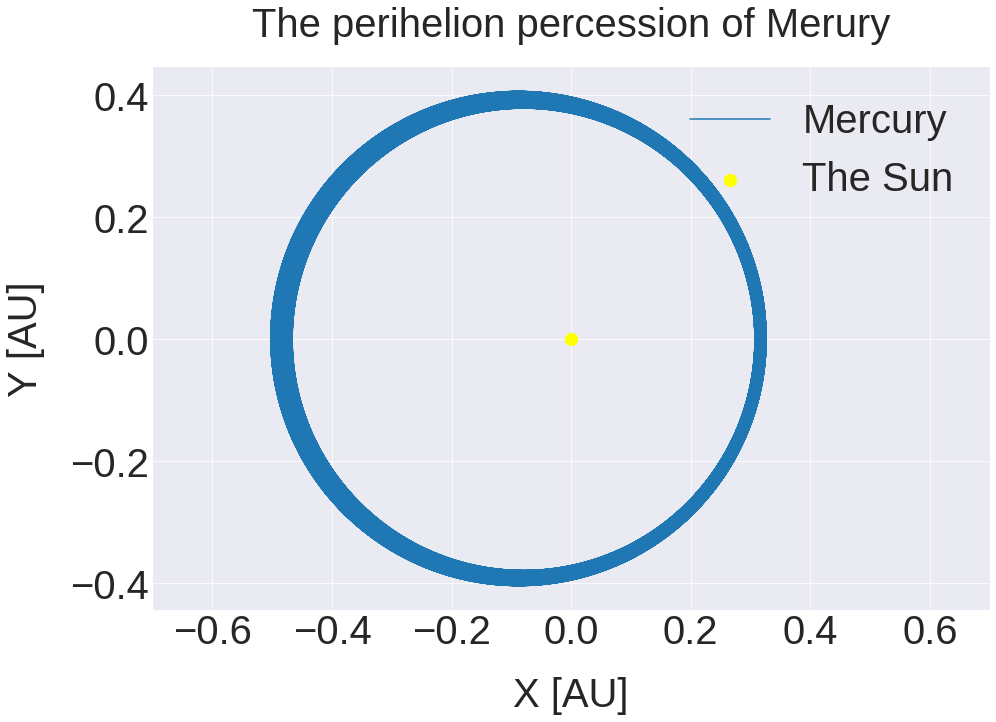

In [328]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (15,10))
plt.plot(xline, yline, label = 'Mercury')
plt.scatter(0,0, s = 150, c = 'yellow', label = 'The Sun')
plt.xticks(fontsize = fsize)
plt.yticks([-0.4,-0.2,0,0.2,0.4], fontsize = fsize)
plt.xlabel('X [AU]',fontsize = fsize, labelpad = 25)
plt.ylabel('Y [AU]',fontsize = fsize,  labelpad = 25)
plt.title('The perihelion percession of Merury', fontsize = fsize, pad = 30)
plt.legend(fontsize = fsize, loc = 'upper right')
plt.xlim([-0.7, 0.7])
plt.savefig('../Paper/Figures/perhielionper1.png', bbox_inches = "tight")

In [318]:
fsize = 40

/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


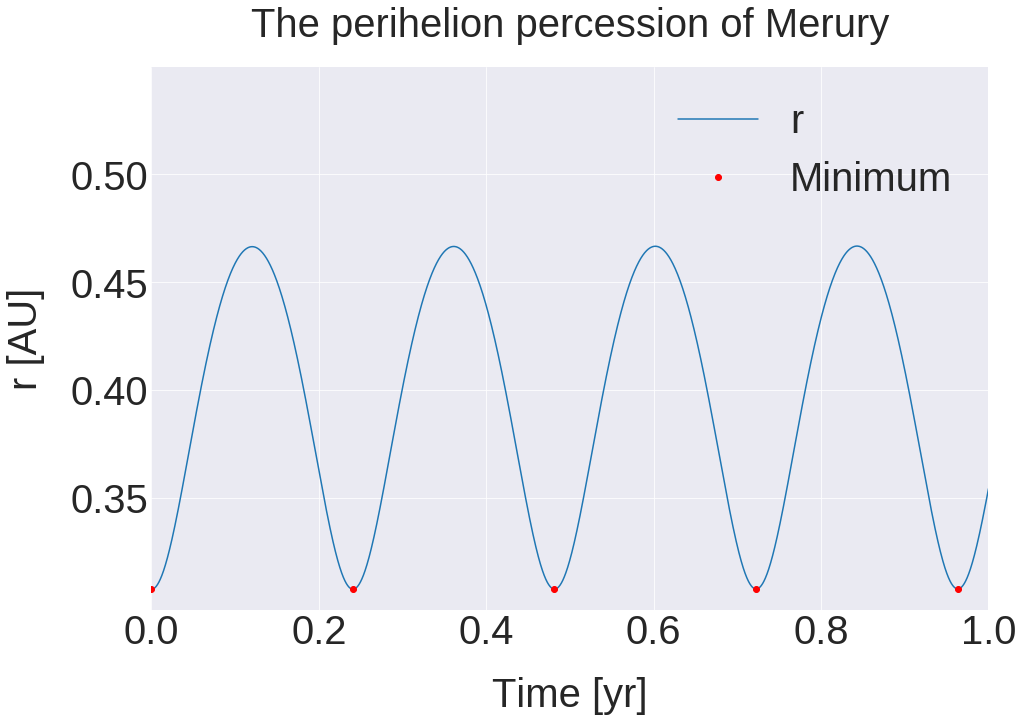

In [327]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (15,10))

plt.plot(t,r, label = 'r')
plt.plot(np.take(t,local_idx_min), local_min, "ro", label = 'Minimum')

plt.xticks( fontsize = fsize)
plt.yticks([0.35,0.4,0.45,0.5], fontsize = fsize)
plt.xlabel('Time [yr]',fontsize = fsize, labelpad = 25)
plt.ylabel('r [AU]',fontsize = fsize,  labelpad = 25)
plt.title('The perihelion percession of Merury', fontsize = fsize, pad = 30)
plt.legend(fontsize = fsize, loc = 'upper right')
plt.xlim([-0.0, 1])
plt.ylim(ymax = 0.55)
plt.savefig('../Paper/Figures/perhielionper2.png', bbox_inches = "tight")

In [320]:
p = np.polyfit(np.take(t,local_idx_min), theta, 1)
line = np.polyval(p, np.take(t,local_idx_min))

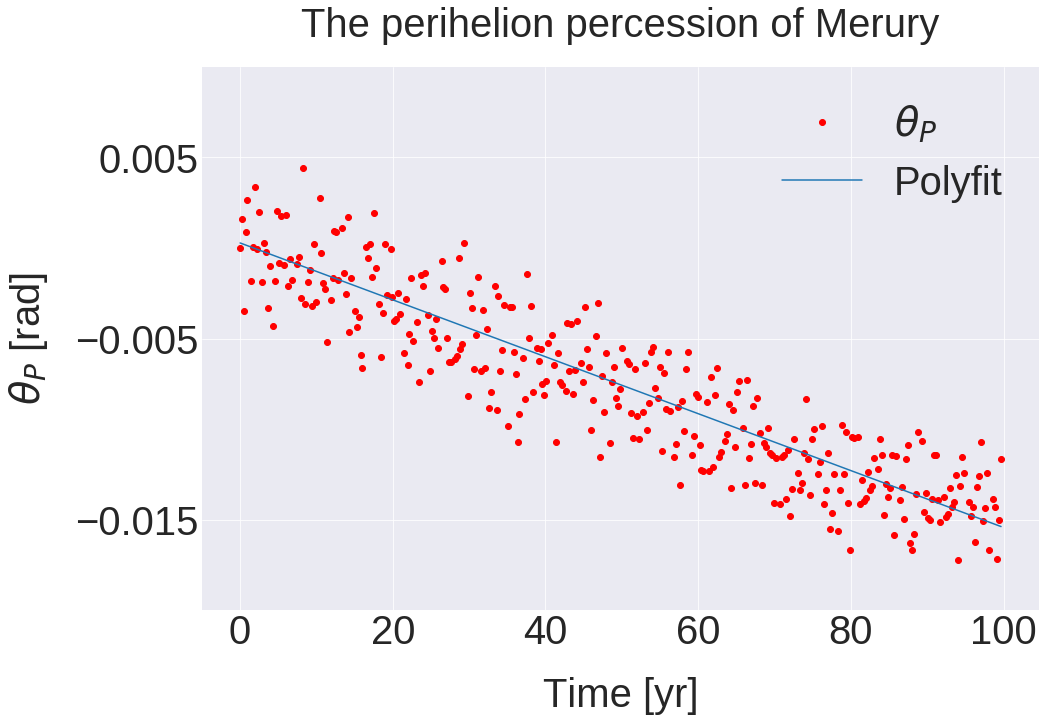

In [326]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (15,10))

plt.plot(np.take(t,local_idx_min), theta, "ro", label = r'$\theta_P$')
plt.plot(np.take(t,local_idx_min),line, label = 'Polyfit')

plt.xticks(fontsize = fsize)
plt.yticks([-0.015,-0.005,0.005],fontsize = fsize)
plt.xlabel('Time [yr]',fontsize = fsize, labelpad = 25)
plt.ylabel(r'$\theta_P$ [rad]',fontsize = fsize,  labelpad = 25)
plt.title('The perihelion percession of Merury', fontsize = fsize, pad = 30)
plt.legend(fontsize = fsize, loc = 'upper right')
#plt.xlim([-0.5, 0.5])
plt.ylim([-0.02,0.01])
plt.savefig('../Paper/Figures/perhielionper3.png', bbox_inches = "tight")

In [322]:
line[-1]-line[0]

-0.015651068962580145

In [289]:
np.take(t,local_idx_min)

array([ 0.    ,  0.2408,  0.4815,  0.7225,  0.9635,  1.4455,  1.6867,
        1.928 ,  2.1692,  2.4106,  2.8934,  3.135 ,  3.3766,  3.6182,
        3.86  ,  4.3436,  4.5856,  4.8277,  5.0697,  5.3119,  5.7963,
        6.0387,  6.281 ,  6.5235,  6.766 ,  7.009 ,  7.494 ,  7.7368,
        7.9796,  8.2227,  8.4655,  8.9517,  9.1949,  9.4381,  9.6815,
        9.9248, 10.4119, 10.6554, 10.899 , 11.1427, 11.3864, 11.8742,
       12.1182, 12.3623, 12.6064, 12.8505, 13.3391, 13.5834, 13.8278,
       14.0724, 14.3168, 14.5615, 15.0509, 15.2957, 15.5406, 15.7855,
       16.0305, 16.5209, 16.7661, 17.0114, 17.2567, 17.5022, 17.7476,
       18.2387, 18.4843, 18.7301, 18.976 , 19.2218, 19.7138, 19.9598,
       20.2059, 20.4521, 20.6984, 20.9447, 21.4375, 21.6841, 21.9306,
       22.1773, 22.4241, 22.6708, 23.1646, 23.4115, 23.6587, 23.9058,
       24.153 , 24.6475, 24.8948, 25.1423, 25.3898, 25.6374, 25.885 ,
       26.3806, 26.6284, 26.8763, 27.1242, 27.3722, 27.6203, 28.1167,
       28.365 , 28.6